# Library

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

sns.set_style('whitegrid')
sns.set(font_scale=1.0)
plt.style.use('seaborn-white')

# Data load

In [107]:
#competition
train = pd.read_csv("./open-2/train.csv")
test = pd.read_csv("./open-2/test.csv")
sample_submission = pd.read_csv("./open-2/sample_submission.csv")

train.drop(['ID'],1,inplace=True)
test.drop(['ID'],1,inplace=True)

#meta-data
x_feature = pd.read_csv("./open-2/meta/x_feature_info.csv")
y_feature = pd.read_csv("./open-2/meta/y_feature_info.csv")
y_feature_spec = pd.read_csv("./open-2/meta/y_feature_spec_info.csv")

In [3]:
train.head()

X_01     X_02    X_03  X_04     X_05    X_06    X_07     X_08     X_09  \
0 70.5440 103.3200 67.4700     1 101.8920 74.9830 29.4500  62.3800 245.7100   
1 69.5240 103.3210 65.1700     1 101.9440 72.9430 28.7300  61.2300 233.6100   
2 72.5830 103.3200 64.0700     1 103.1530 72.9430 28.8100 105.7700 272.2000   
3 71.5630 103.3200 67.5700     1 101.9710 77.0220 28.9200 115.2100 255.3600   
4 69.5240 103.3200 63.5700     1 101.9810 70.9040 29.6800 103.3800 241.4600   

    X_10   X_11   X_12   X_13    X_14    X_15    X_16    X_17    X_18   X_19  \
0 0.0000 0.0000 4.3400 0.1800 13.3400 13.3700 13.4000 13.5200 13.4400 3.1100   
1 0.0000 0.0000 4.3800 0.1800 13.3300 13.3300 13.4600 13.5100 13.4200 2.9700   
2 0.0000 0.0000 4.3600 0.1500 13.3600 13.3600 13.3900 13.5100 13.4300 3.0400   
3 0.0000 0.0000 4.3300 0.2100 13.3000 13.3300 13.3900 13.5100 13.4000 3.0500   
4 0.0000 0.0000 4.3500 0.1600 13.3500 13.3400 13.4100 13.5000 13.4200 3.0400   

    X_20   X_21   X_22  X_23   X_24   X_25   X_26   X_27   X_28   X_29   X_30  \
0 3.1700 3.0600 3.1300     1 2.0500 2.0700 2.0500 2.0600 2.0600 2.3500 1.4900   
1 3.1100 2.9100 3.2000     1 2.1000 2.1000 2.1000 2.1000 2.1700 2.2800 1.4900   
2 3.0400 3.0100 3.1200     1 2.0700 2.0600 2.0400 2.0700 2.1000 2.2600 1.4900   
3 3.0100 3.0200 3.0800     1 2.0600 2.0500 2.0300 2.0600 2.0700 2.1200 1.4700   
4 3.0700 3.0000 3.1200     1 2.0900 2.0600 2.0900 2.1200 2.3300 2.1300 1.4900   

    X_31   X_32   X_33    X_34    X_35    X_36    X_37     X_38     X_39  \
0 1.6900 1.4600 1.7400 12.9900 12.8800 12.8900 12.9900 -16.4100 -16.3600   
1 1.6700 1.4500 1.6600 12.9200 12.8700 12.8900 12.9300 -16.0600 -16.1100   
2 1.6900 1.4600 1.6800 12.9700 12.8700 12.8700 13.0000 -16.1600 -16.1700   
3 1.6800 1.4700 1.6800 12.9100 12.9700 12.9900 12.9200 -16.0500 -16.0300   
4 1.6800 1.4700 1.8200 12.9600 12.8500 12.9100 12.9600 -16.2500 -16.2300   

      X_40    X_41    X_42    X_43    X_44   X_45  X_46  X_47  X_48  \
0 -17.0300 21.2000 20.9900 21.2800 21.0900 0.2900  1463     1     1   
1 -16.7400 21.1600 21.0300 21.1600 21.1300 0.1300  1463     1     1   
2 -16.7600 21.1300 21.0300 21.1700 21.1200 0.1400  1468     1     1   
3 -16.6700 21.1800 20.9800 21.2000 21.0900 0.2200  1469     1     1   
4 -16.8500 21.1600 20.9600 21.1800 21.1000 0.2200  1469     1     1   

        X_49     X_50     X_51     X_52     X_53     X_54     X_55     X_56  \
0  9706.0300 137.0436 135.3592 147.8380 134.3135 125.6054 136.7214 125.0283   
1 10423.4300 133.7367 135.9798 149.9247 123.6306 127.8933 143.3227 124.8773   
2 10948.5300 132.8051 131.0554 146.8146 128.9391 127.0122 140.3957 122.2382   
3 15007.0300 134.1388 133.2394 139.7201 132.2608 130.7232 147.6248 134.8752   
4 11051.0300 142.7290 136.6200 134.8536 134.7603 125.6478 139.3311 123.2728   

    Y_01   Y_02   Y_03    Y_04    Y_05    Y_06   Y_07     Y_08     Y_09  \
0 2.0560 1.4560 1.6800 10.5020 29.6320 16.0830 4.2760 -25.3810 -25.5290   
1 1.4460 1.1840 1.2680 18.5070 33.1790 16.7360 3.2290 -26.6190 -26.5230   
2 1.2510 0.6650 0.7820 14.0820 31.8010 17.0800 2.8390 -26.2380 -26.2160   
3 1.4640 1.0790 1.0520 16.9750 34.5030 17.1430 3.1440 -25.4260 -25.0790   
4 0.9830 0.6460 0.6890 15.0470 32.6020 17.5690 3.1380 -25.3760 -25.2420   

      Y_10    Y_11     Y_12     Y_13     Y_14  
0 -22.7690 23.7920 -25.4700 -25.4090 -25.3040  
1 -22.5740 24.6910 -26.2530 -26.4970 -26.4380  
2 -22.1690 24.6490 -26.2850 -26.2150 -26.3700  
3 -21.7650 24.9130 -25.2540 -25.0210 -25.3450  
4 -21.0720 25.2990 -25.0720 -25.1950 -24.9740

# data wrangling

In [4]:
train.shape, test.shape

((39607, 70), (39608, 56))

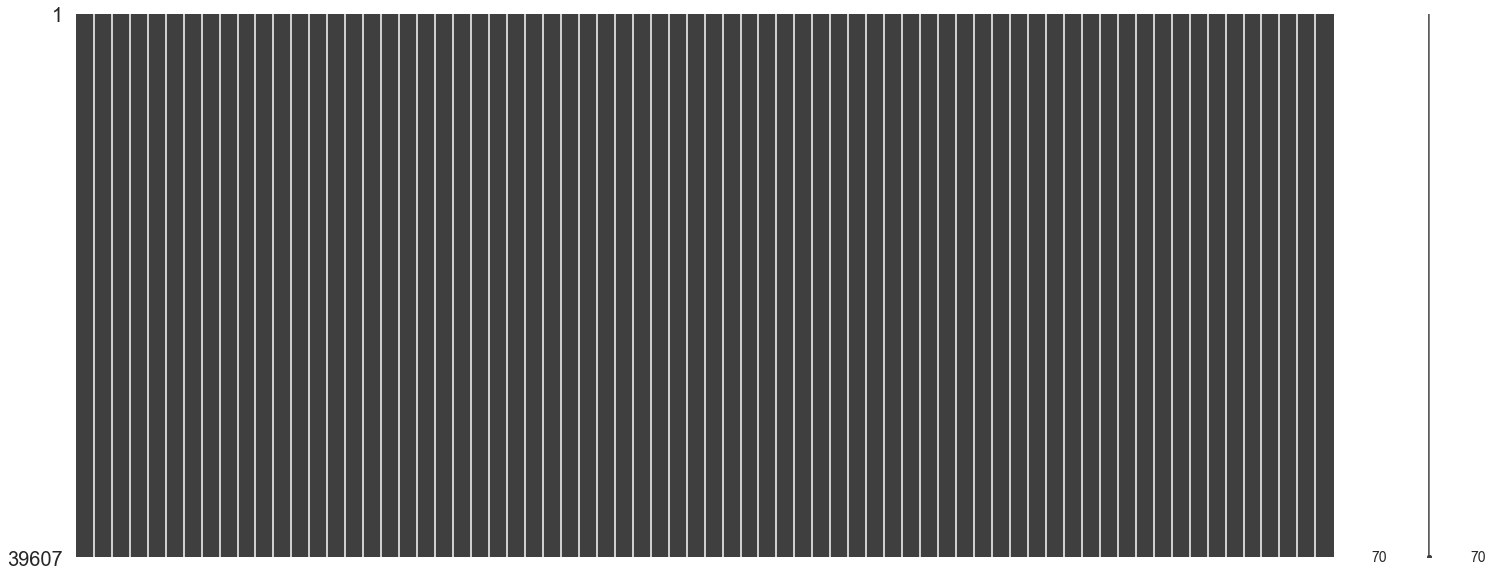

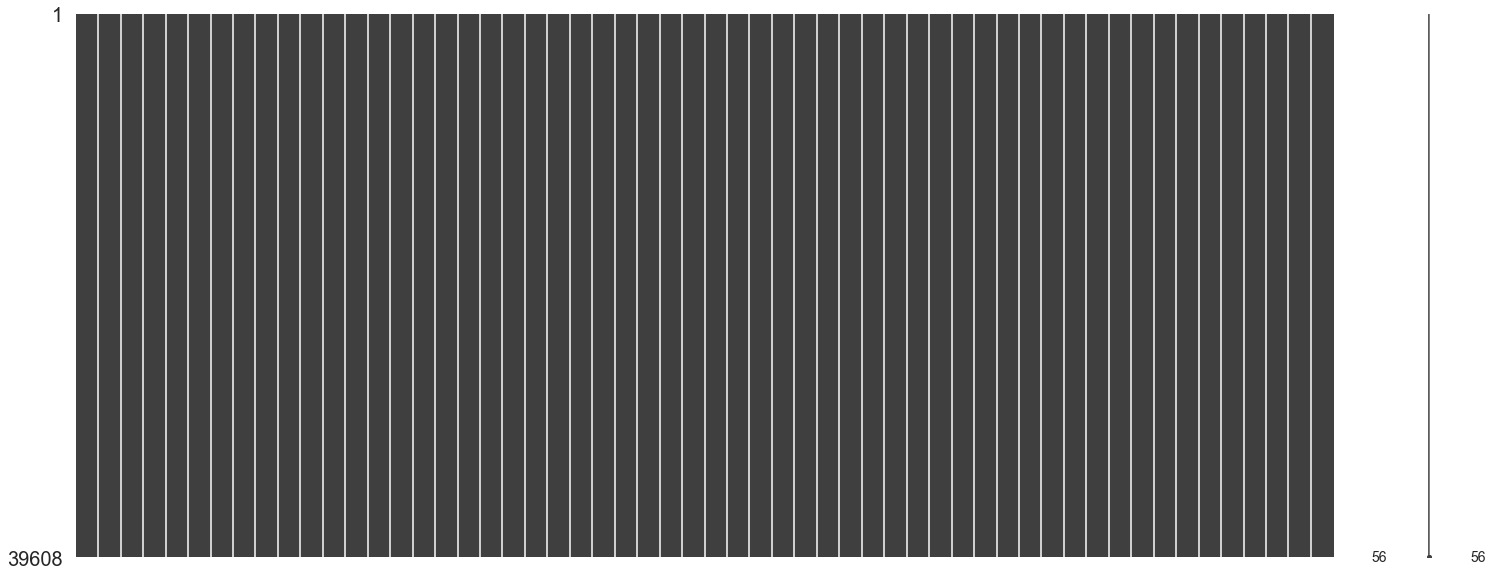

In [5]:
import missingno as msno
msno.matrix(train);
msno.matrix(test);

In [6]:
train.describe()

X_01       X_02       X_03       X_04       X_05       X_06  \
count 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000   
mean     68.4120   103.3202    68.8264     1.0000   102.3372    70.5972   
std       2.6560     0.0004     5.1512     0.0000     0.5484     2.2598   
min      56.2680   103.3200    56.4700     1.0000   101.7740    61.7260   
25%      66.4650   103.3200    65.0700     1.0000   101.9490    68.8640   
50%      68.5040   103.3200    67.2700     1.0000   102.0060    69.8840   
75%      69.5240   103.3200    71.7700     1.0000   103.1440    71.9230   
max      84.8200   103.3210    89.1700     1.0000   103.1600    87.2190   

            X_07       X_08       X_09       X_10       X_11       X_12  \
count 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000   
mean     29.4075   164.4493   225.3975     0.0024     0.0004     4.3732   
std       7.3382   220.4024    66.7347     0.0863     0.0141     0.0218   
min      14.1400    38.4600    37.5800     0.0000     0.0000     4.2700   
25%      27.8900   105.9900   188.5400     0.0000     0.0000     4.3600   
50%      28.8400   115.0400   234.4500     0.0000     0.0000     4.3700   
75%      29.8700   132.6200   263.9600     0.0000     0.0000     4.3900   
max     163.8600  2387.4400   637.4900     3.6000     0.7000     4.4900   

            X_13       X_14       X_15       X_16       X_17       X_18  \
count 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000   
mean      0.1433    13.3722    13.3819    13.4639    13.5126    13.4493   
std       0.0253     0.0299     0.0295     0.0367     0.0234     0.0291   
min       0.0500    13.1500    13.2300    13.2600    13.4100    13.2600   
25%       0.1300    13.3500    13.3600    13.4400    13.5000    13.4300   
50%       0.1400    13.3700    13.3800    13.4700    13.5100    13.4500   
75%       0.1600    13.3900    13.4100    13.4900    13.5300    13.4700   
max       0.2800    13.4900    13.5000    13.6100    13.6100    13.5700   

            X_19       X_20       X_21       X_22       X_23       X_24  \
count 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000   
mean      3.2402     3.1845     3.1743     3.2327     1.0000     2.1157   
std       0.1105     0.1053     0.1069     0.1090     0.0000     0.0324   
min       2.8600     2.8300     2.8300     2.8500     1.0000     1.8300   
25%       3.1600     3.1000     3.0900     3.1400     1.0000     2.0900   
50%       3.2200     3.1800     3.1600     3.2300     1.0000     2.1200   
75%       3.3100     3.2700     3.2500     3.3200     1.0000     2.1400   
max       3.7500     3.6700     3.6800     3.7900     1.0000     2.3500   

            X_25       X_26       X_27       X_28       X_29       X_30  \
count 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000   
mean      2.0939     2.0904     2.0982     2.1186     2.1737     1.3790   
std       0.0331     0.0385     0.0381     0.0428     0.0467     0.0304   
min       1.9600     1.9800     1.9900     1.9300     2.0200     0.5700   
25%       2.0700     2.0600     2.0700     2.0900     2.1400     1.3700   
50%       2.0900     2.0900     2.0900     2.1200     2.1700     1.3700   
75%       2.1200     2.1200     2.1200     2.1400     2.2000     1.3800   
max       2.3500     2.3500     2.3500     2.3500     2.3600     2.1100   

            X_31       X_32       X_33       X_34       X_35       X_36  \
count 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000 39607.0000   
mean      1.5711     1.3629     1.5957    12.9503    12.9203    12.9417   
std       0.0745     0.0299     0.1080     0.0440     0.0522     0.0478   
min       0.6000     0.5700     0.6100    12.8400    12.8100    12.8400   
25%       1.5300     1.3500     1.5500    12.9200    12.8700    12.9000   
50%       1.5500     1.3600     1.5700    12.9600    12.9200    12.9500   
75%       1.6000     1.3700     1.6100    12.9900    12.9700    12.9800   
max       7.2100     2.4500     

**Obseravation**

* 이진 컬럼이 존재합니다.

In [17]:
#viz function

#x column's distplot
def show_dist_plot_x(columns,data):
    i = 0
    plt.figure(figsize=(24,16))
    plt.subplots(8,7,figsize=(24,16))
    for col in columns:
        i += 1
        plt.subplot(8,7,i)
        sns.distplot(data[col])
    plt.tight_layout()

#y column's distplot
def show_dist_plot_y(columns,data):
    i = 0
    plt.figure(figsize=(18,8))
    plt.subplots(2,7,figsize=(18,8))
    for col in columns:
        i += 1
        plt.subplot(2,7,i)
        sns.distplot(data[col],color='skyblue')
    plt.tight_layout()
    
#violinplot
def show_dist_plot_vio(columns,data):
    i = 0
    plt.figure(figsize=(24,16))
    plt.subplots(8,7,figsize=(24,16))
    for col in columns:
        i += 1
        plt.subplot(8,7,i)
        sns.boxplot(data[col],color='skyblue')
    plt.tight_layout()

#plot
def show_plot(data,columns):
    for col in columns:
        plt.figure(figsize=(36,12))
        plt.plot(data[col])
        plt.title(f'{col}', fontsize=40)
        plt.tight_layout()

<Figure size 1728x1152 with 0 Axes>

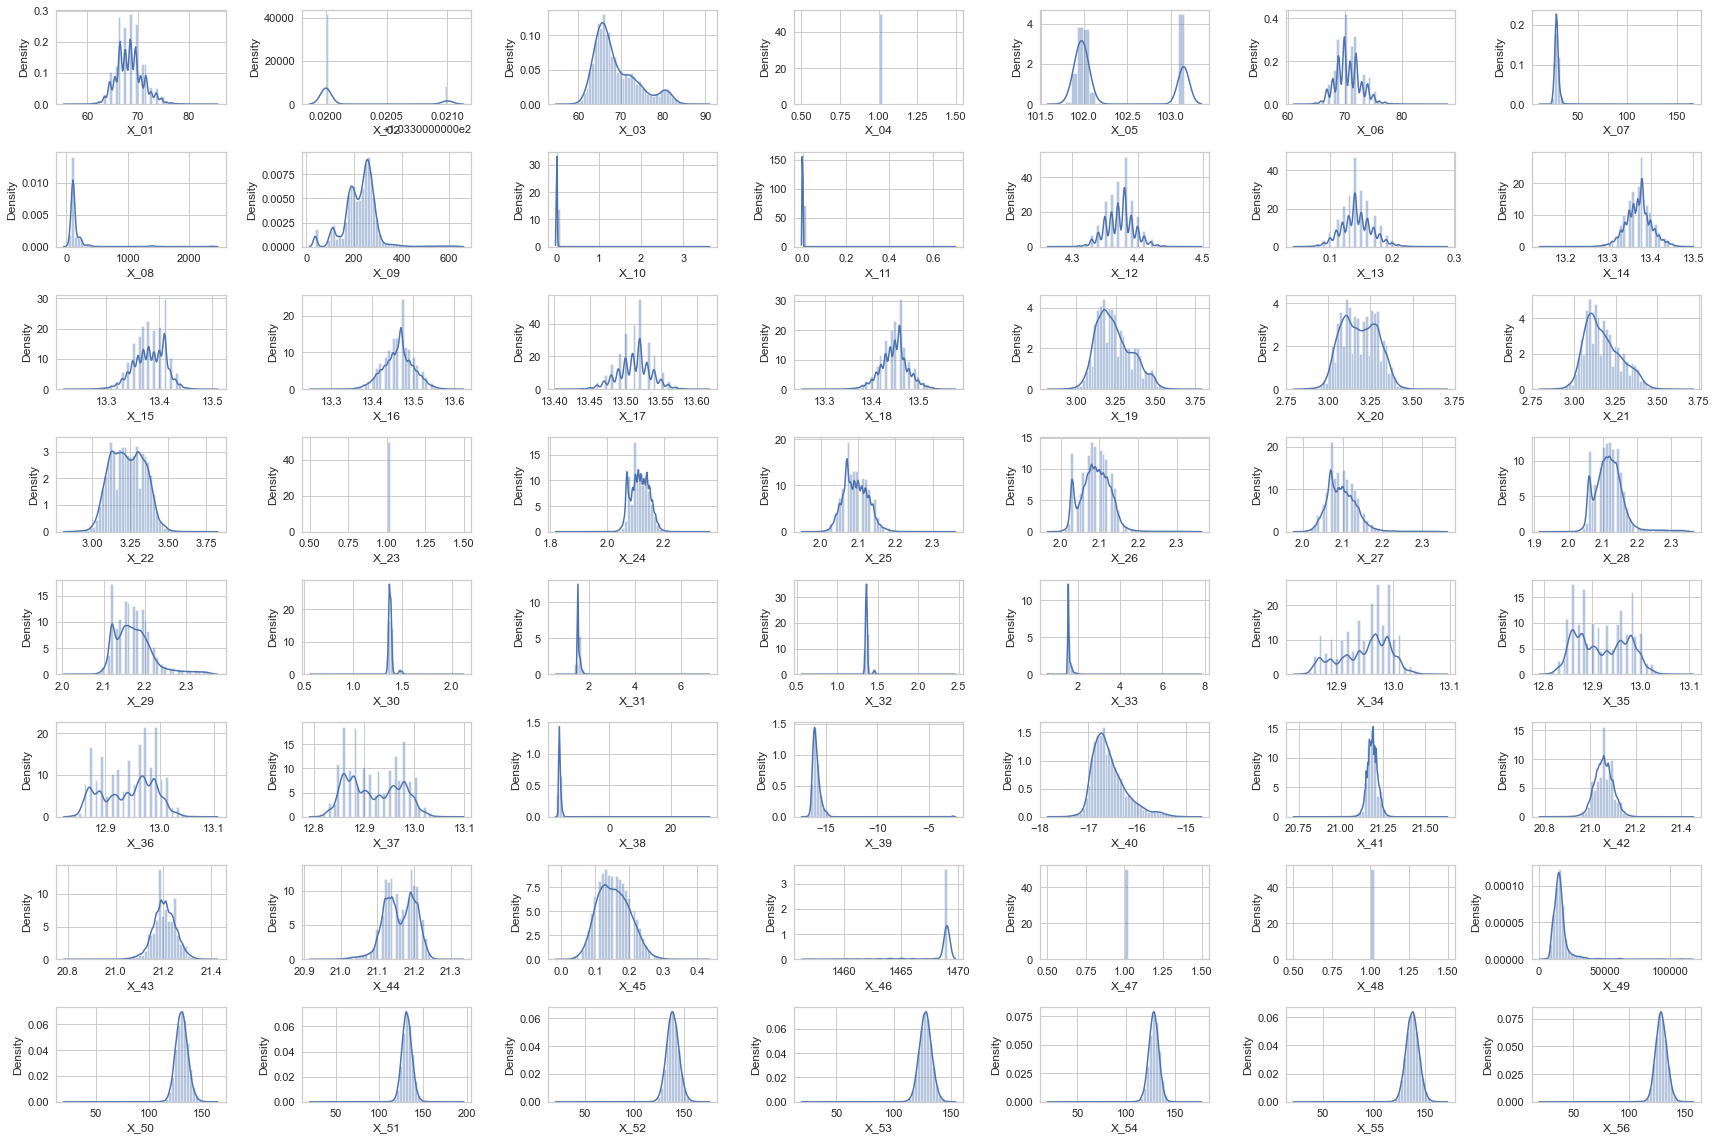

In [36]:
sns.set_style('whitegrid')
show_dist_plot_x(train.filter(regex='X').columns, train)

<Figure size 1728x1152 with 0 Axes>

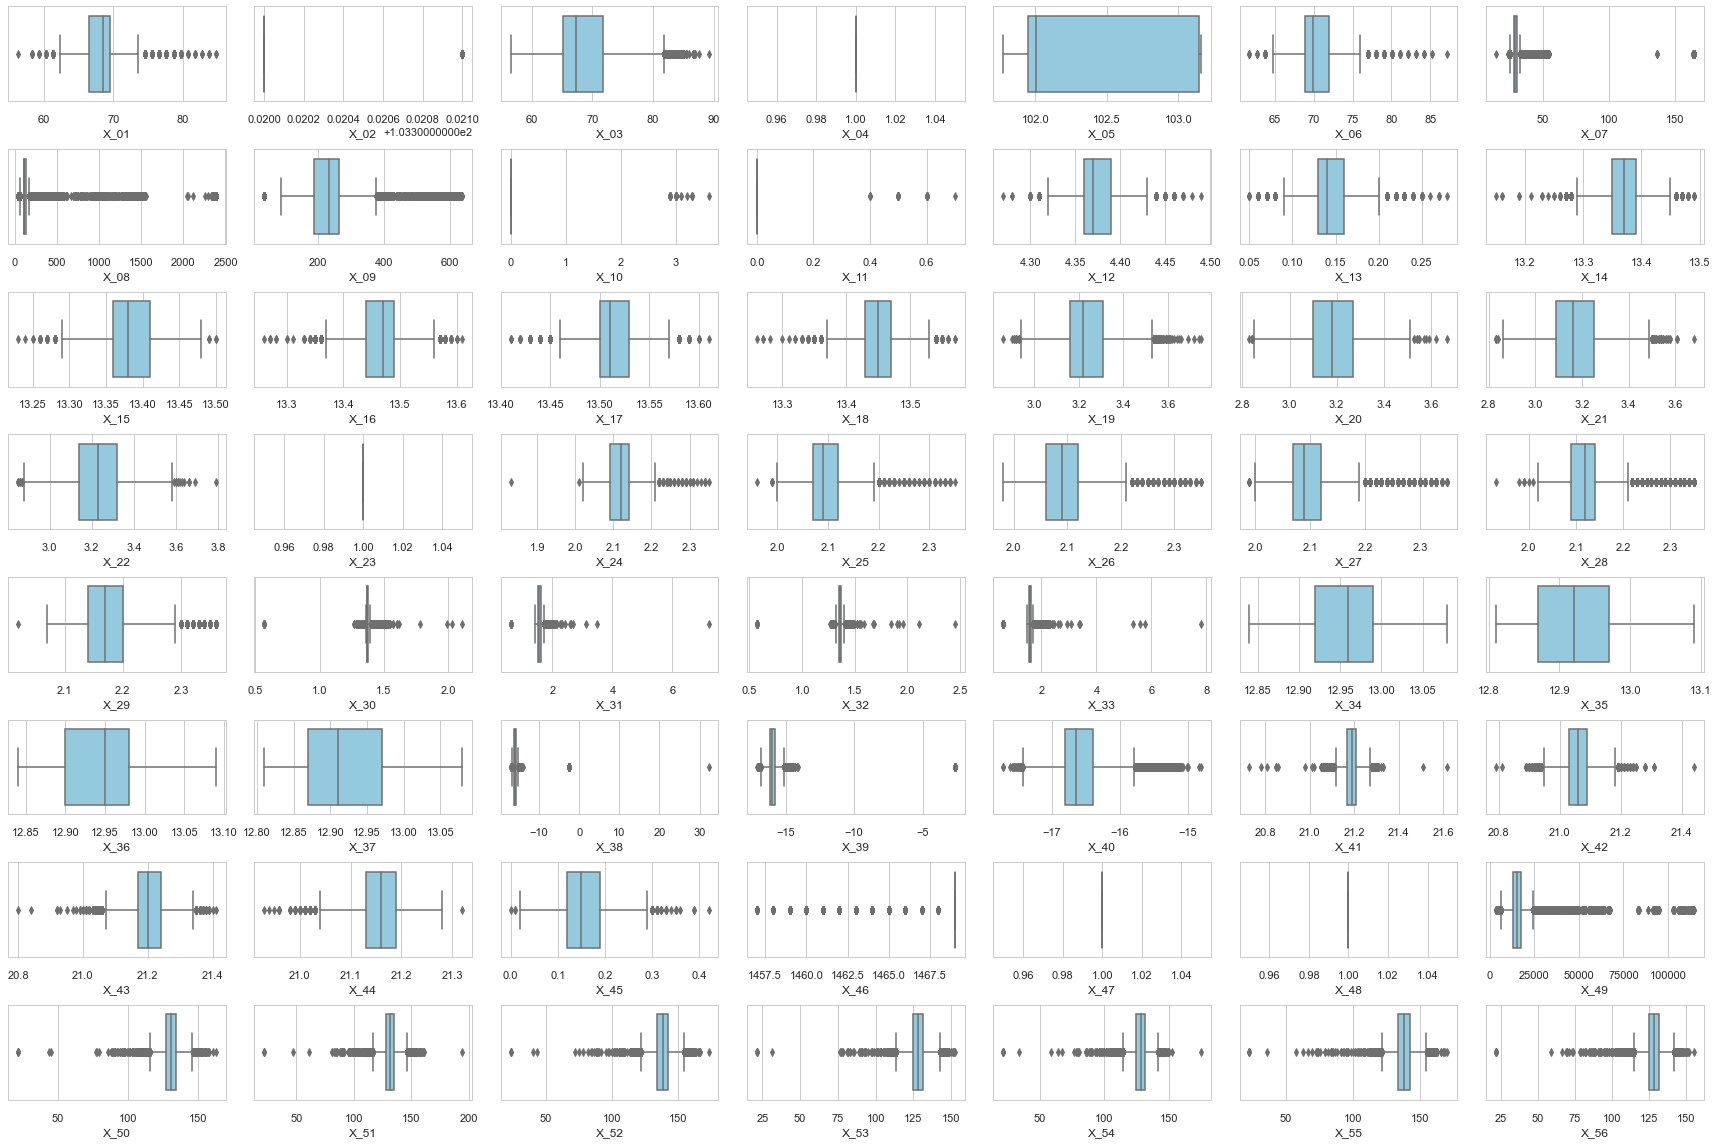

In [29]:
show_dist_plot_vio(train.filter(regex='X').columns, train)

<Figure size 1296x576 with 0 Axes>

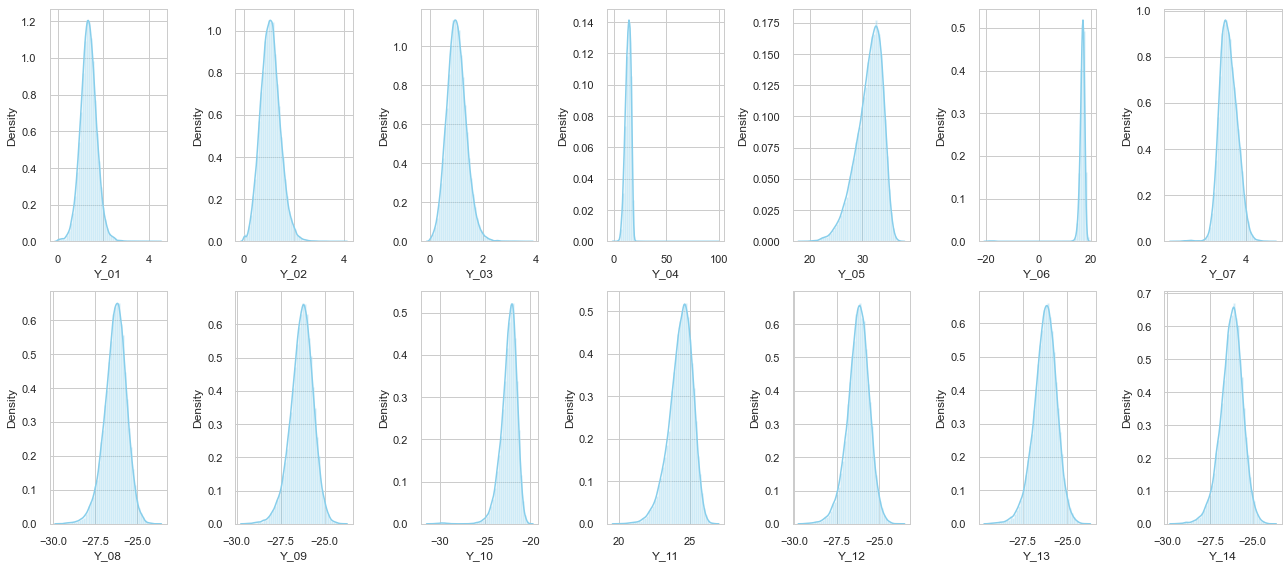

In [30]:
show_dist_plot_y(train.filter(regex='Y').columns, train)

# EDA

## 검사 통과 여부

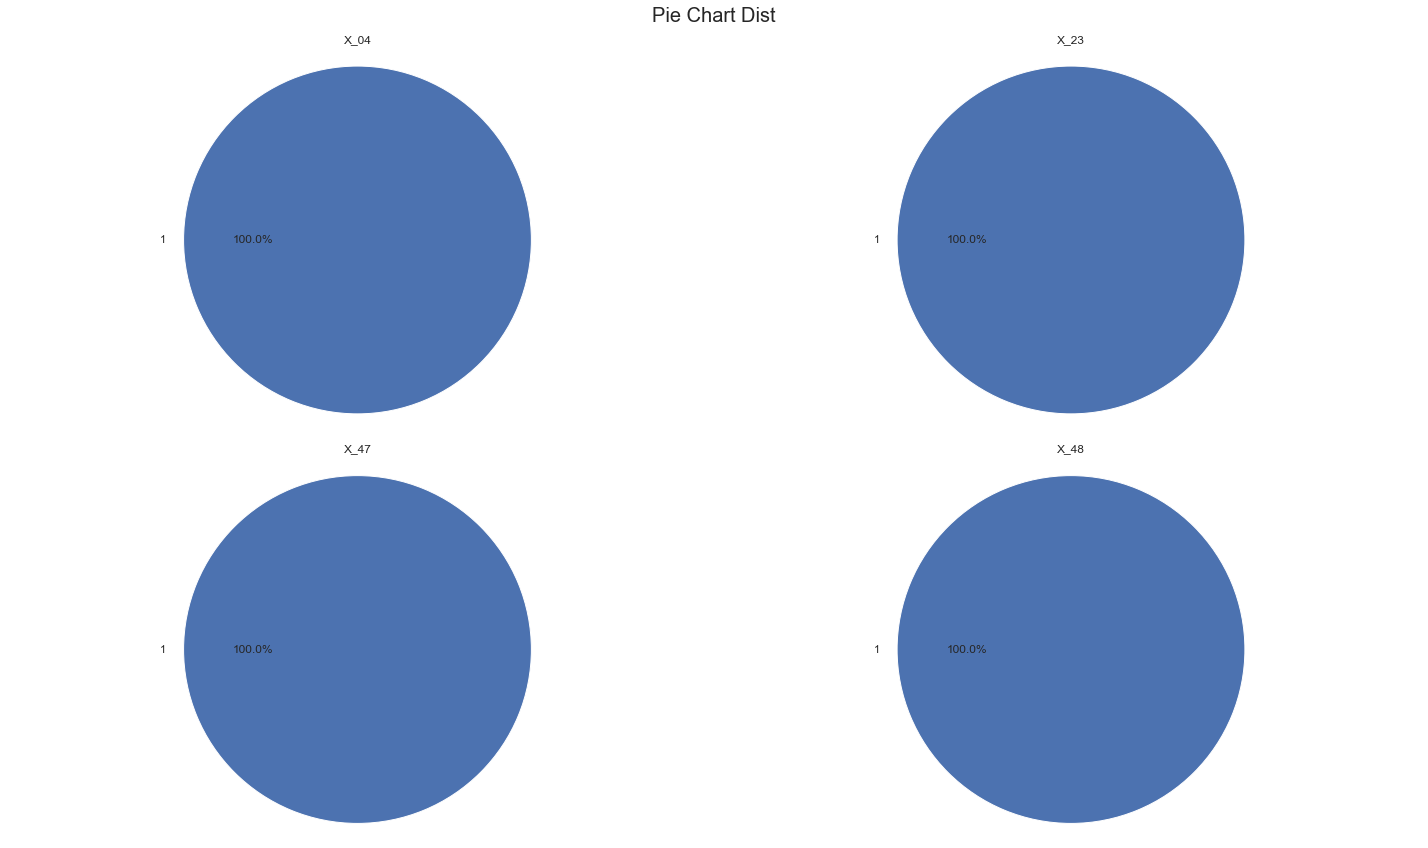

In [37]:
sns.set_style('whitegrid')
dataset2 = train[['X_04','X_23','X_47','X_48']]

fig = plt.figure(figsize=(20,12))
plt.suptitle("Pie Chart Dist", fontsize=20)
for i in range(1,5):
    plt.subplot(2,2,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    values = dataset2.iloc[:, i-1].value_counts(normalize=True).values
    index = dataset2.iloc[:, i-1].value_counts(normalize=True).index
    
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
    
plt.tight_layout()

**Observation**

* 1~4차 검사 모두 통과이며 변별력이 없는 변수라 제거하겠습니다.

## 단계별 누름량

* 핀 손상 방지를 위해 PCB체결 시 평행하게 안착하는 기술이 핵심

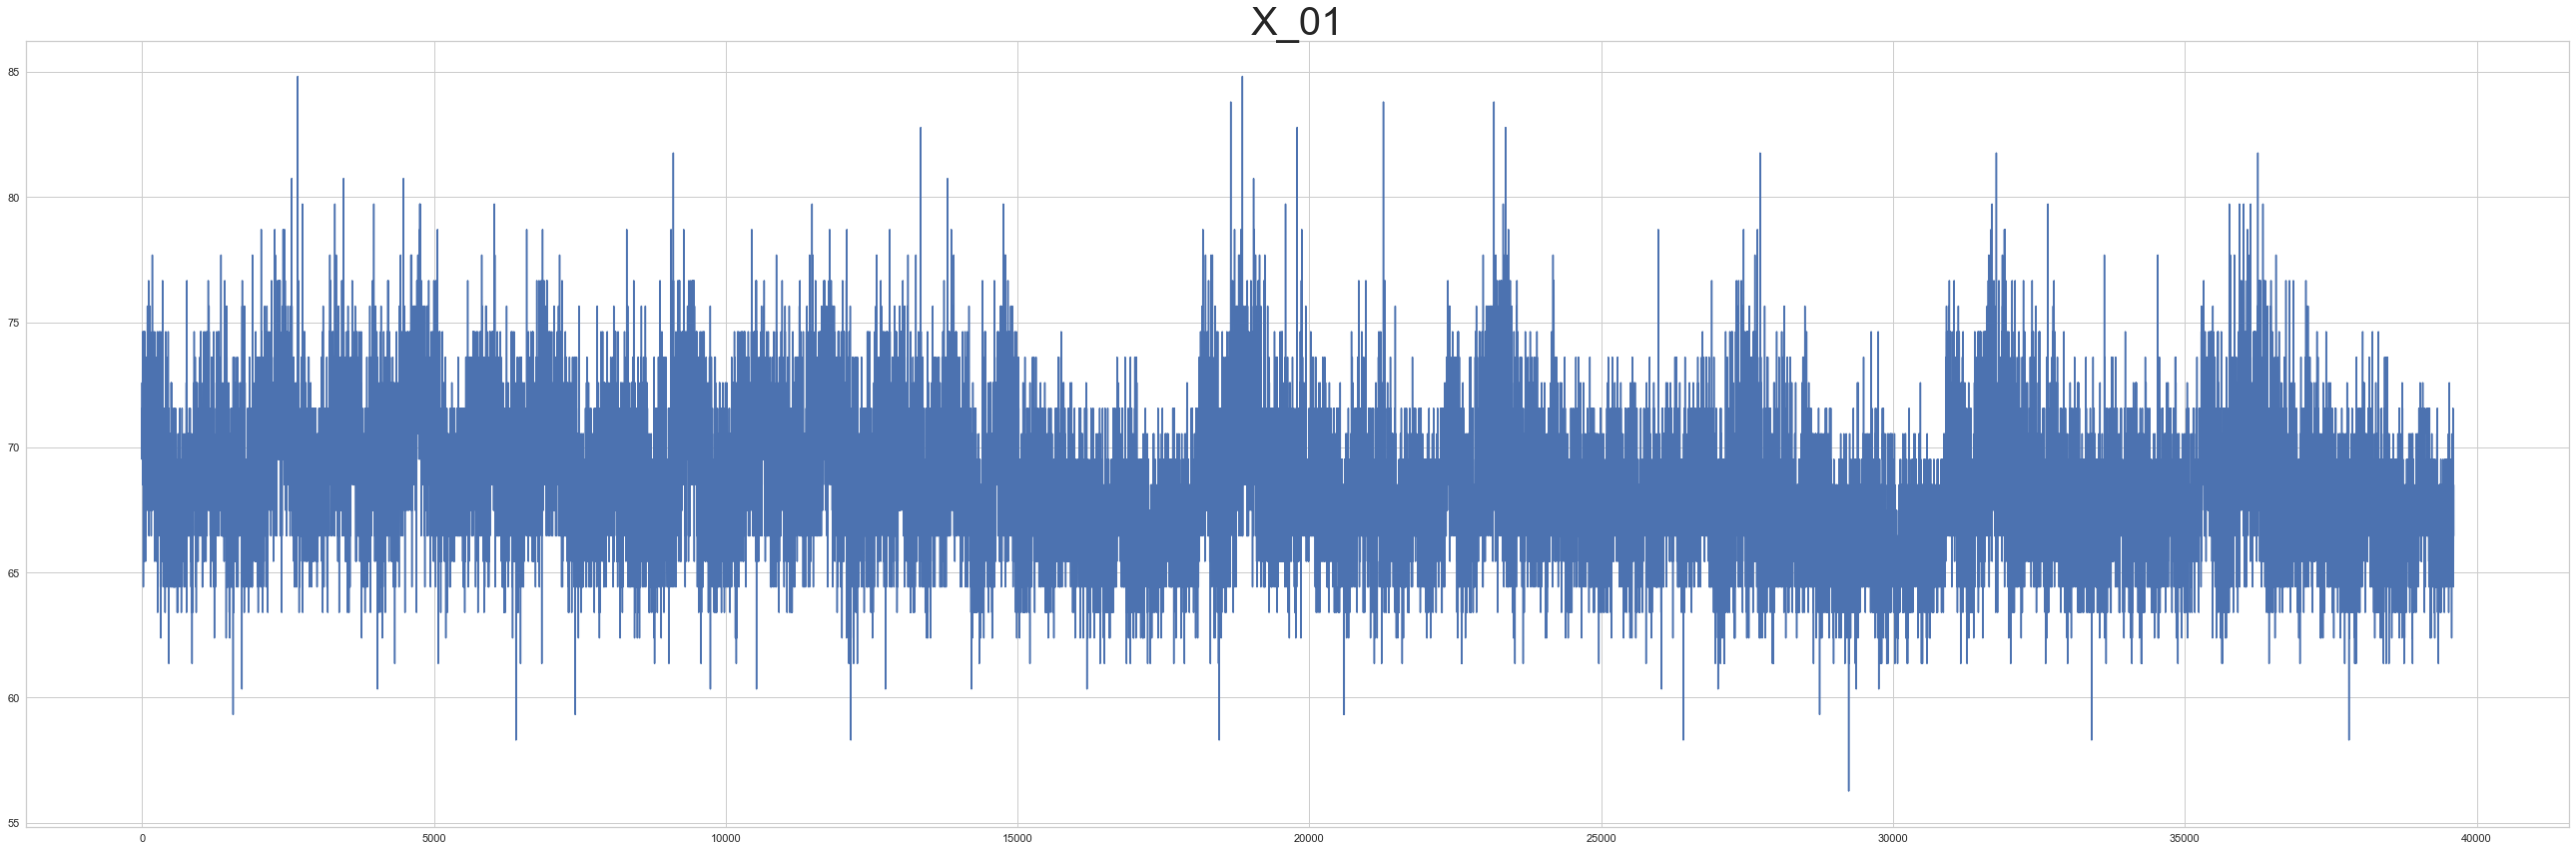

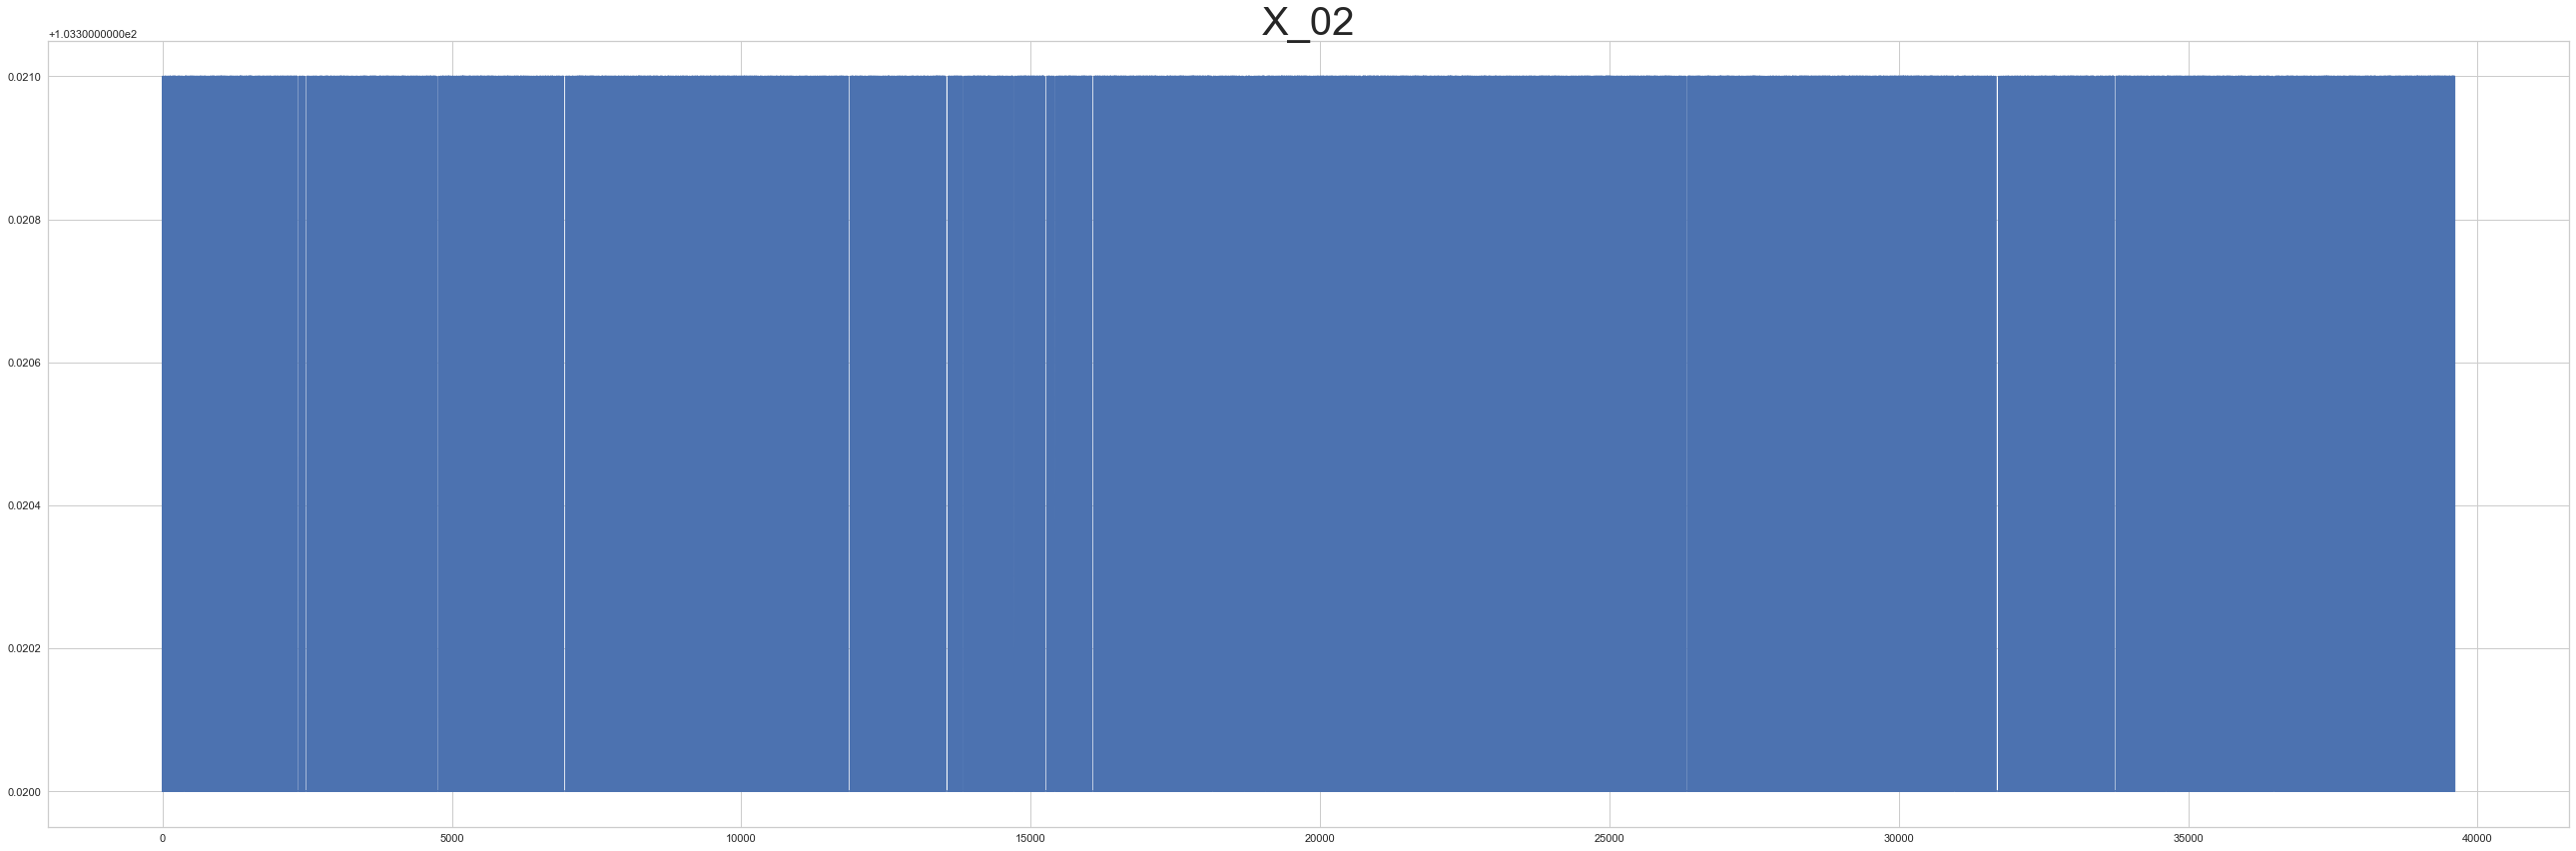

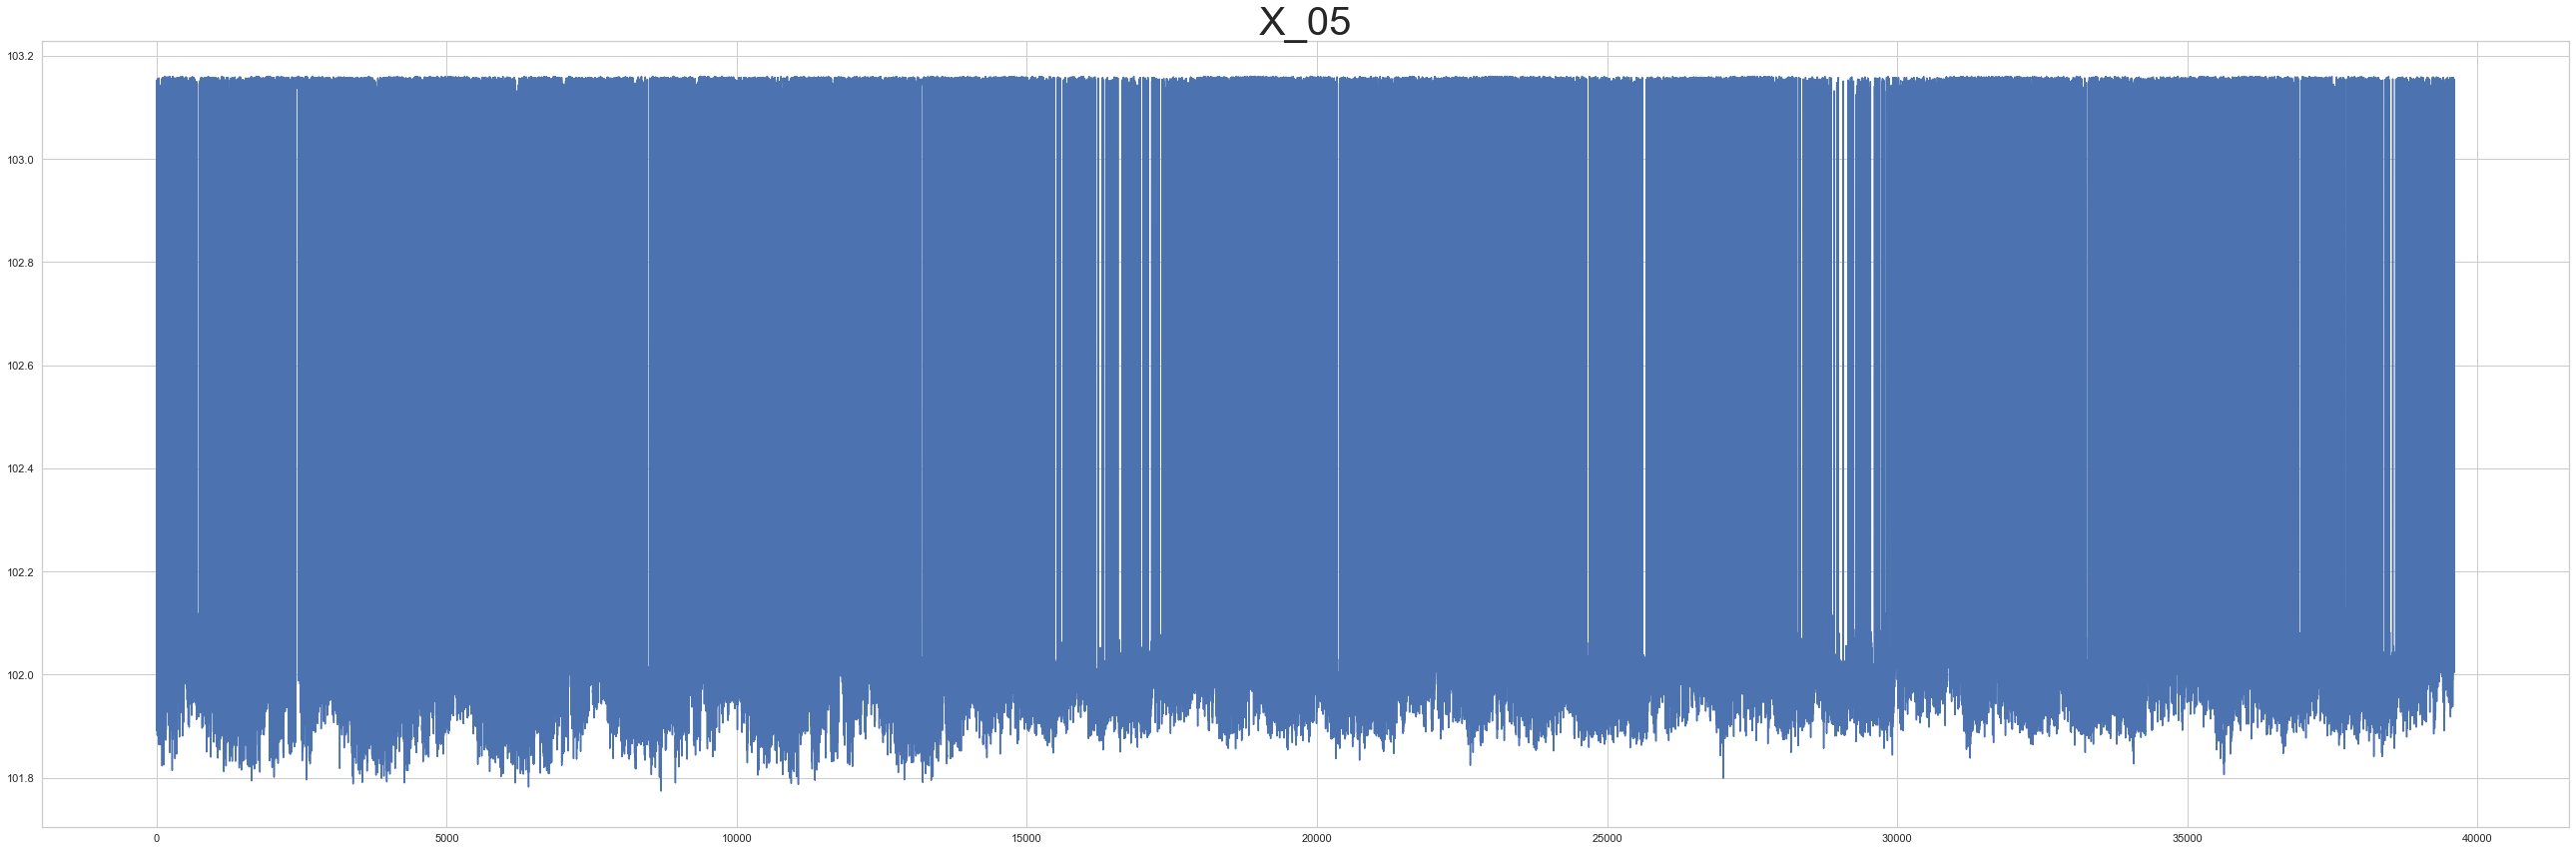

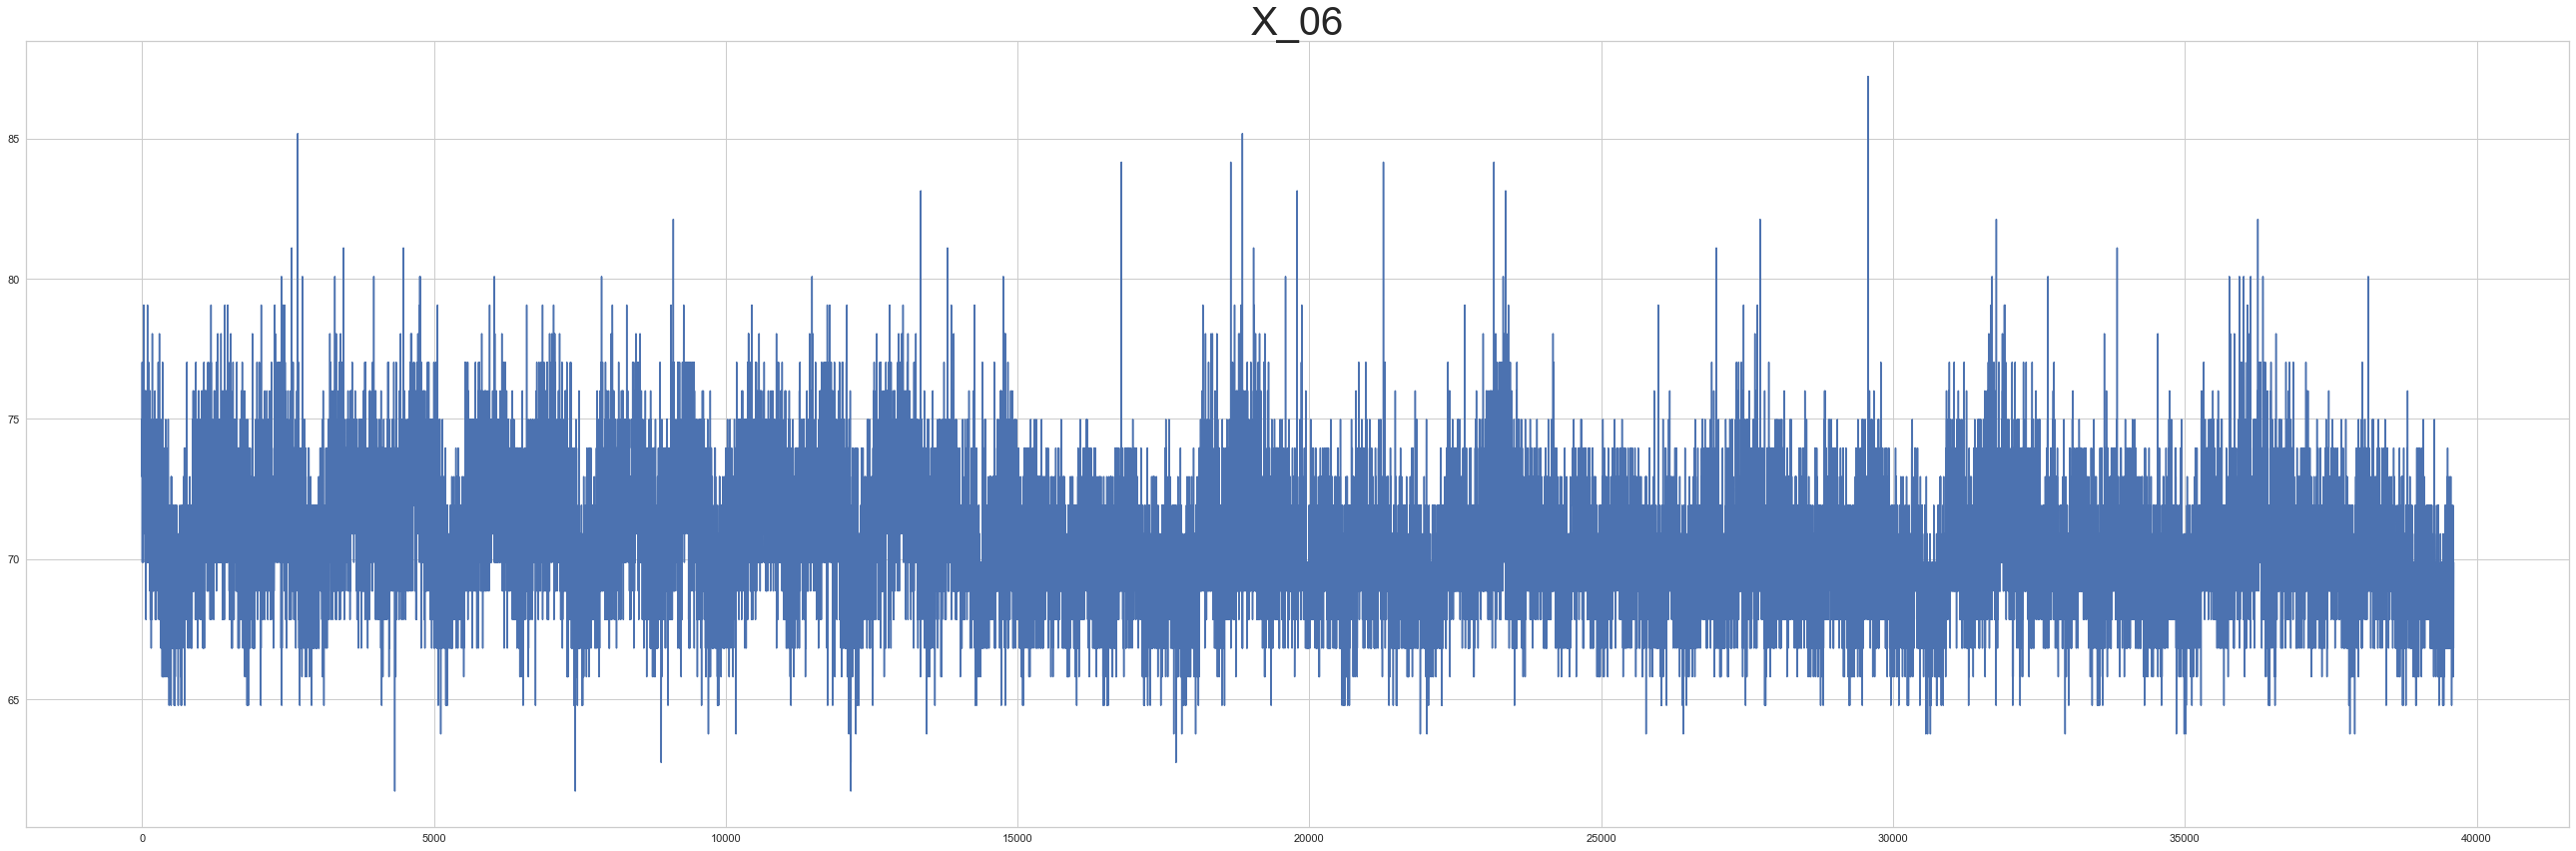

In [38]:
show_plot(train,["X_01", "X_02", "X_05", "X_06"])

**Obseravation** 

* 단계별(step1~4) 누름량에서는 큰 편차가 보이지 않습니다.

## 방열재료 무게

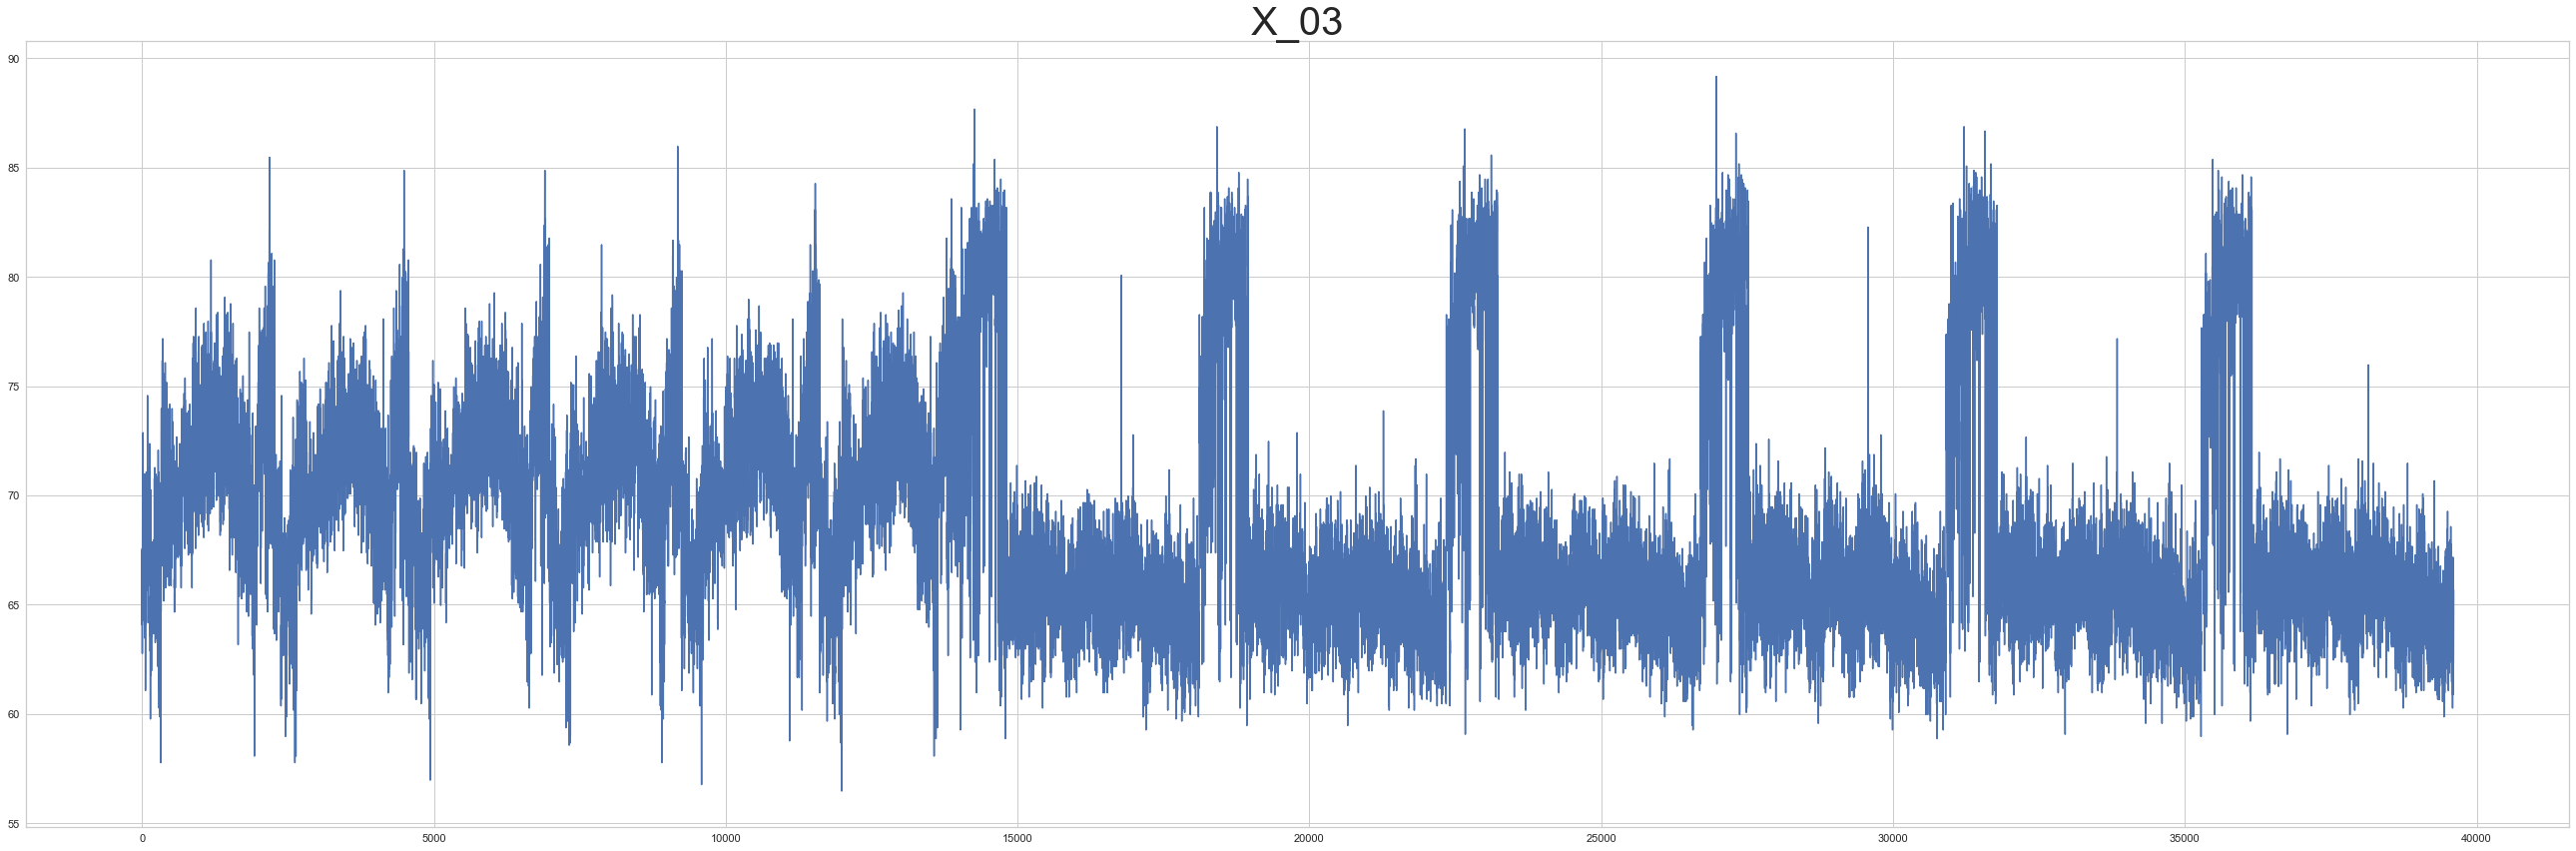

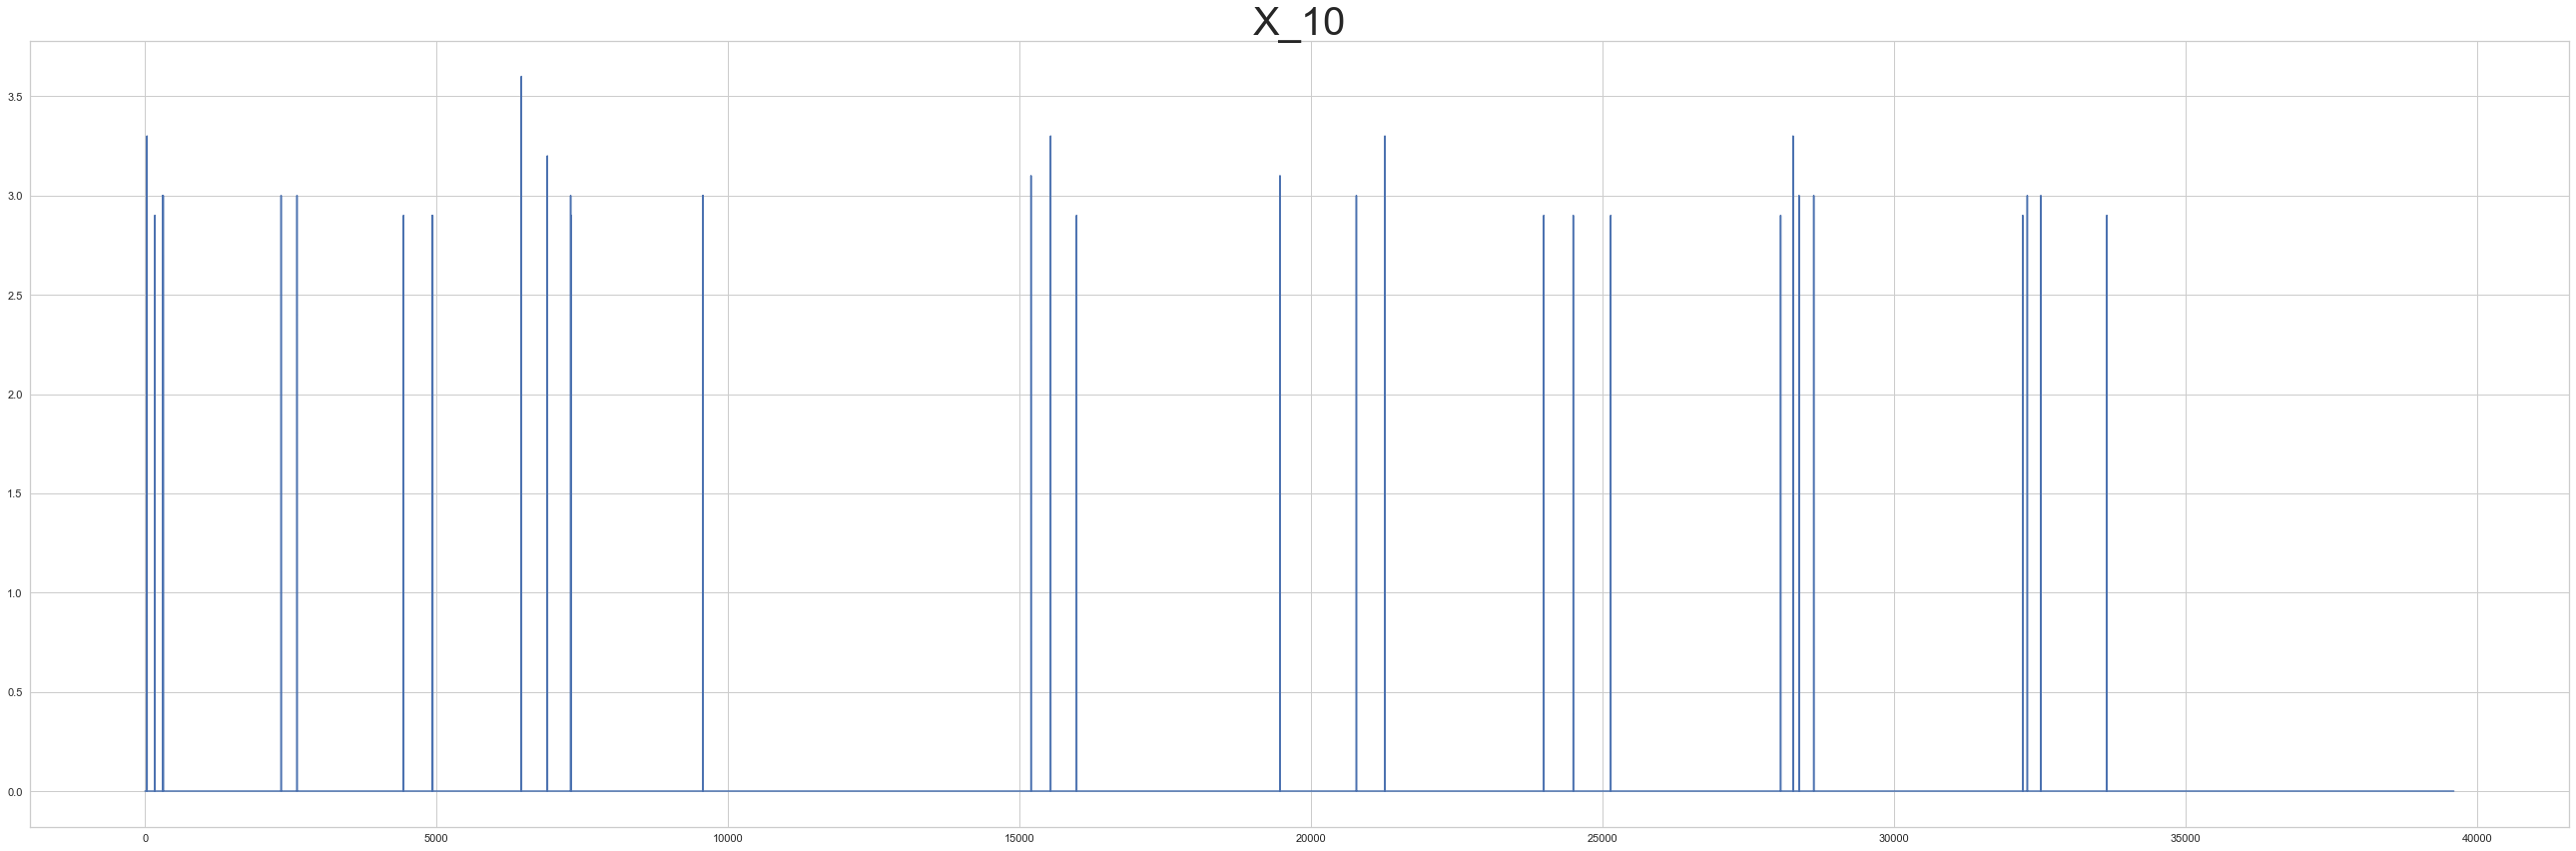

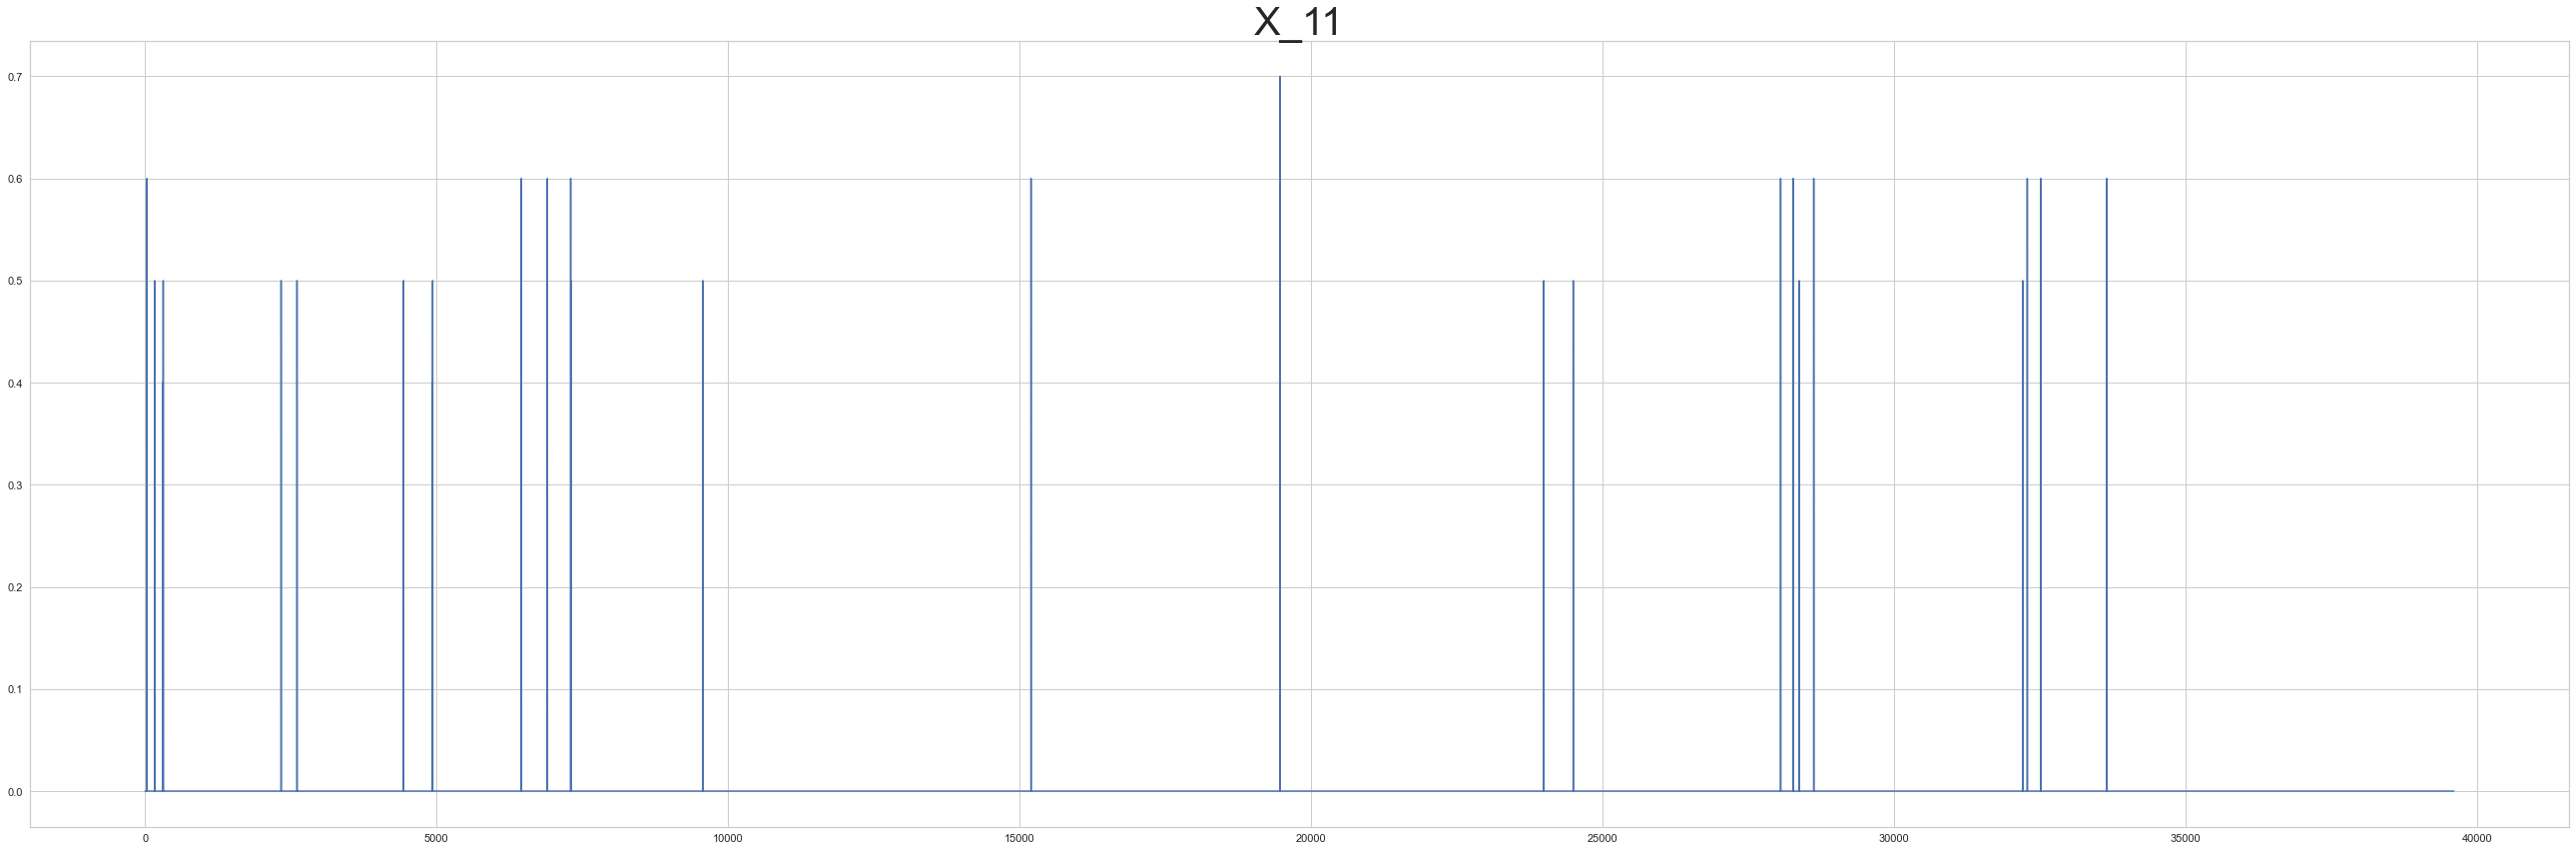

In [39]:
show_plot(train,["X_03", "X_10", "X_11"])

**Obseravation**

* 방열재료 1의 무게에서 바뀐 패턴이 보입니다.
* 방열재료 2,3 대부분 무게가 0, 즉 결측치이며 X_10,X_11 변수를 제거하겠습니다.

## 방열재료 면적

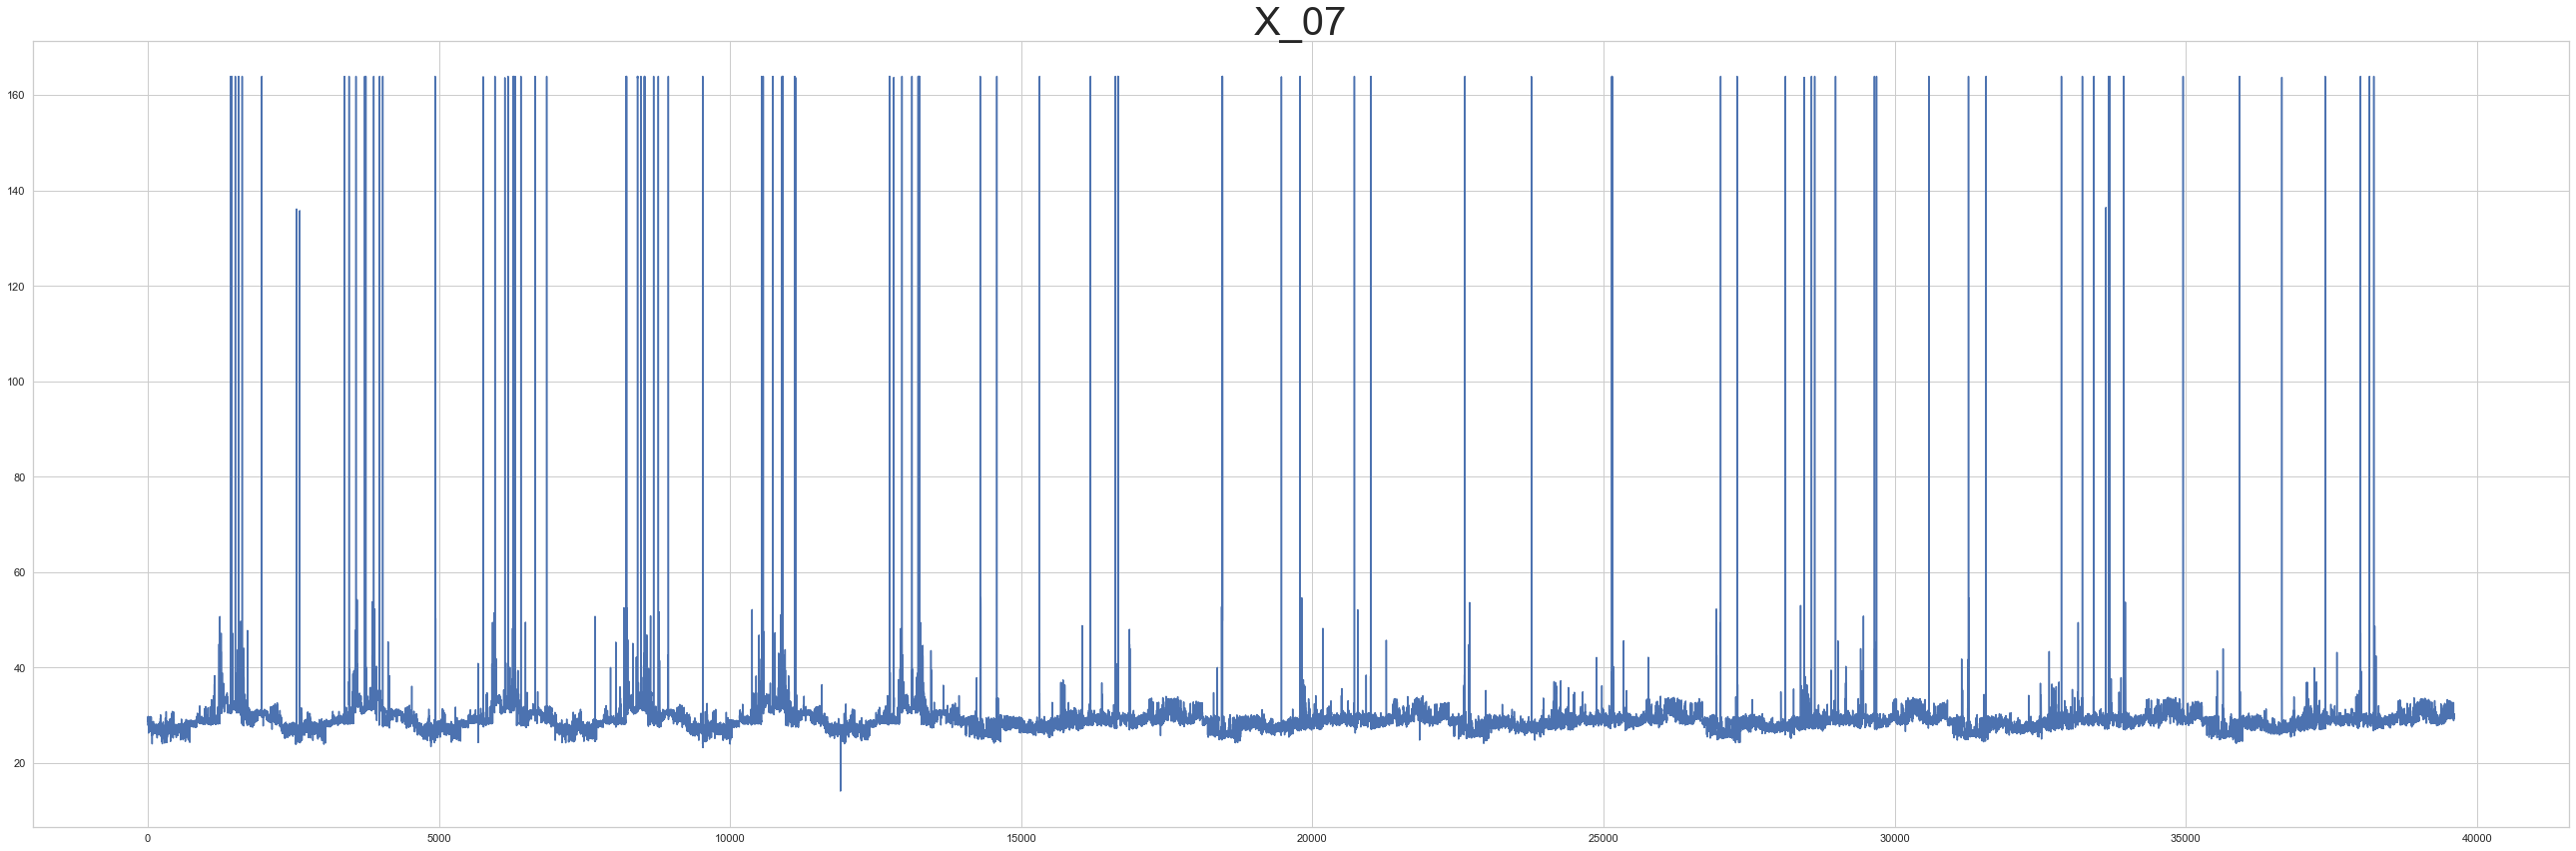

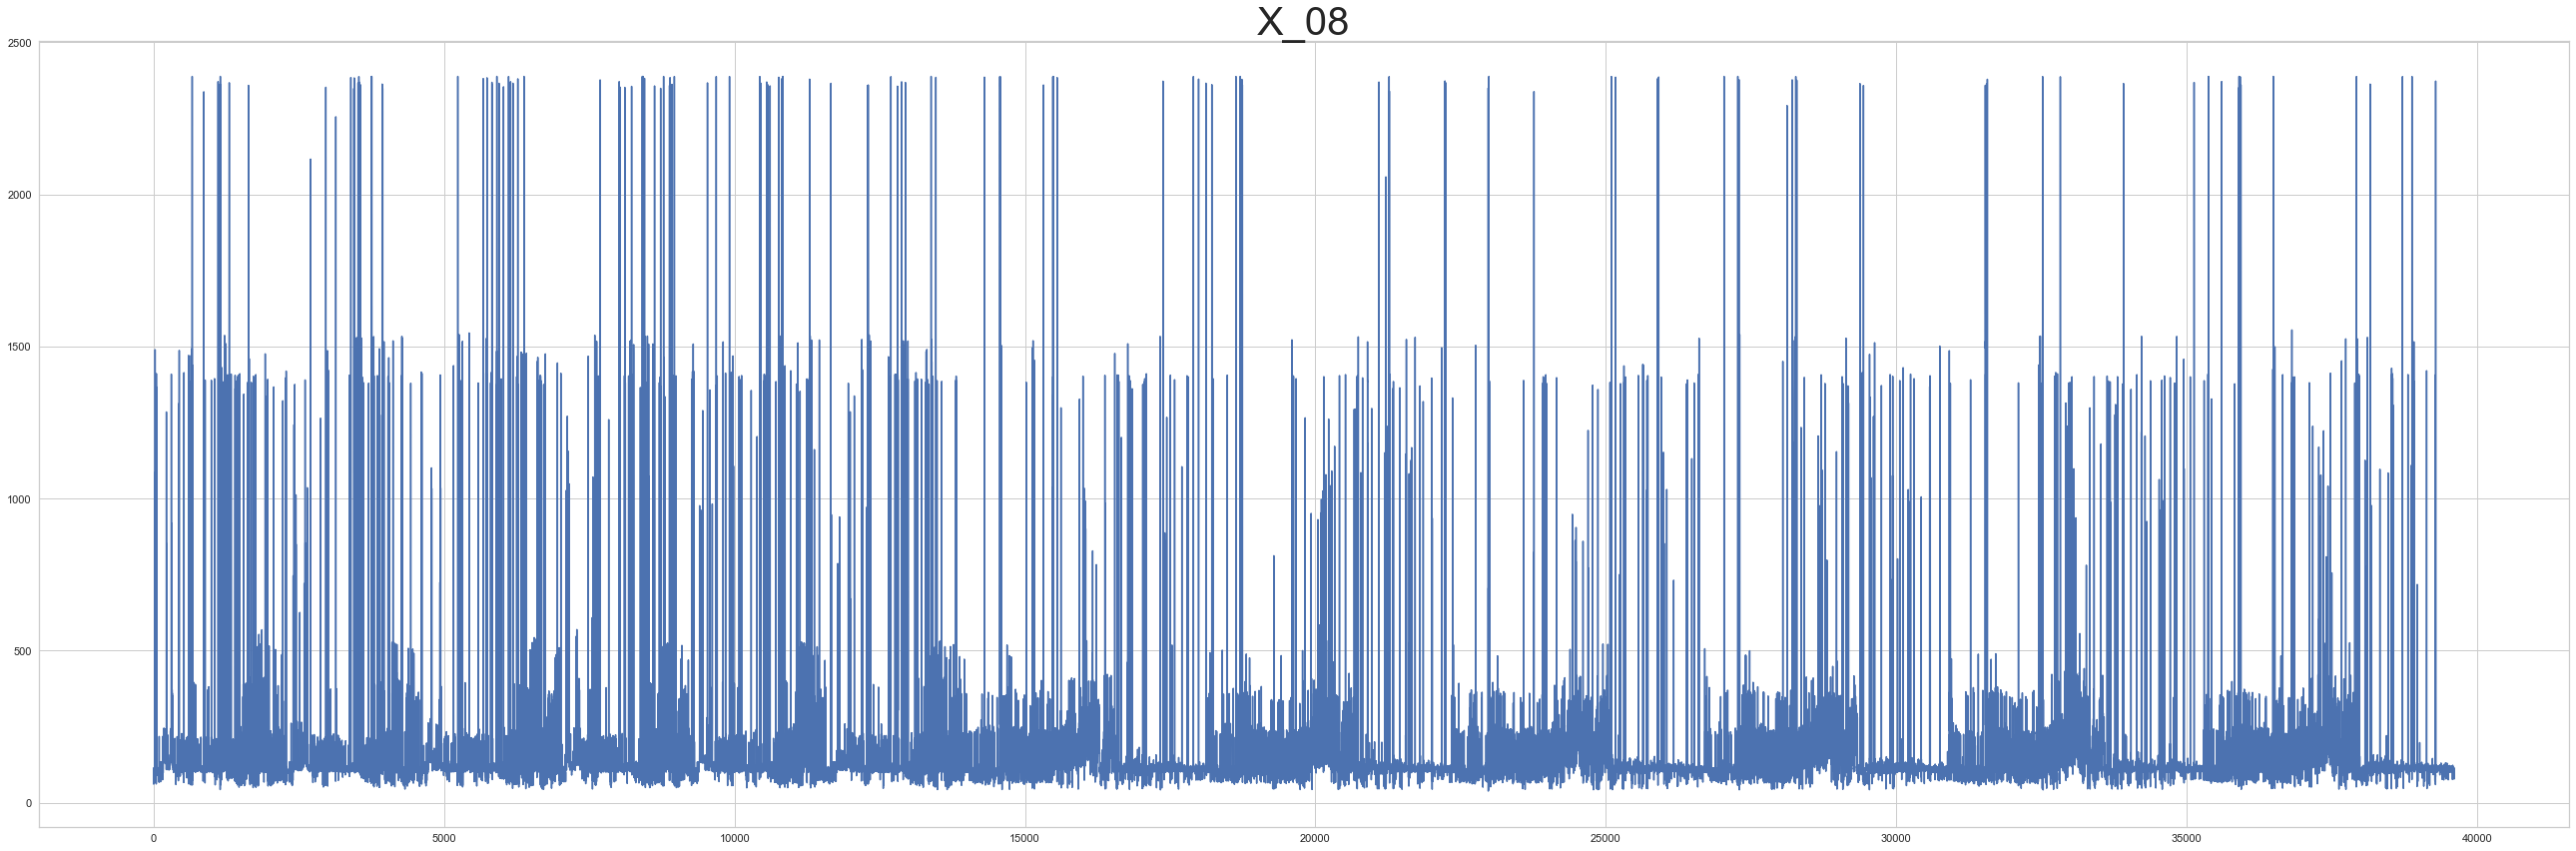

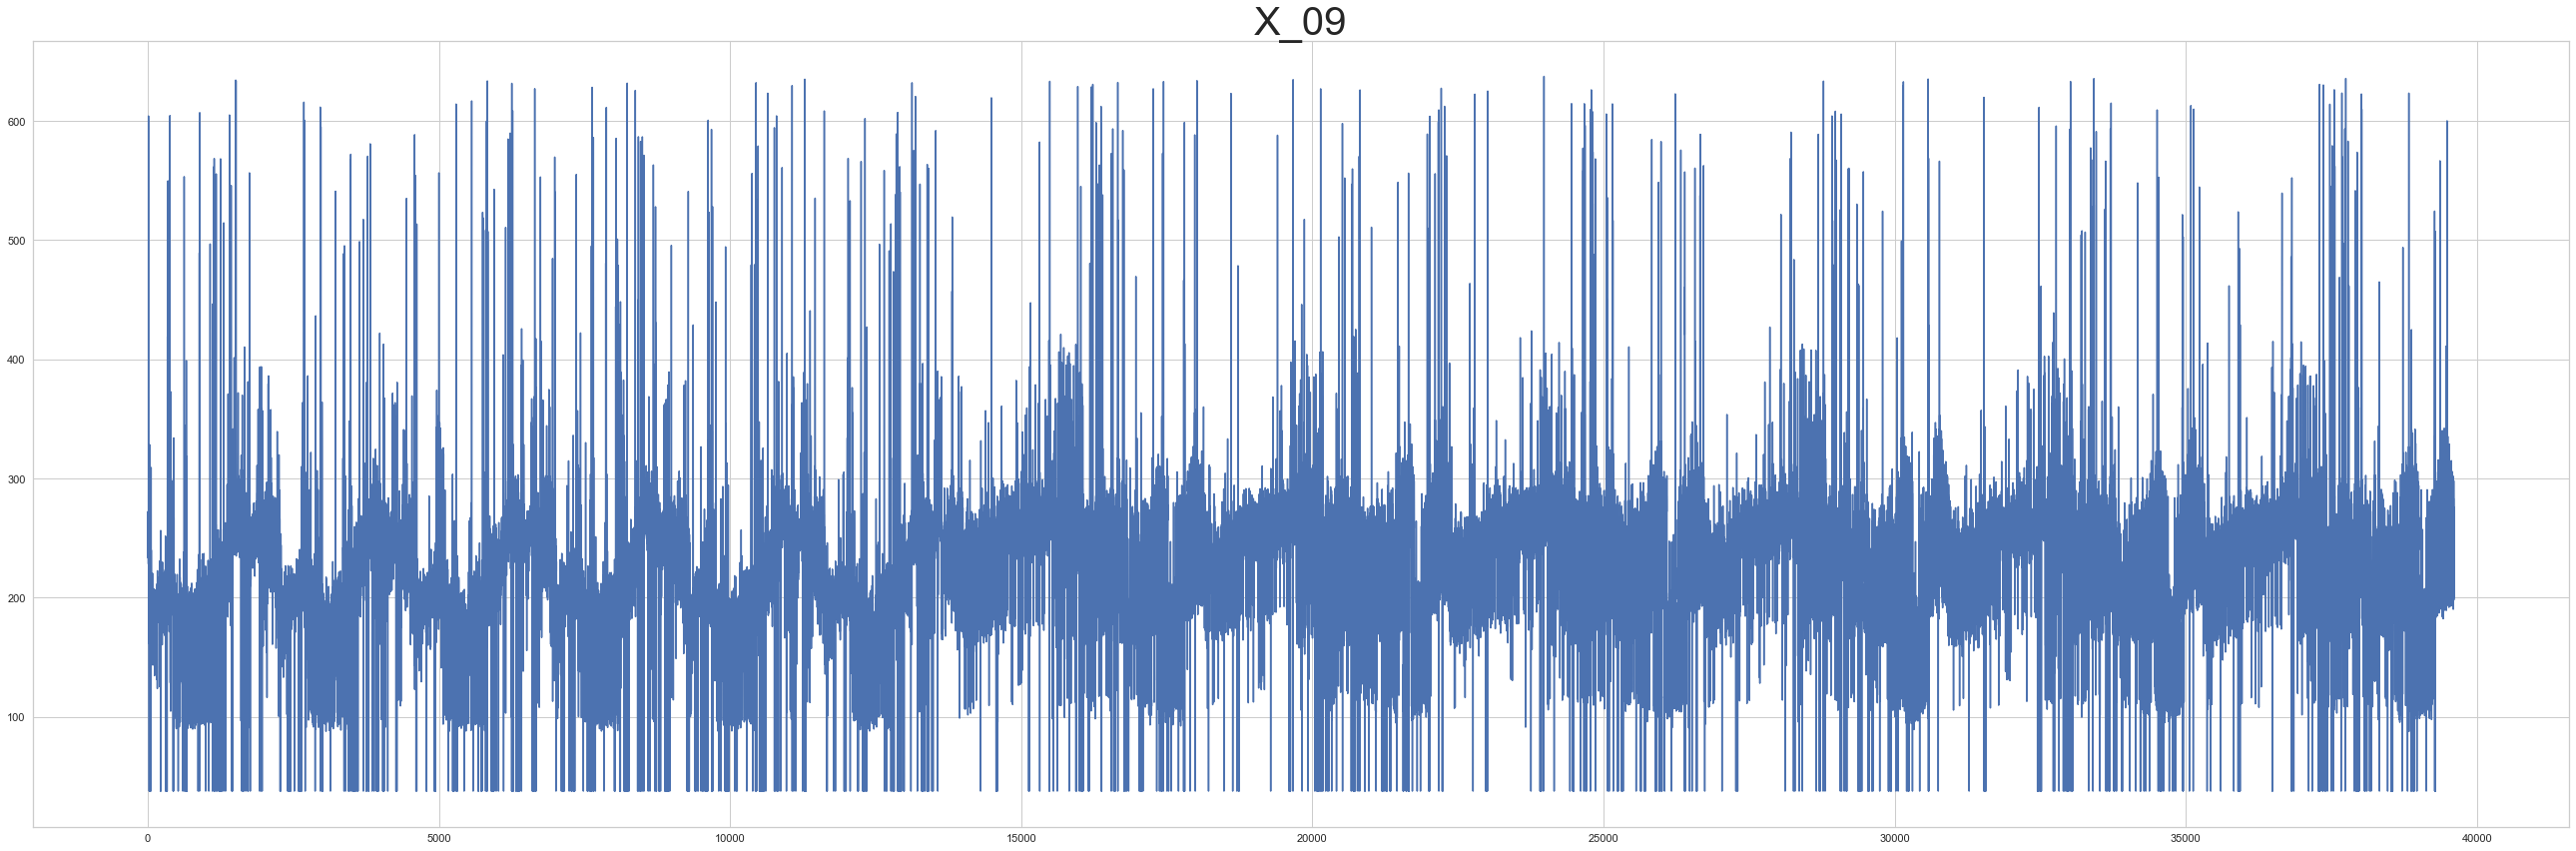

In [40]:
show_plot(train,["X_07", "X_08", "X_09"])

**Observation**

* 이상치가 비교적 많이 존재합니다.


## 커넥터 위치 기준 좌표

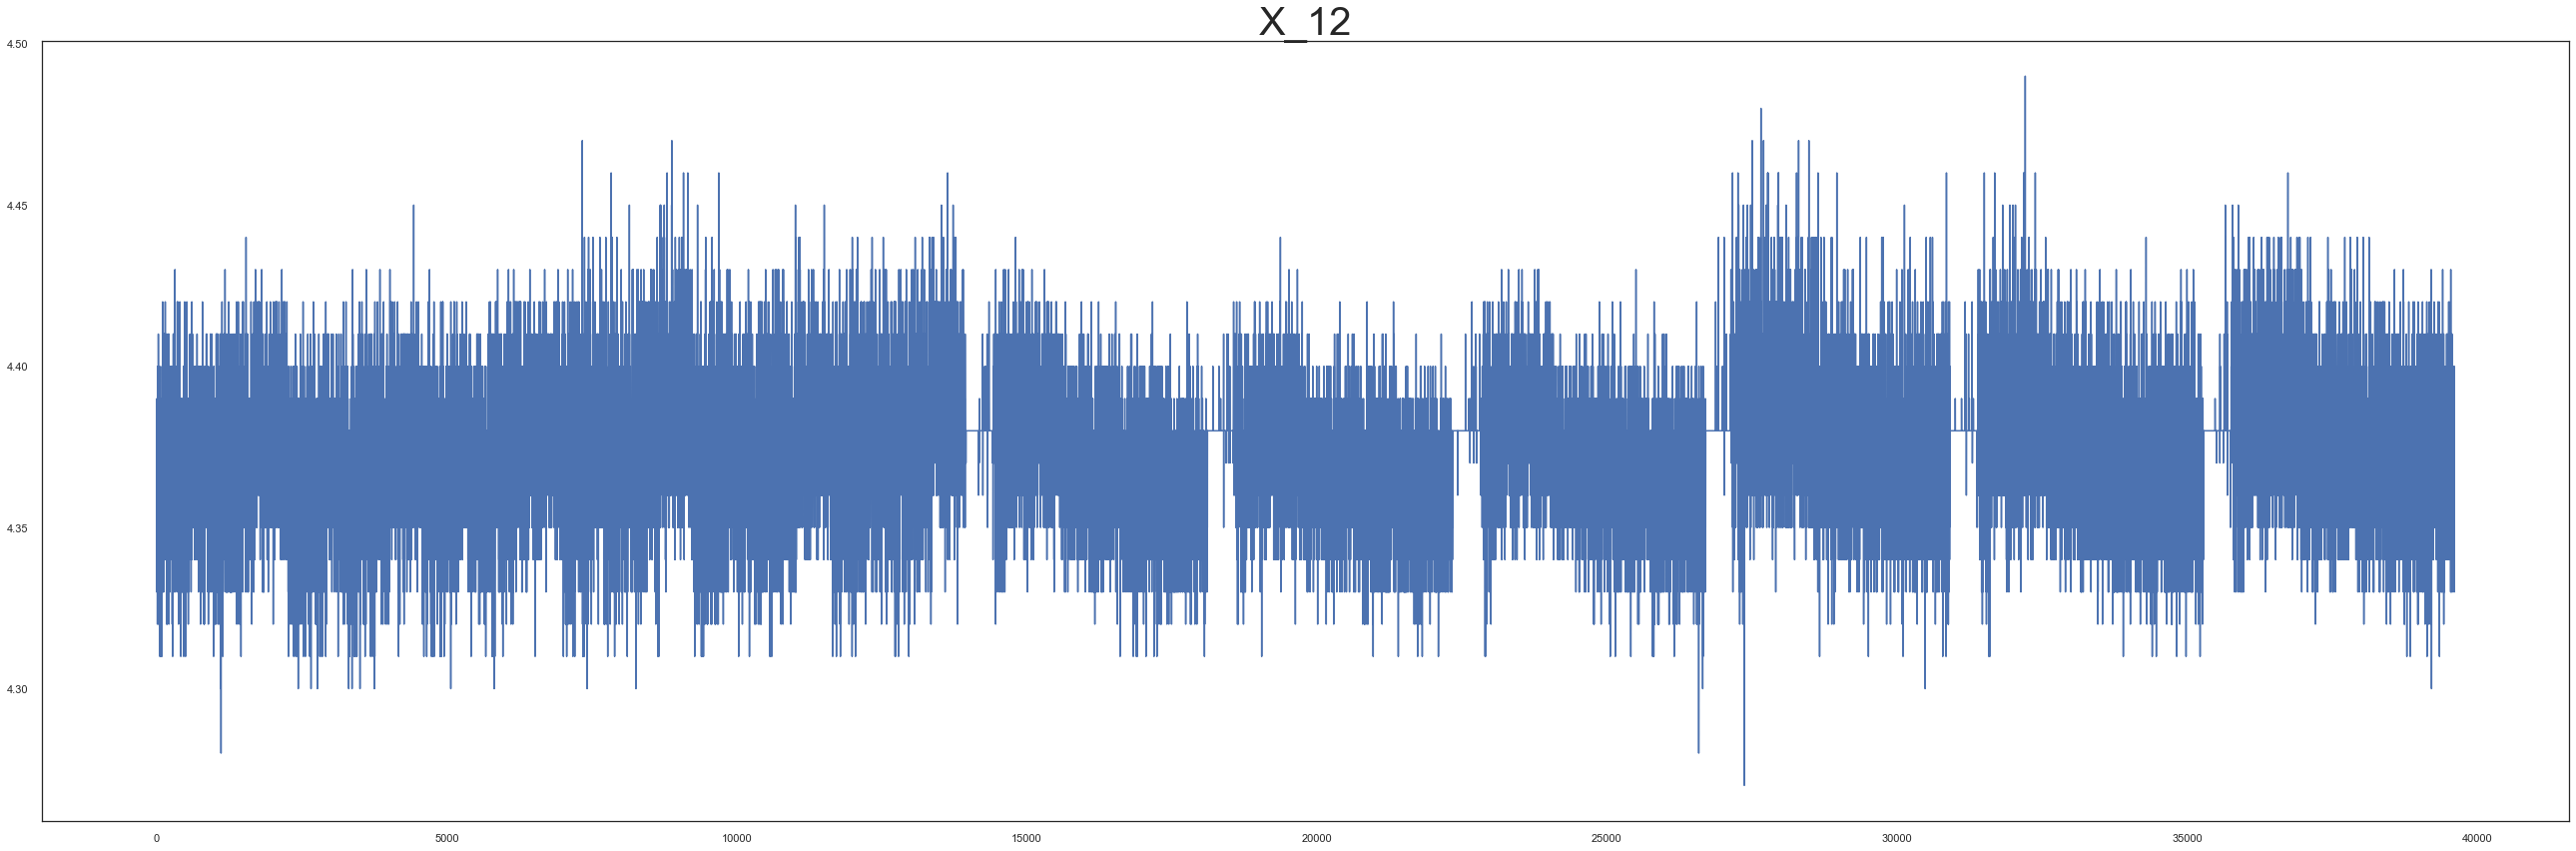

In [189]:
show_plot(train,['X_12'])

(12000.0, 15000.0)

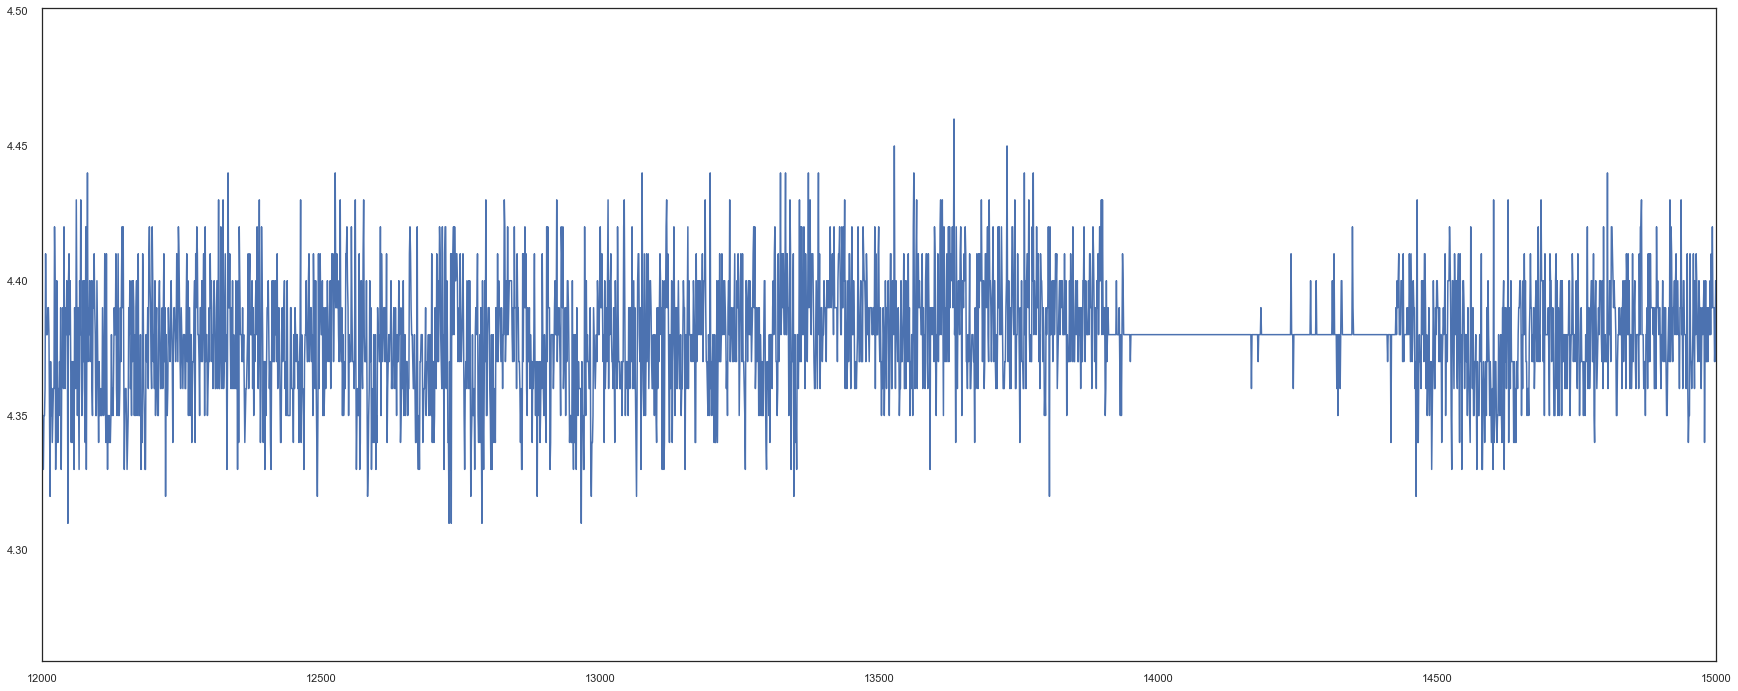

In [202]:
#확대
plt.figure(figsize=(30,12))
plt.plot(train['X_12'])
plt.xlim(12000,15000)

**Obseravation**

* 좌표가 바뀌지 않고 이전 값으로 동일하게 적용되는 구간이 여럿 존재합니다.

## 커넥터 핀 치수

<Figure size 432x288 with 0 Axes>

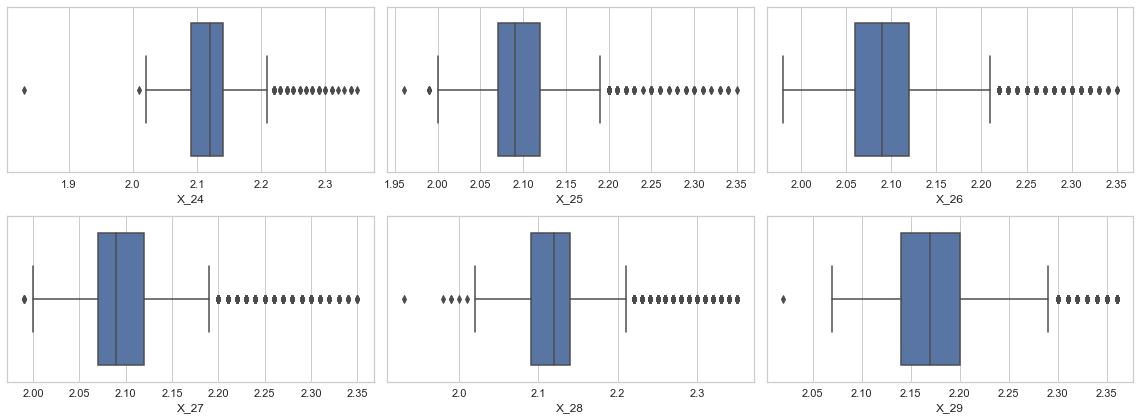

In [44]:
#vio로 좀더 추가
i=0
plt.figure()
plt.subplots(2,3,figsize=(16,6))
for col in ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"]:
    i+=1
    plt.subplot(2,3,i)
    sns.boxplot(train[col])
plt.tight_layout()

Text(0.5, 1.0, 'Dist.')

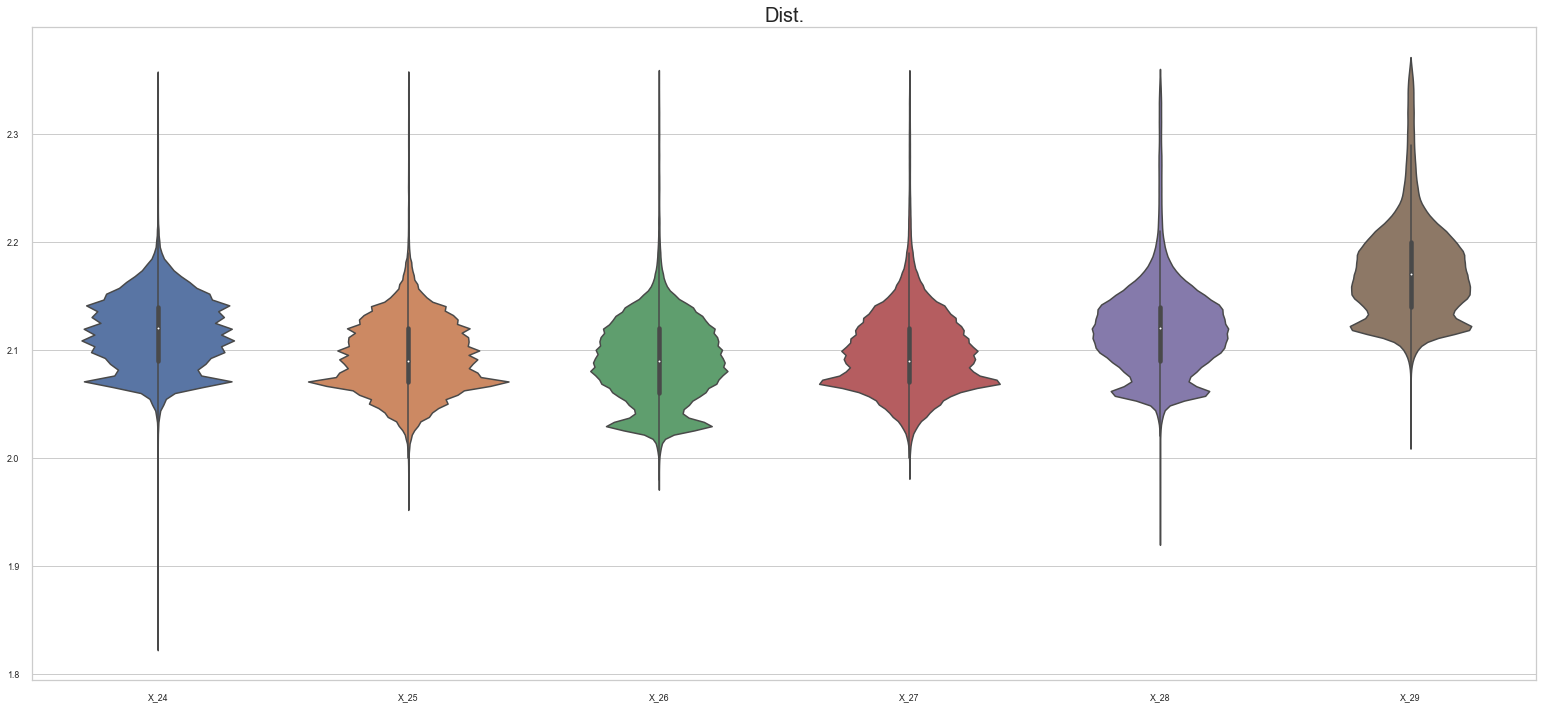

In [99]:
#violineplot
plt.figure(figsize=(24,12))
df=train[["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"]]
sns.violinplot(data=df)
plt.title("Dist.",fontsize=20)

## 스크류 삽입 깊이

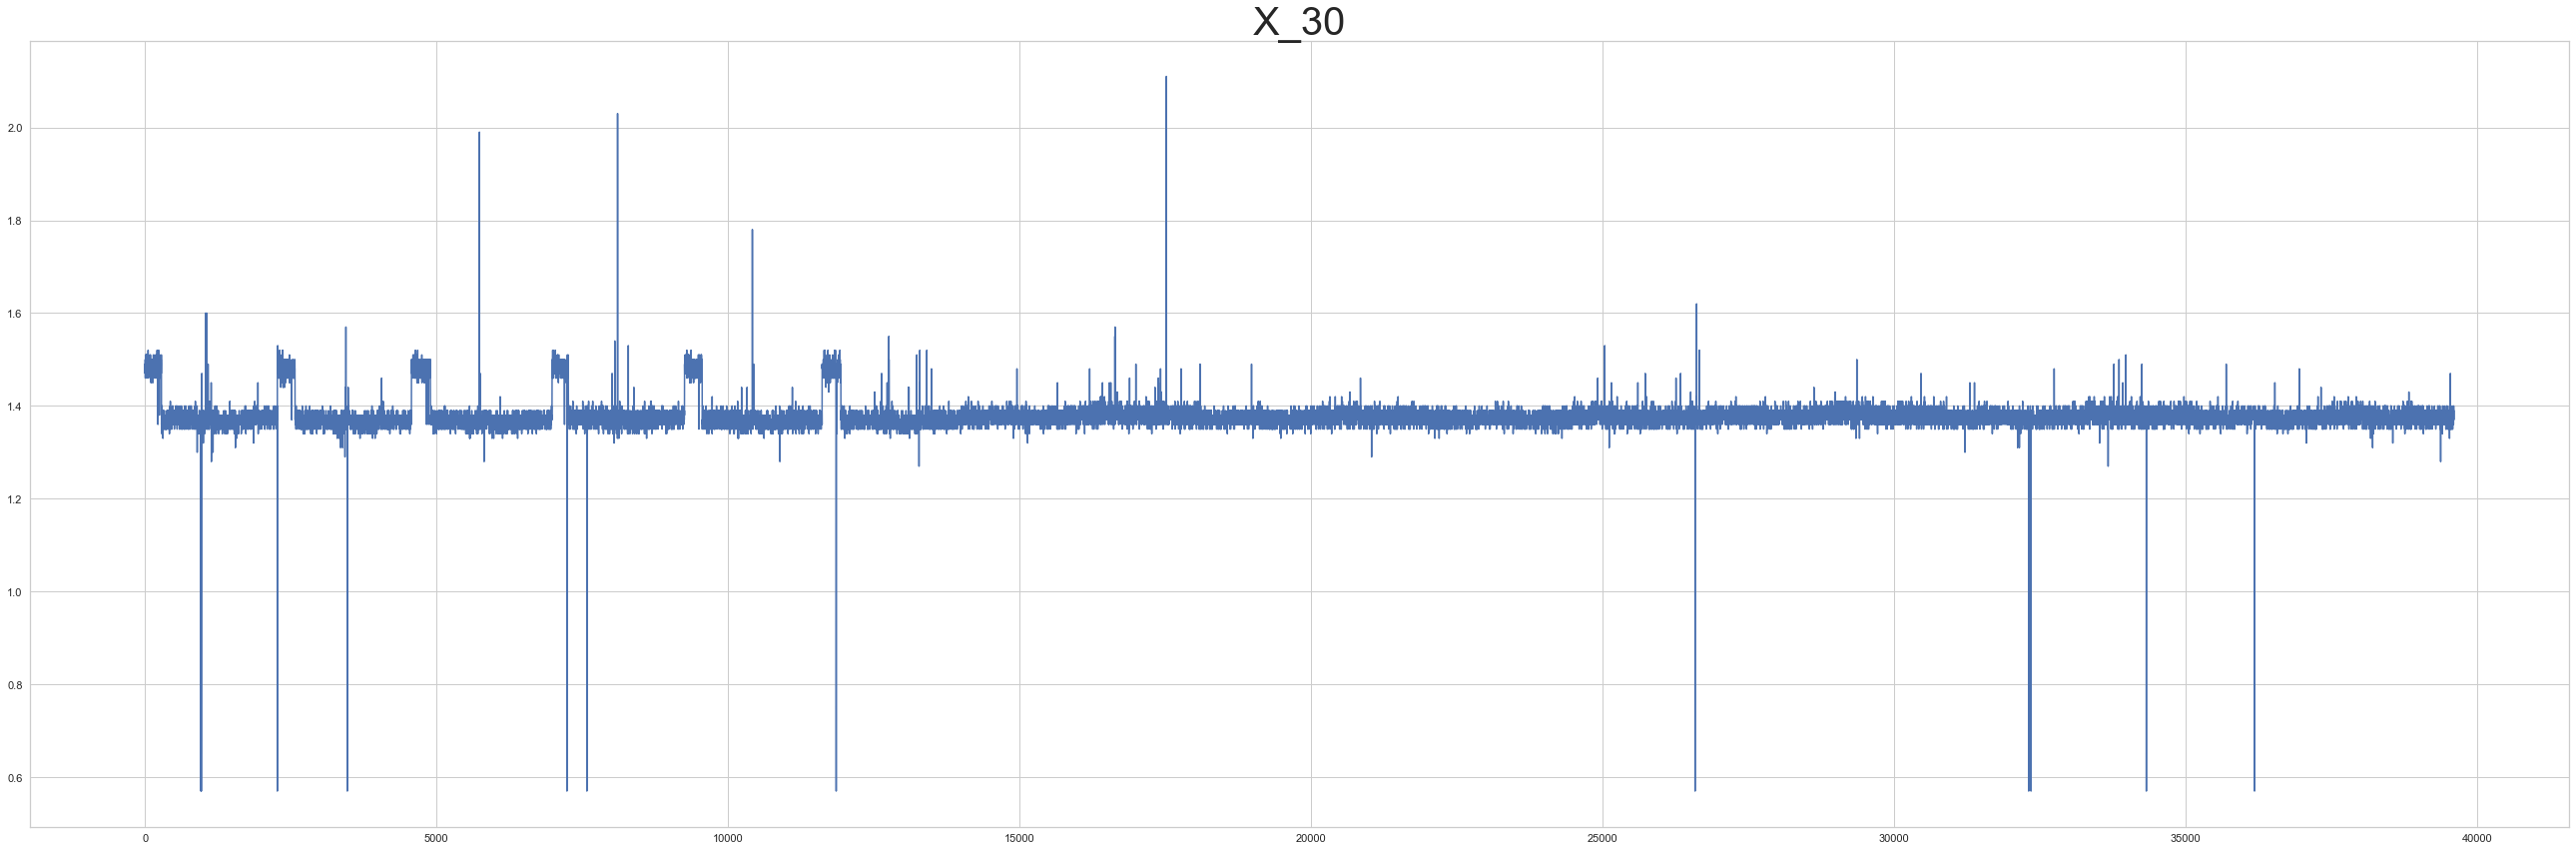

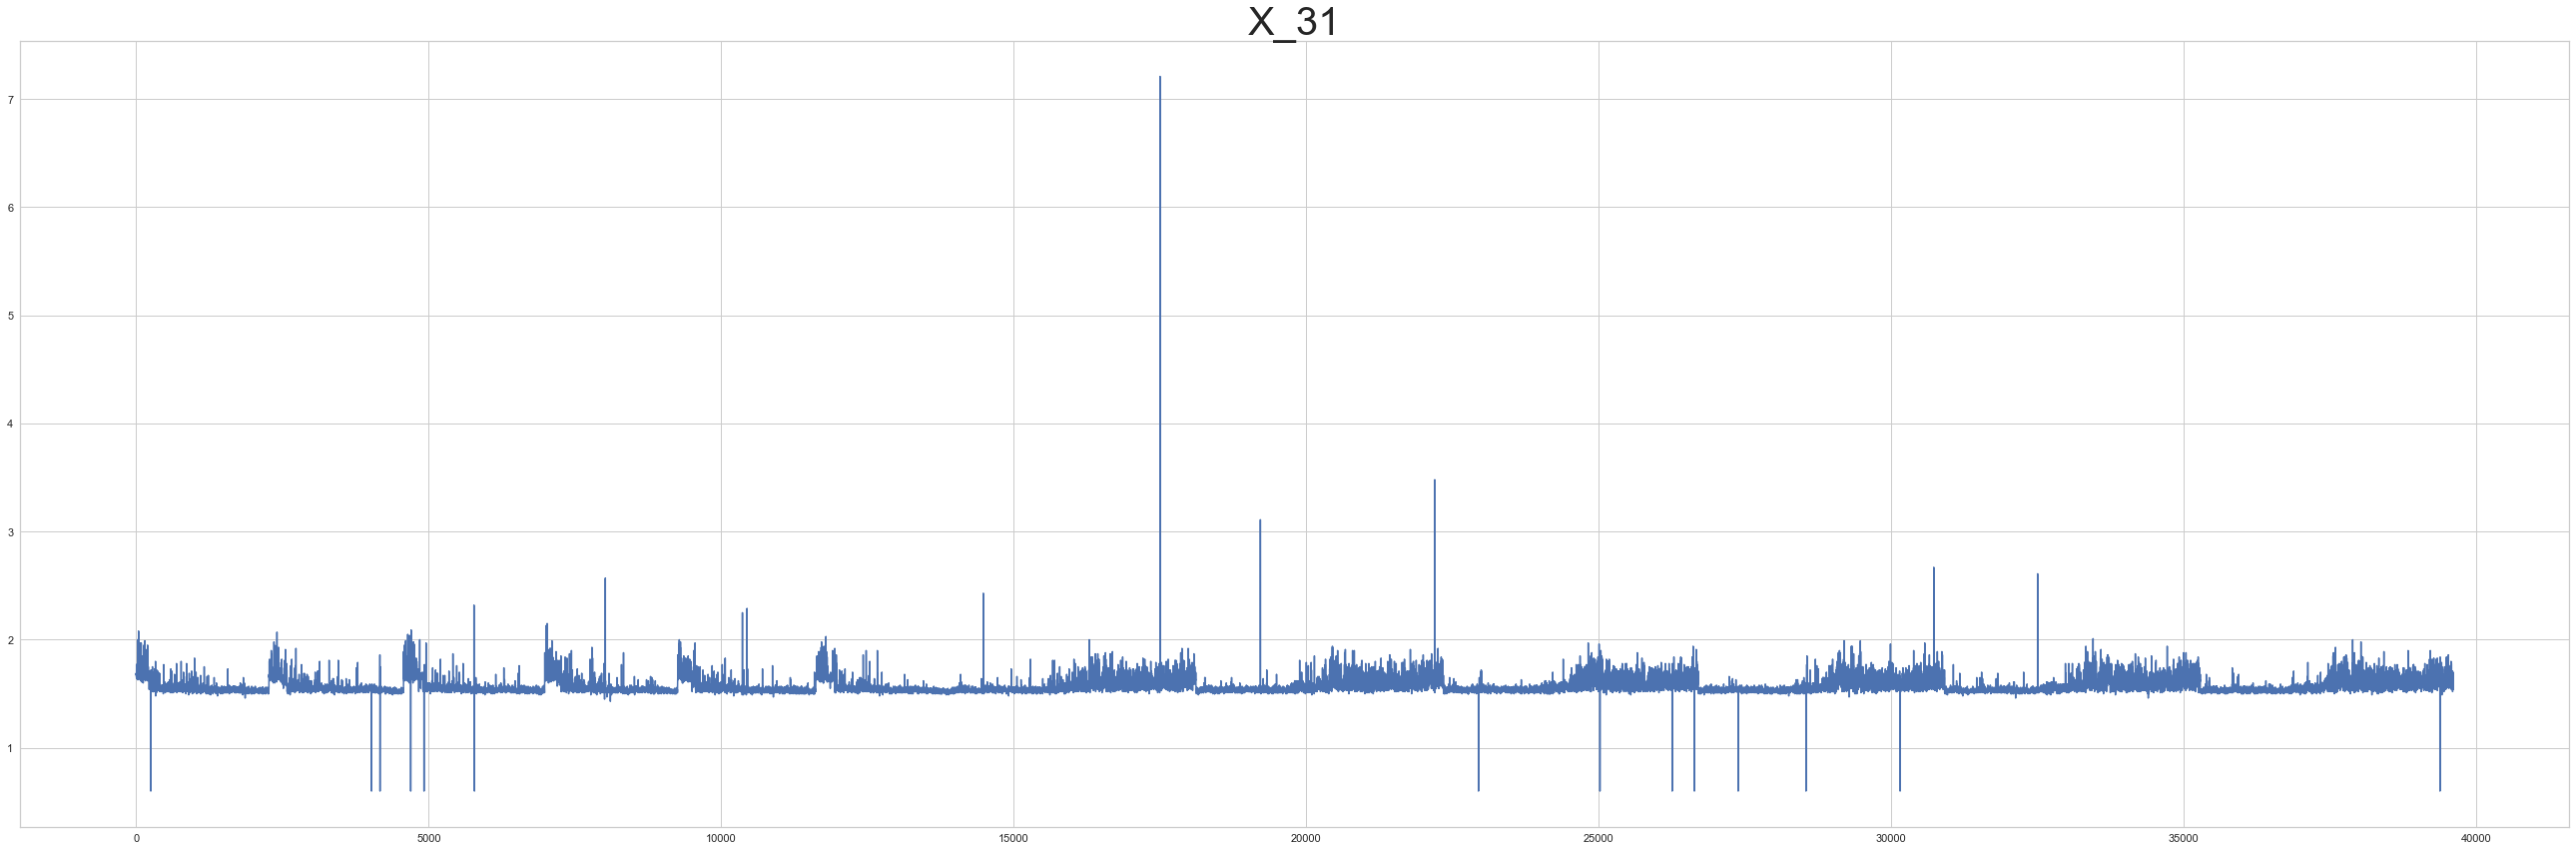

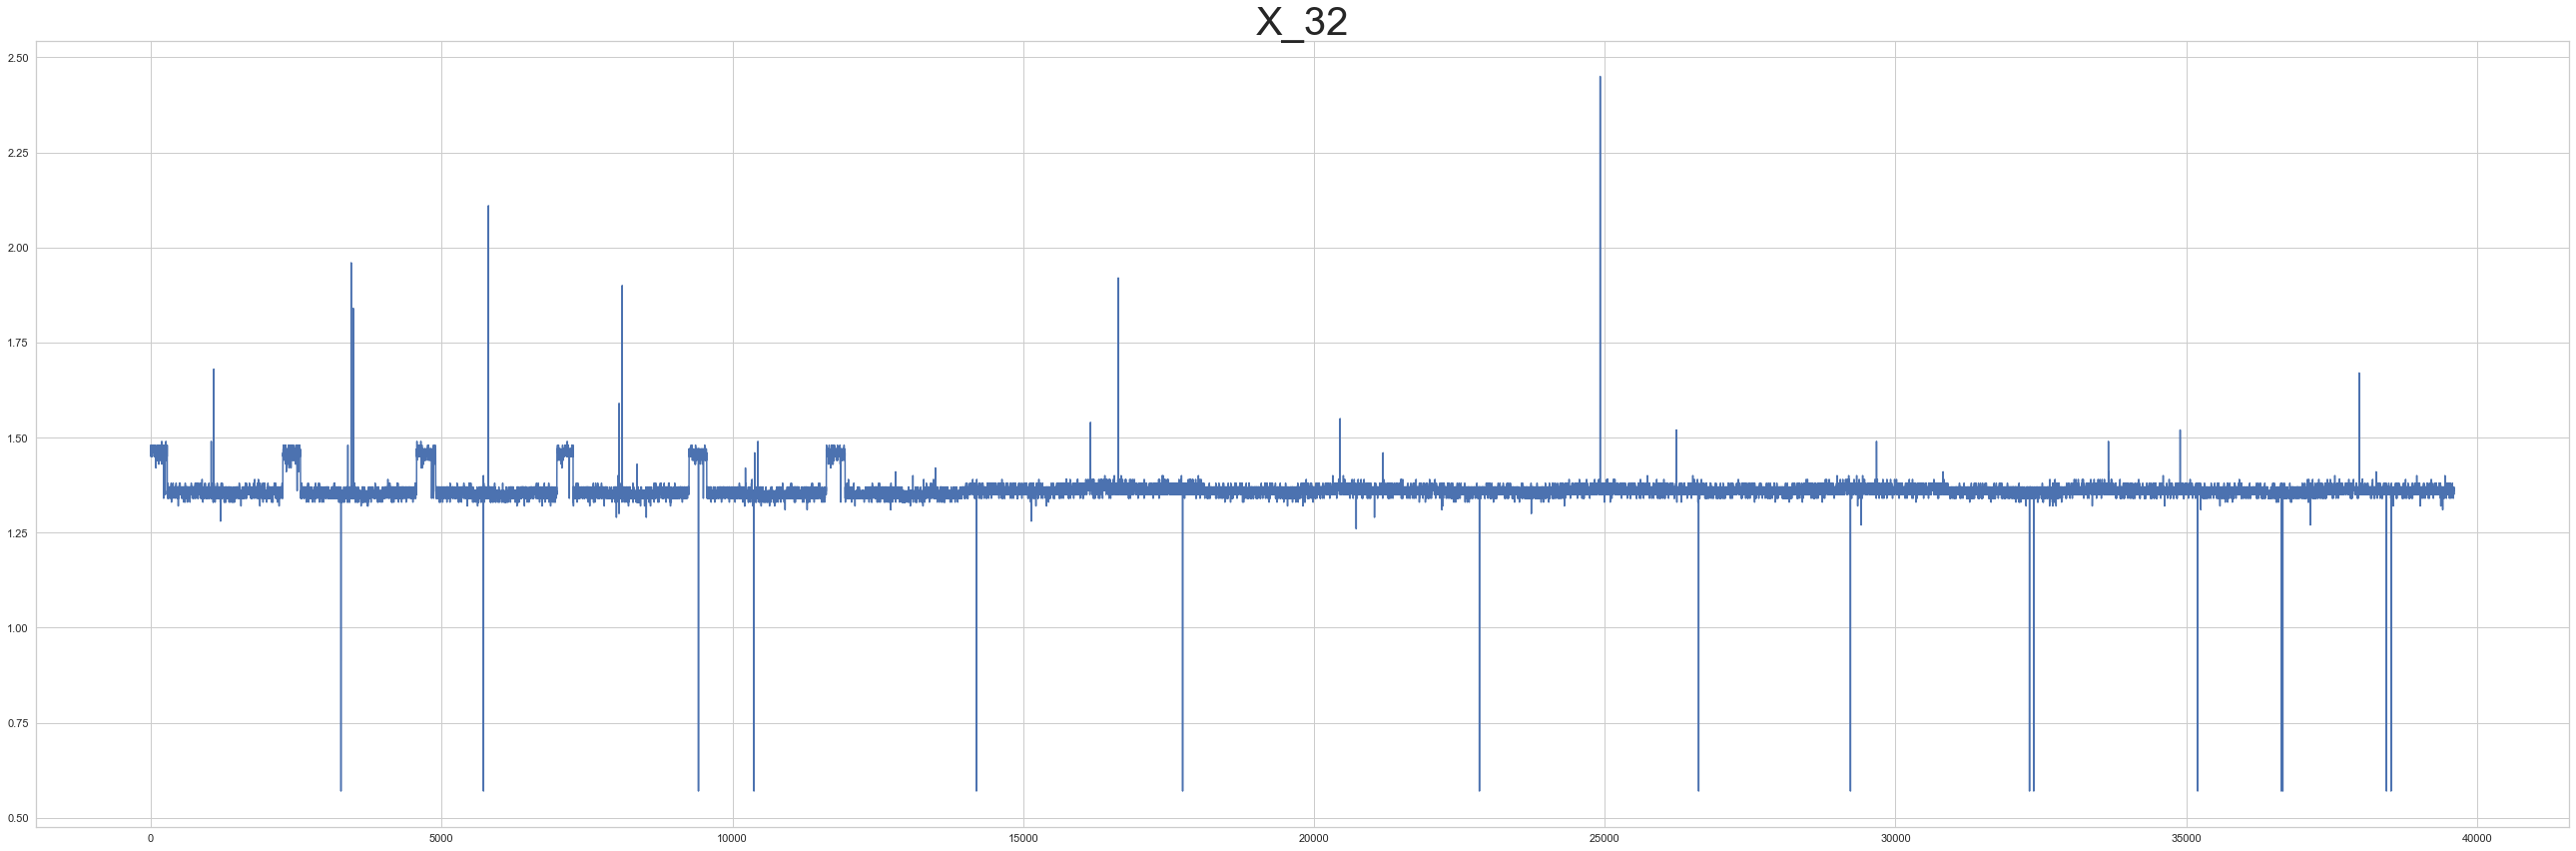

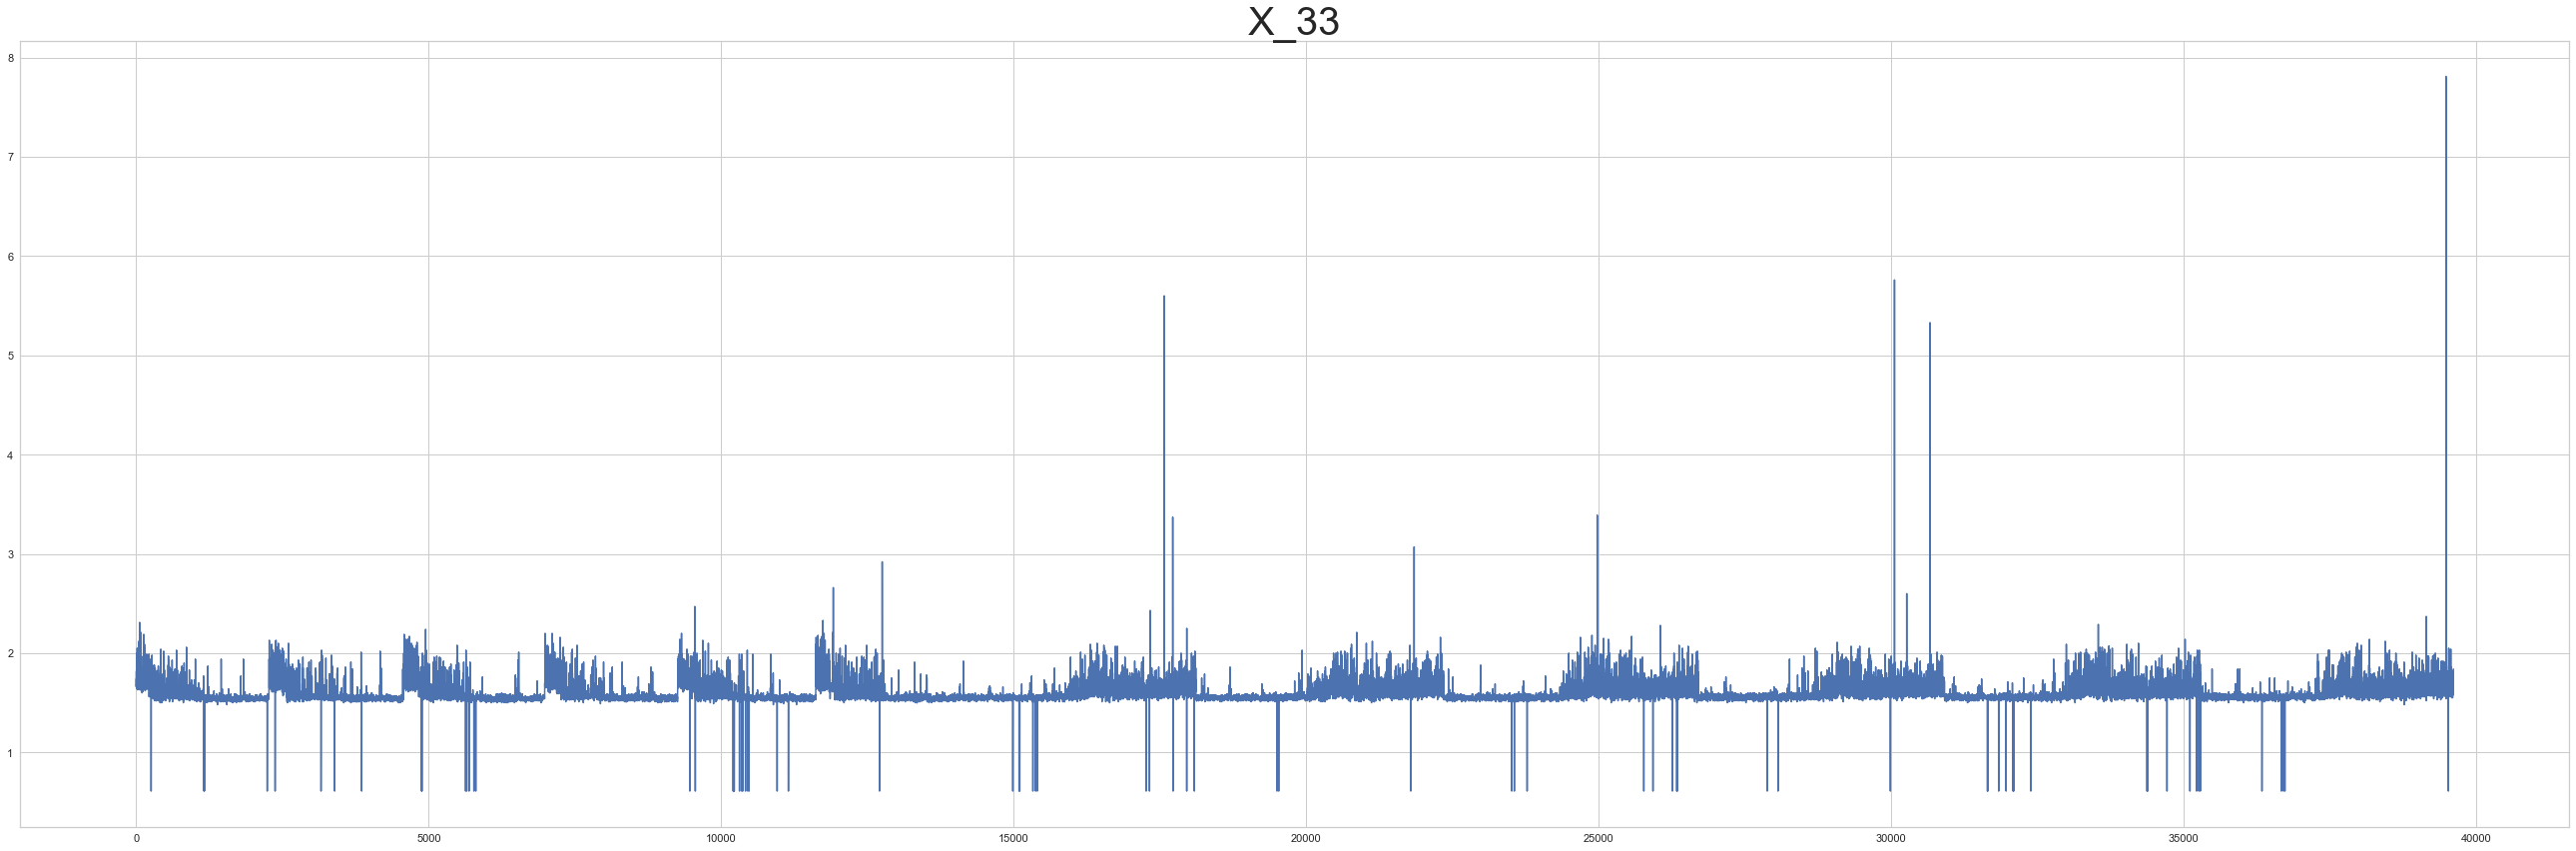

In [51]:
show_plot(train,["X_30", "X_31", "X_32", "X_33"])

**Obseravation**

* 스크류 삽입 깊이는 대부분 평탄하게 이루어져야 하는데 심각한 편차를 보이지 않습니다.
* X_30와 X_32, X_31와 X_33가 분포가 유사합니다.

## 스크류 체결 시 분당 회전수 

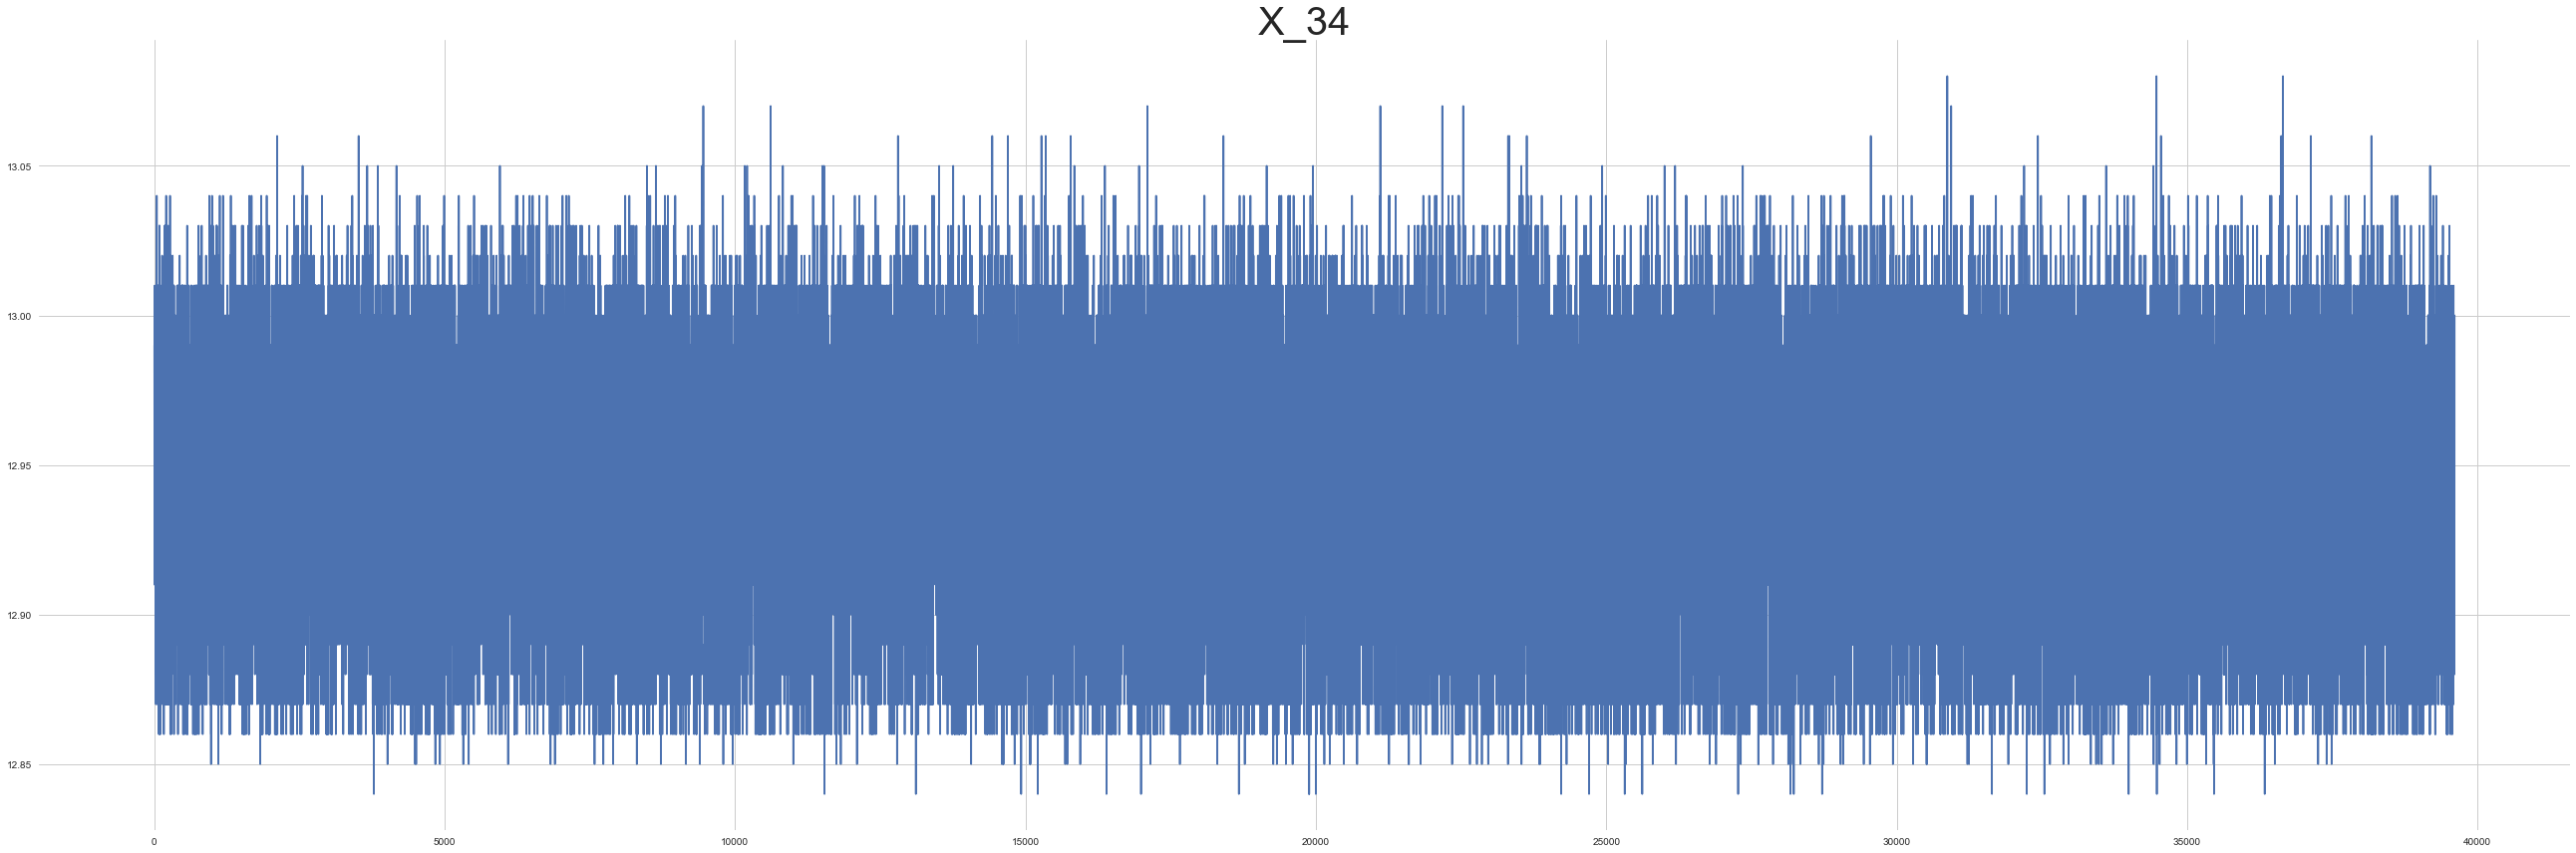

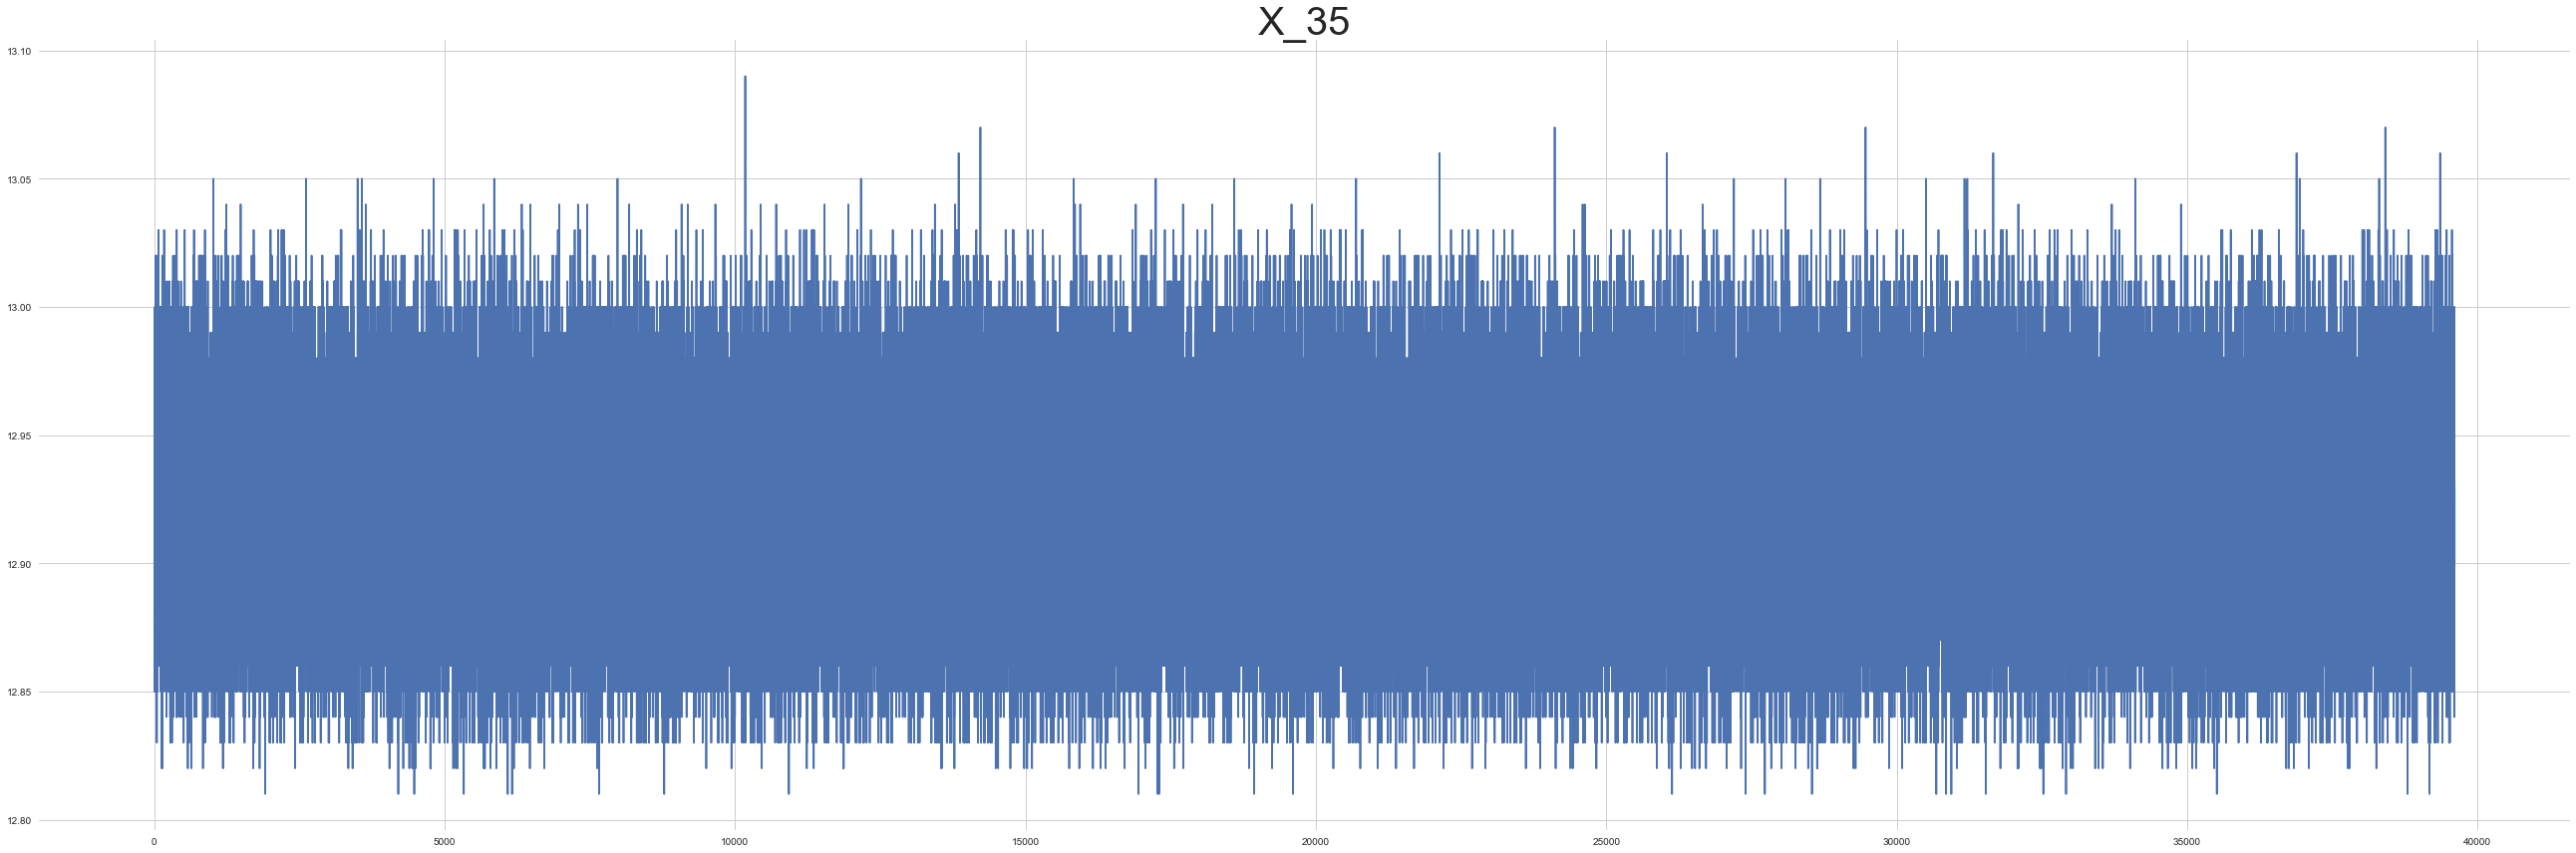

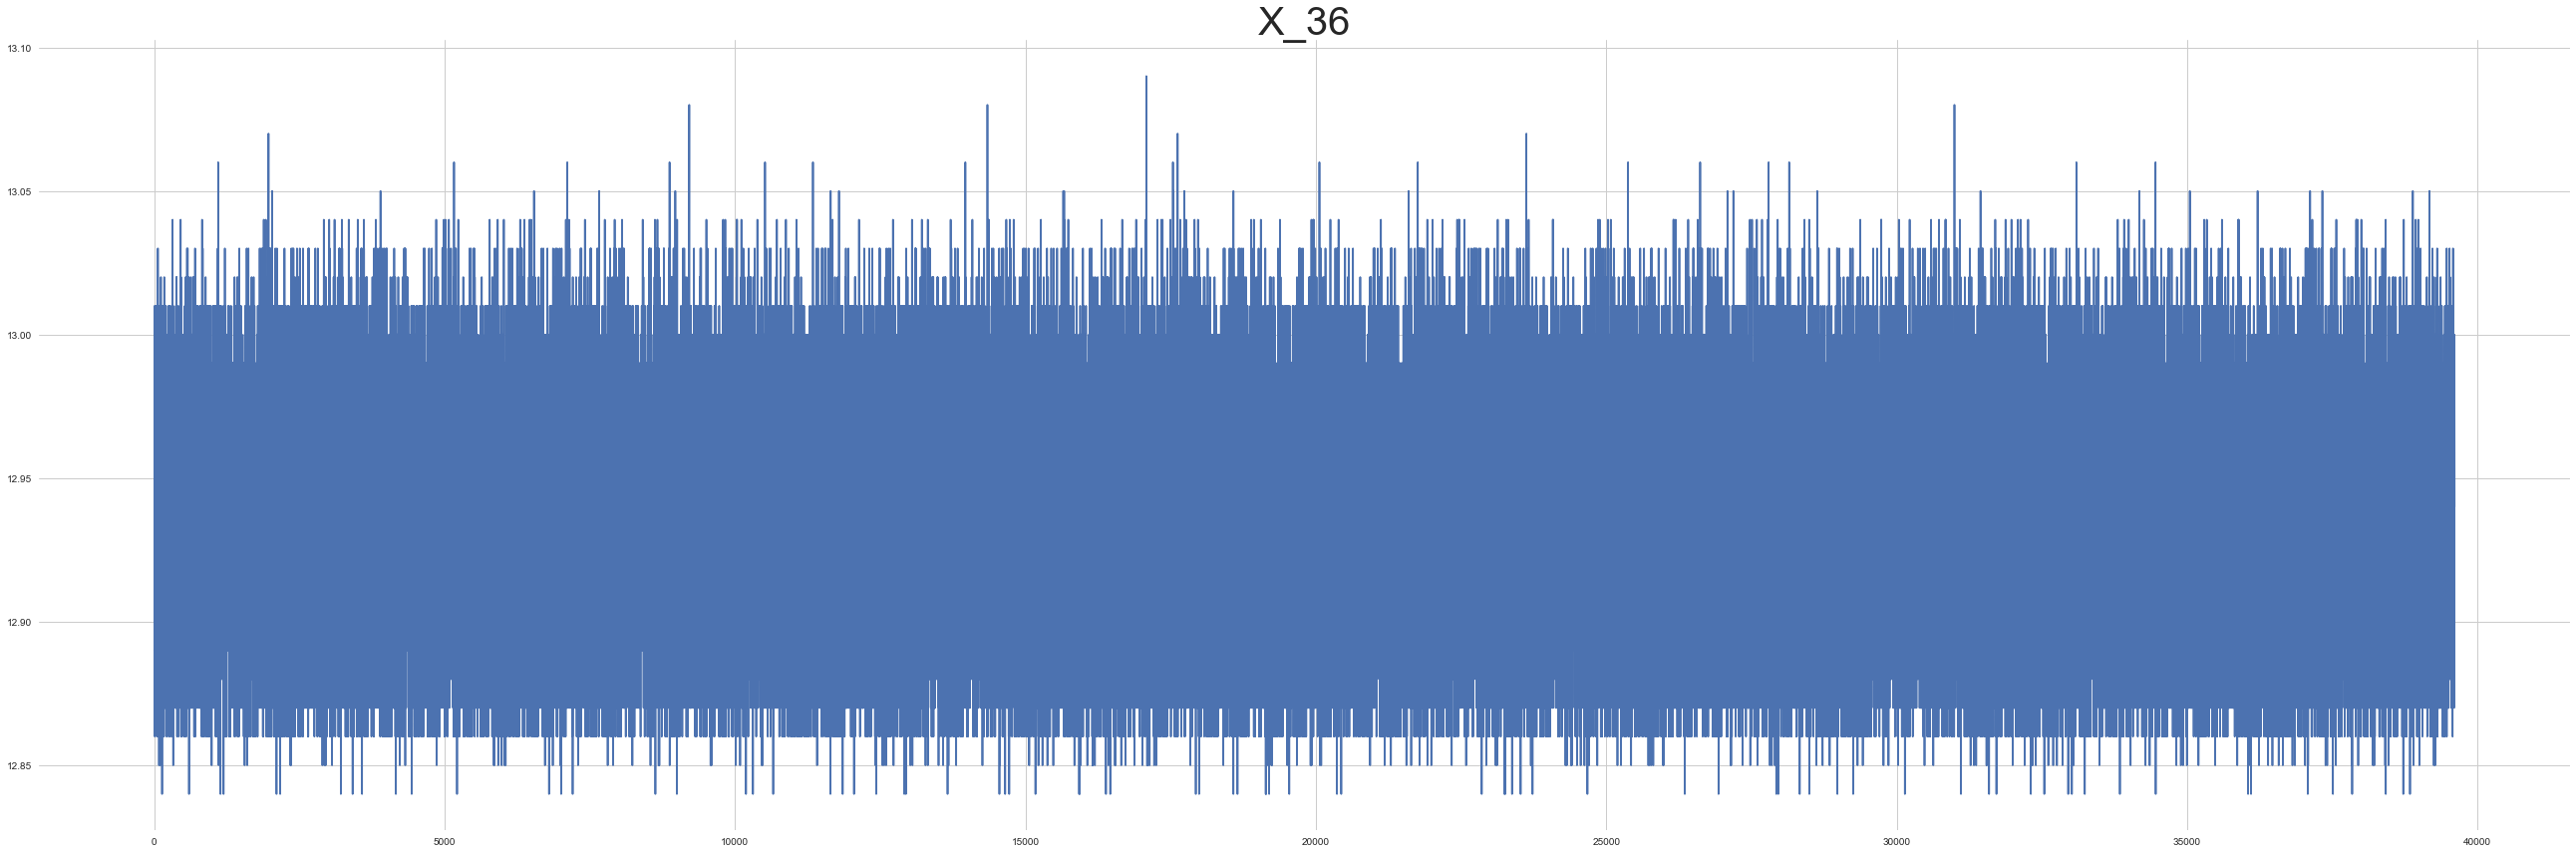

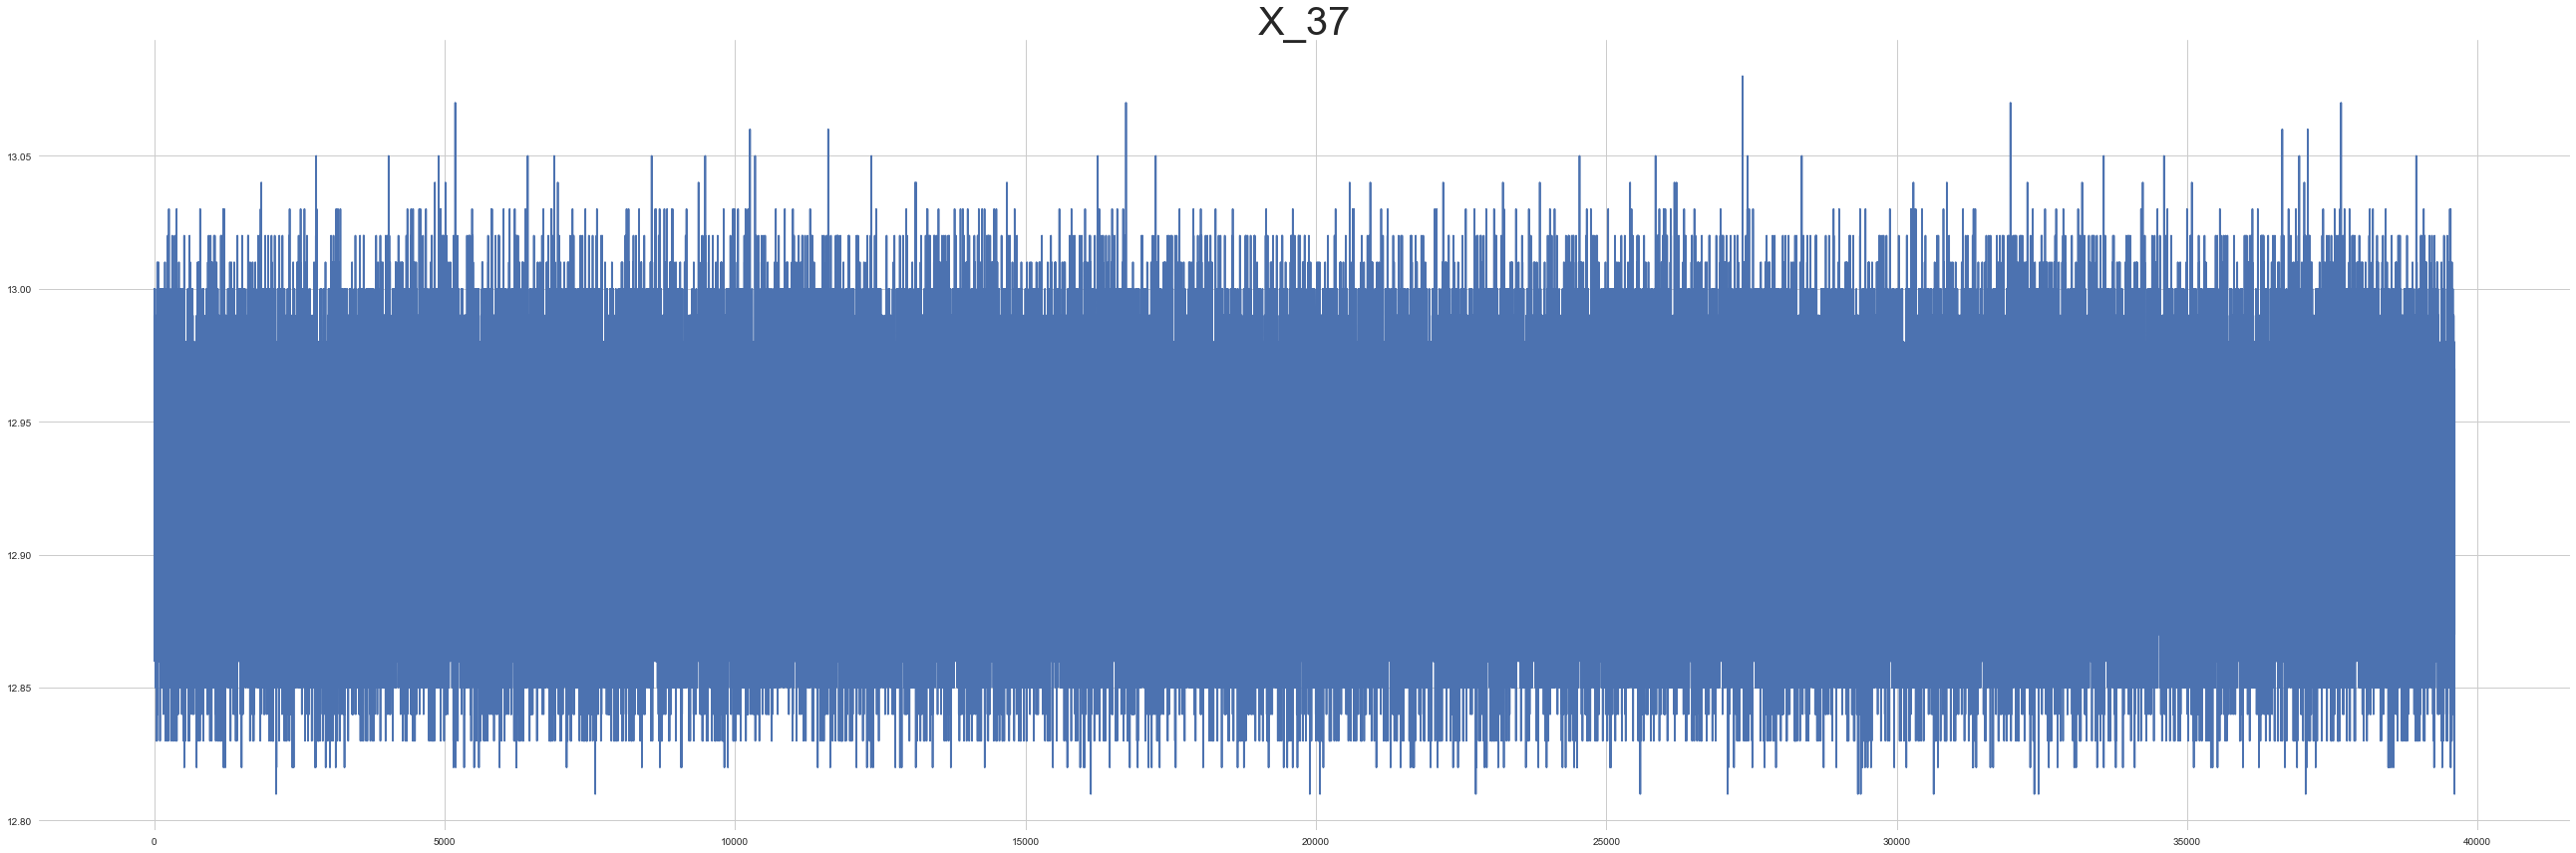

In [148]:
show_plot(train,["X_34", "X_35", "X_36", "X_37"])

**Observation**

* 편차가 크지 않습니다.

## 하우징 PCB 안착부 치수

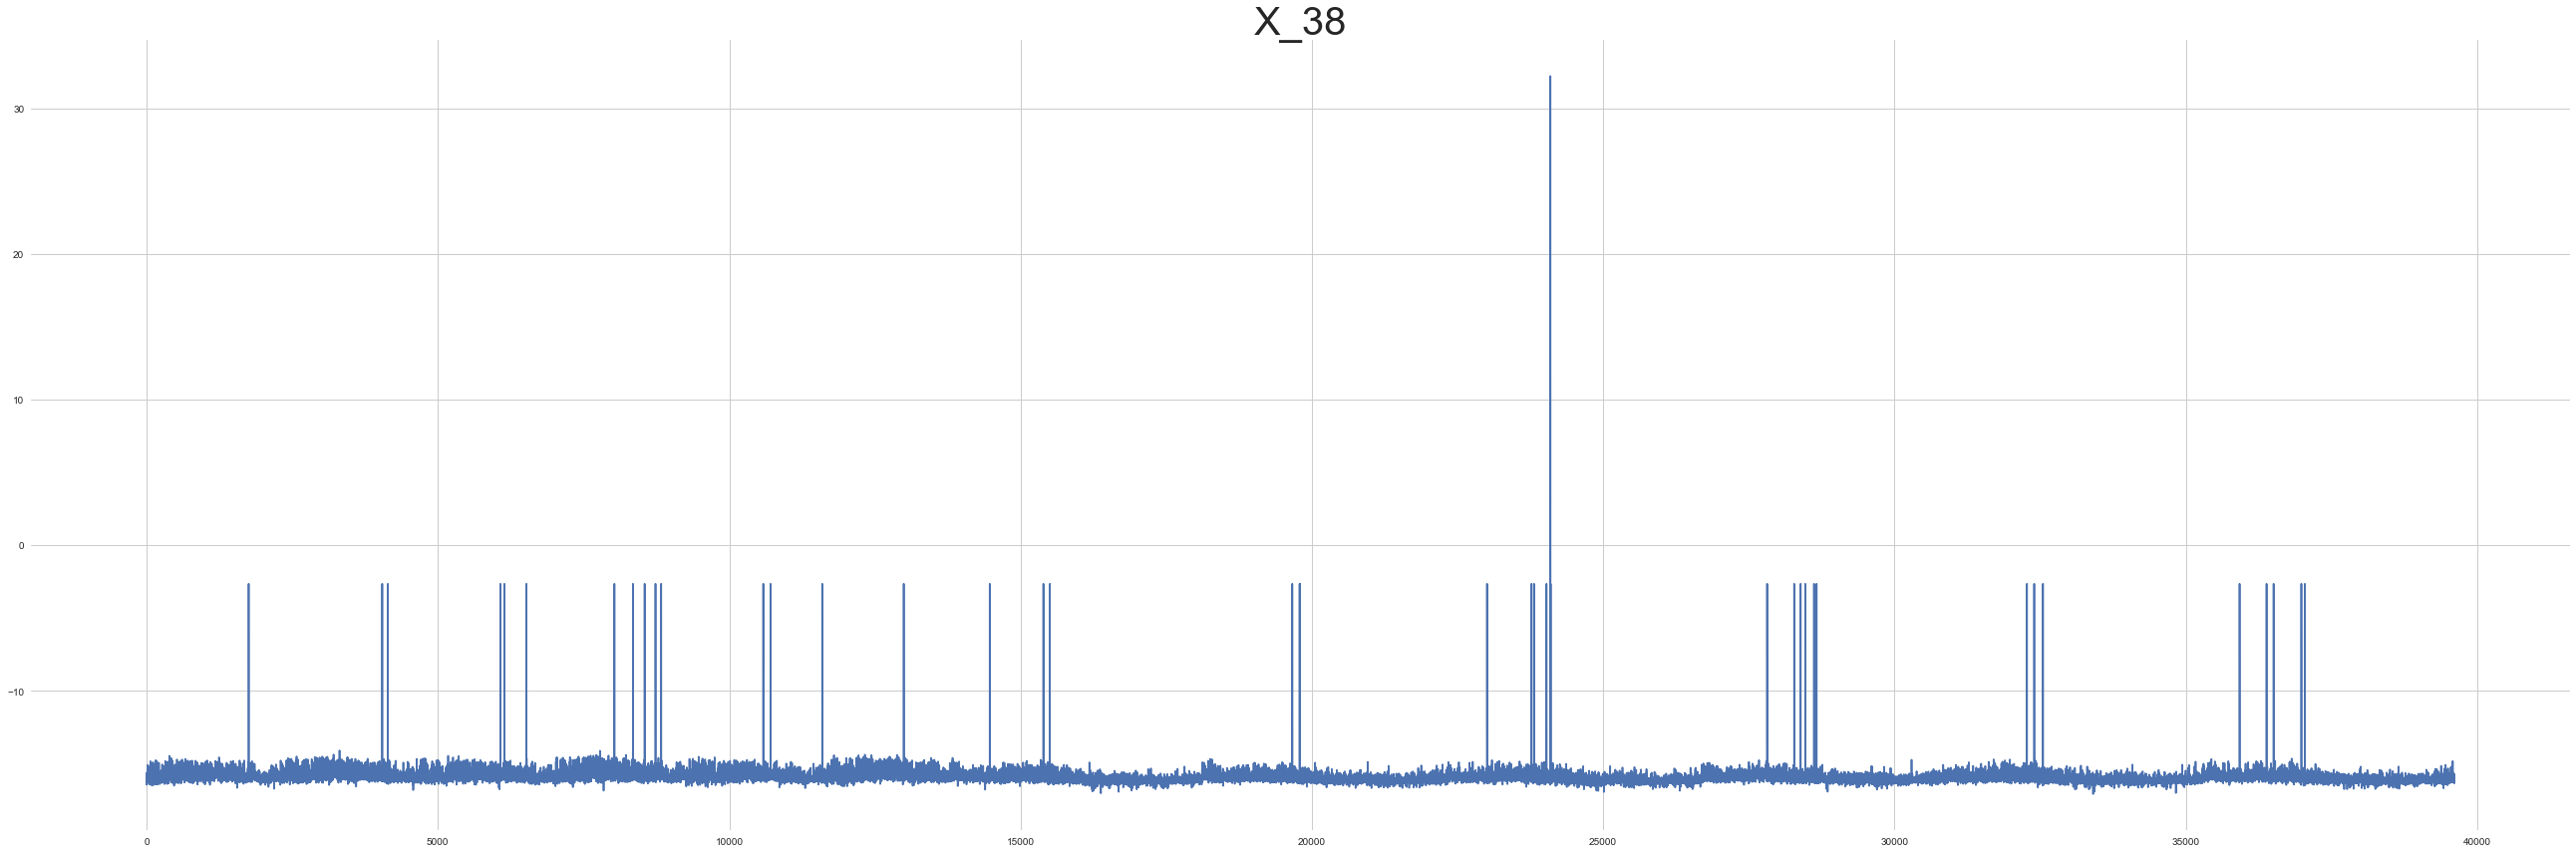

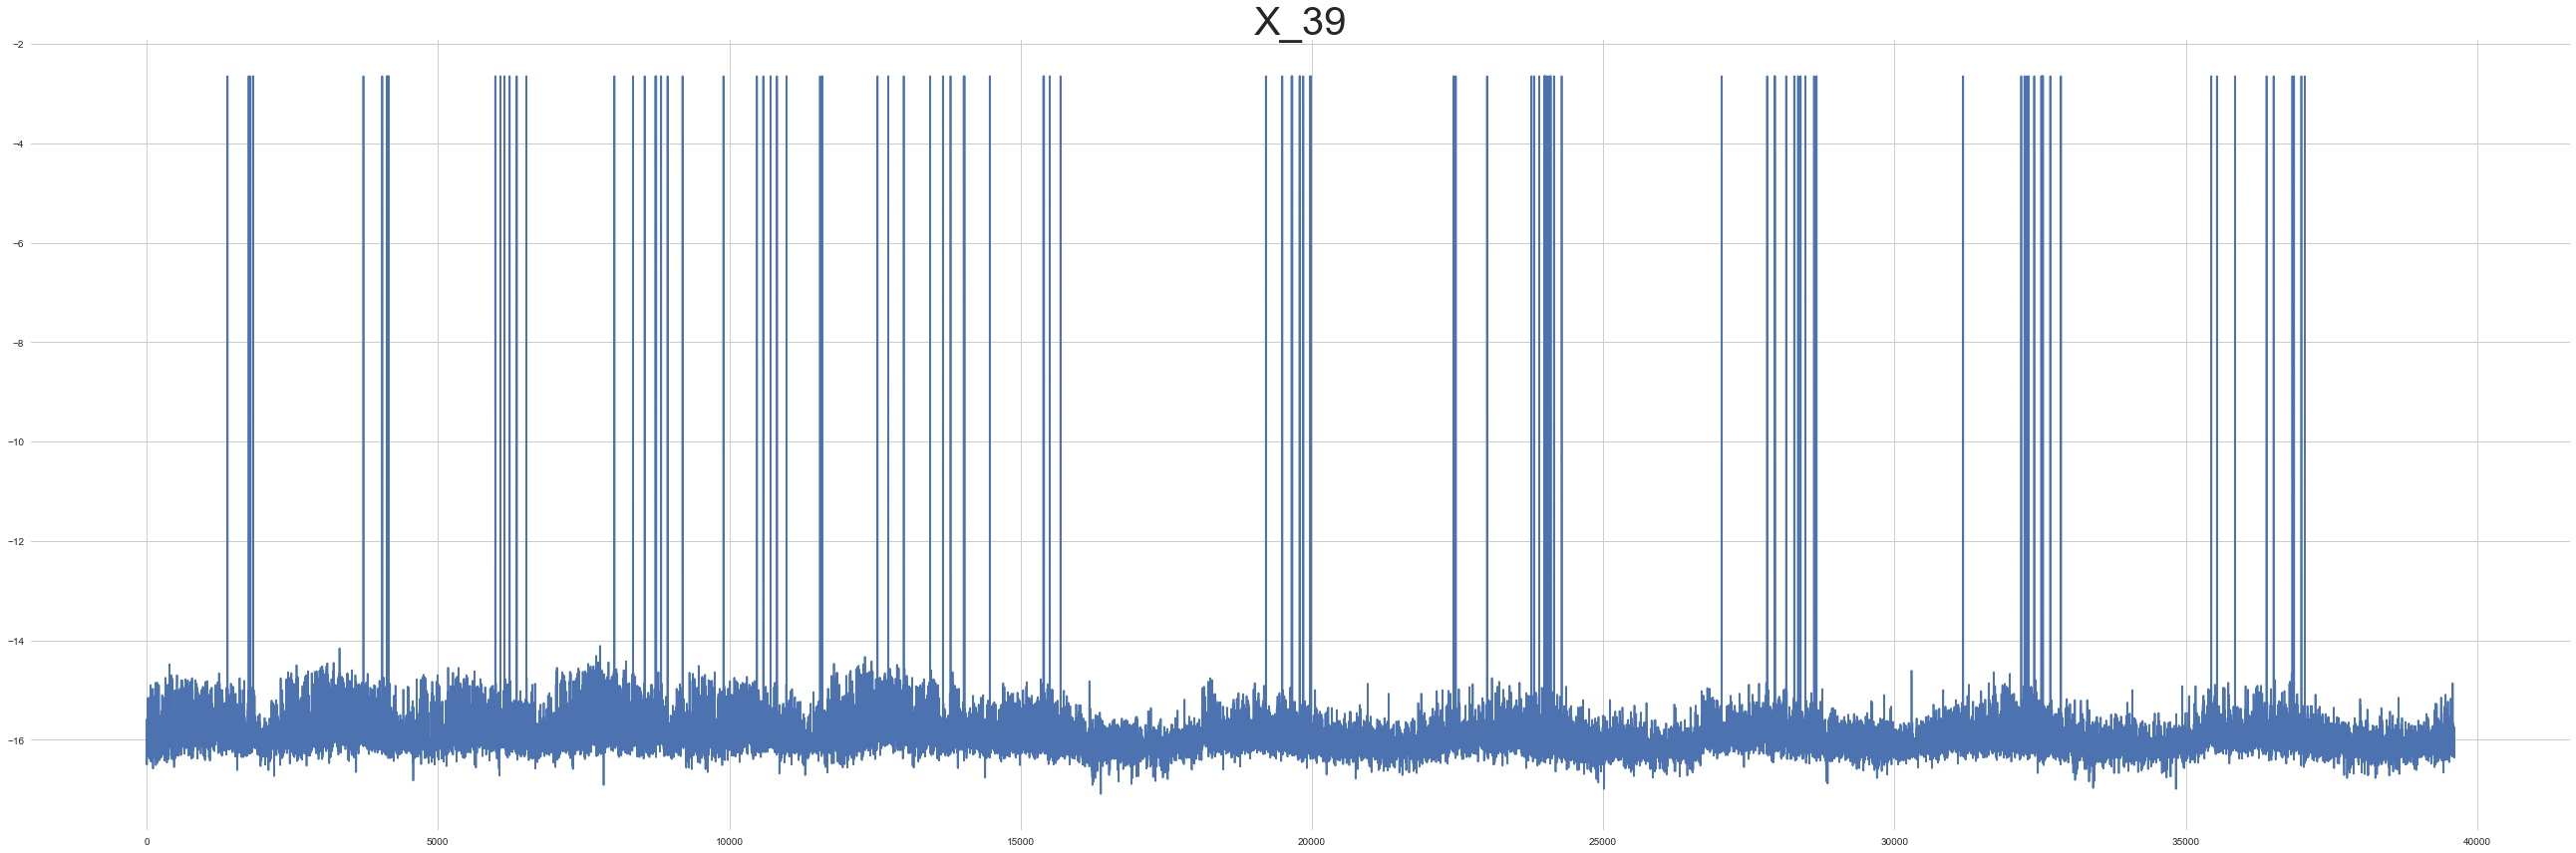

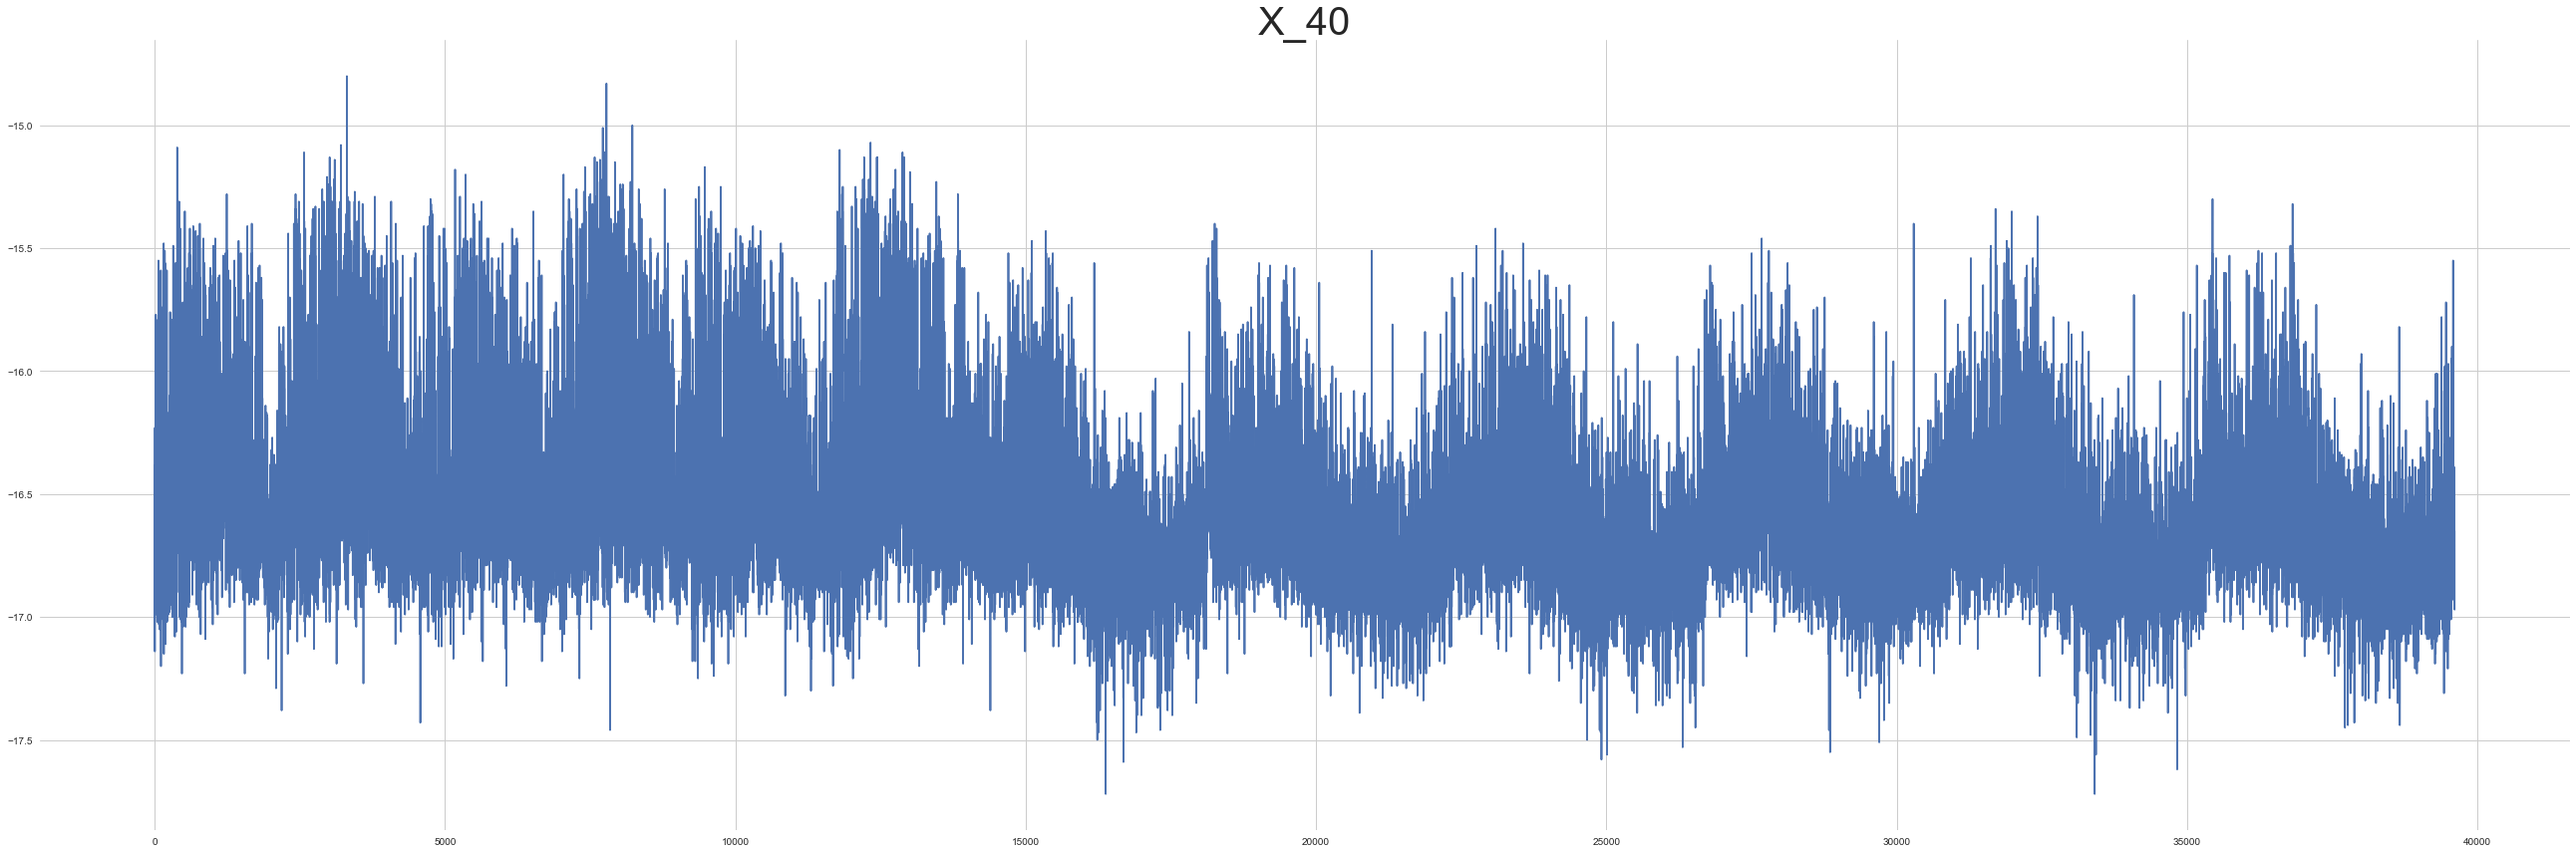

In [149]:
show_plot(train,["X_38", "X_39", "X_40"])

**Observation**

* X_38과 X_39에서 이상치가 존재하는데 X_38에서 10 넘는 값이 존재합니다.

# Semi- Conclusion

> 대부분의 X인자, 10000~15000 index 내에서 패턴 변화 시작점이 되는 이유는 무엇일까요?

In [108]:
#https://dacon.io/competitions/official/235927/talkboard/406632?page=4&dtype=recent
group_dict = {
    "Group_1" : ["X_01", "X_02", "X_05", "X_06"],
    "Group_2" : ["X_03", "X_10", "X_11"],
    "Group_3" : ["X_04", "X_23", "X_47", "X_48"],
    "Group_4" : ["X_07", "X_08", "X_09"],
    "Group_5" : ["X_12"],
    "Group_6" : ["X_13"],
    "Group_7" : ["X_14", "X_15", "X_16", "X_17", "X_18"],
    "Group_8" : ["X_19", "X_20", "X_21", "X_22"],
    "Group_9" : ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"],
    "Group_10" : ["X_30", "X_31", "X_32", "X_33"],
    "Group_11" : ["X_34", "X_35", "X_36", "X_37"],
    "Group_12" : ["X_38", "X_39", "X_40"],
    "Group_13" : ["X_41", "X_42", "X_43", "X_44"],
    "Group_14" : ["X_45"],
    "Group_15" : ["X_46"],
    "Group_16" : ["X_49"],
    "Group_17" : ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"],
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

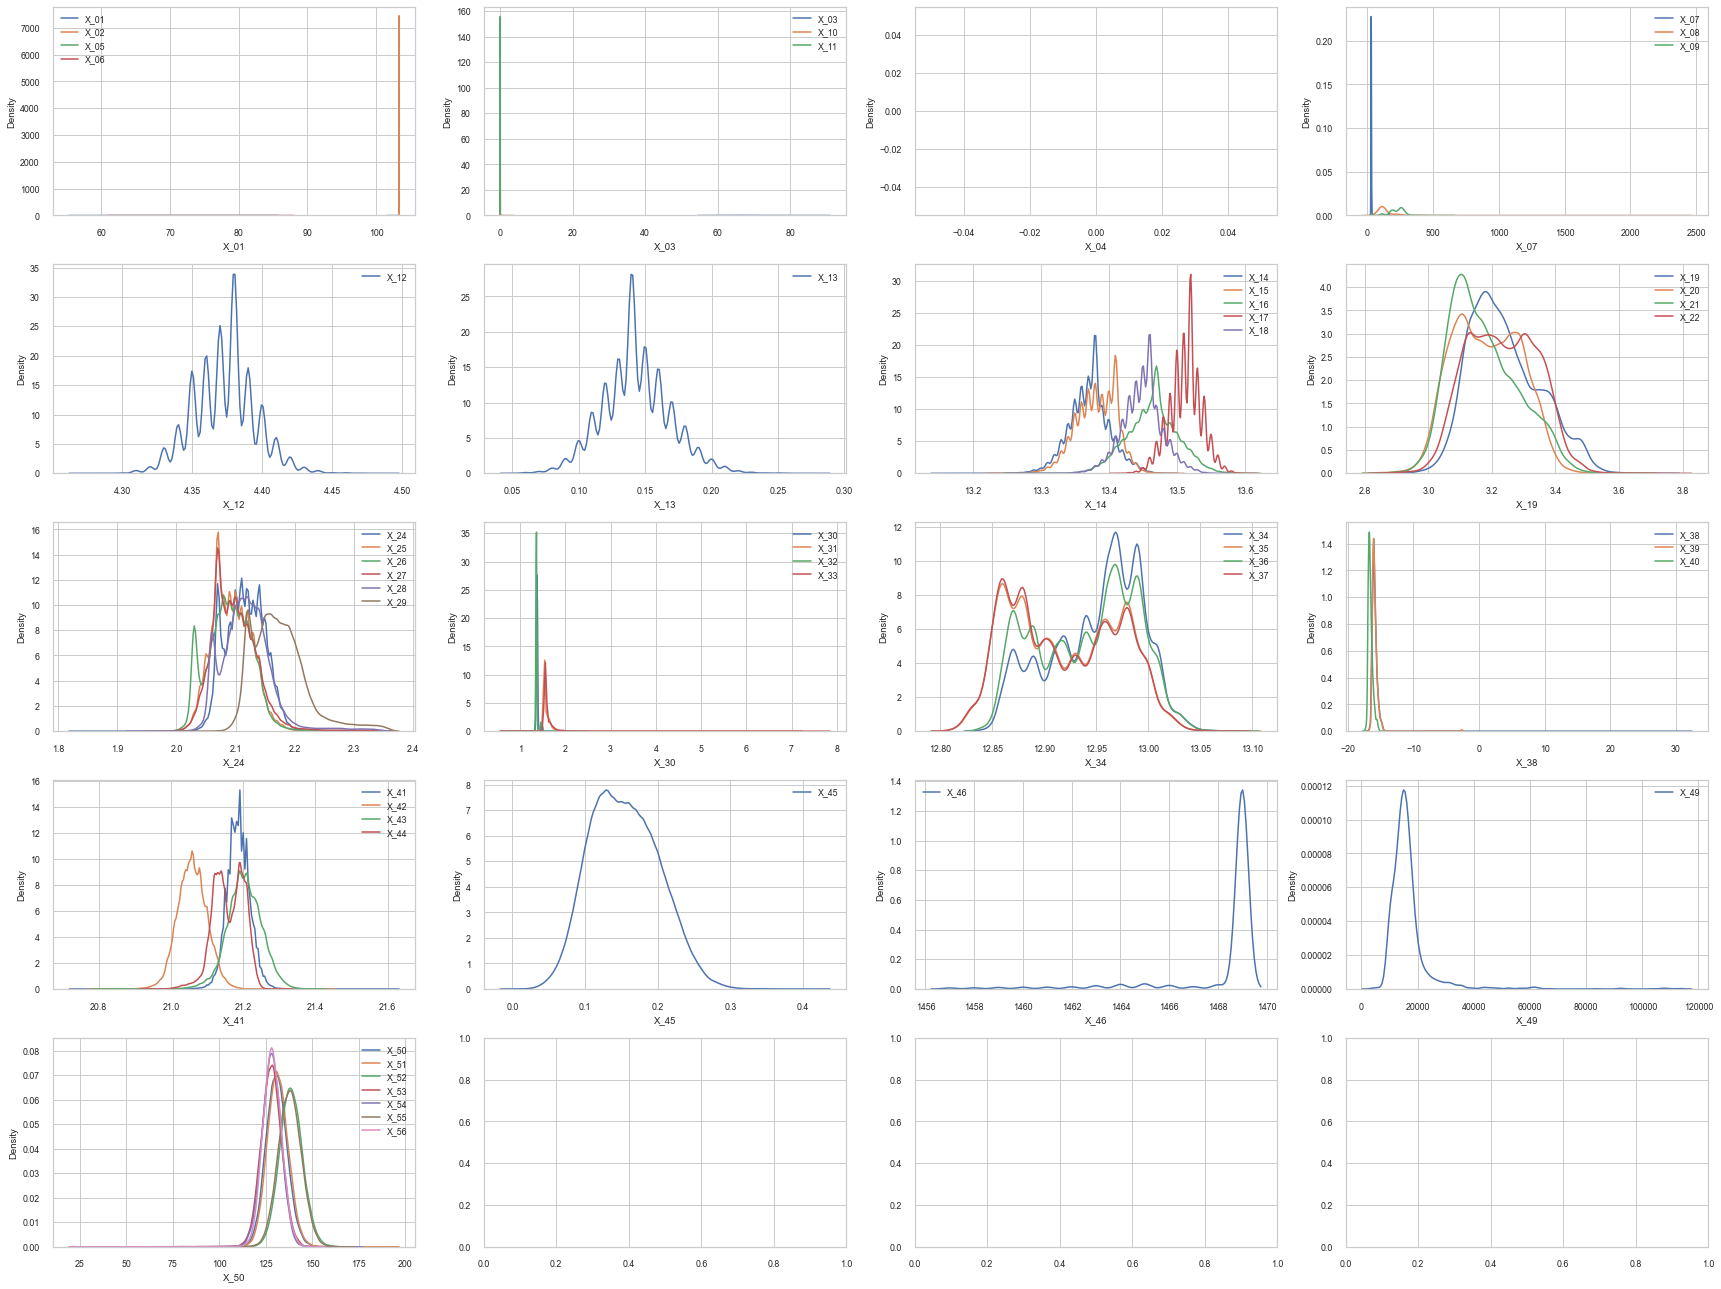

In [109]:
import warnings
warnings.filterwarnings('ignore')
i = 0
plt.figure()
f,ax=plt.subplots(5,4,figsize=(24,18))
for col in group_dict.keys():
    i+=1
    plt.subplot(5,4,i)
    for j in train[group_dict[col]].columns:
        sns.kdeplot(train[j],label=j)
        plt.legend()
plt.tight_layout()


**Obseravation**

* X_34~X_37 (스크류 체결 시 분당 회전 수)
    * 도메인 지식을 바탕으로 평평한 레이돔을 체결할 때의 **스크류 회전 수는 동일해야 합니다.**

X_35, X_37쌍은 비슷한 분포를 나타내는데 **X_34,X_36는 모델 학습에서 있어 교란요인이 될 것이라 판단되어 제거합니다.**

# analyze feature one by one

## violine plot

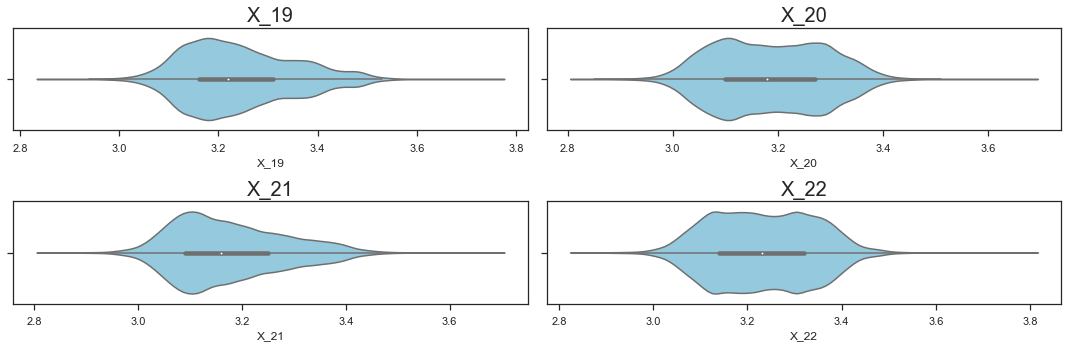

In [177]:
#1~4 번 스크류 삽입 깊이
i = 0
plt.subplots(1,3,figsize=(15,5))
for col in ["X_19", "X_20", "X_21", "X_22"]:
    i +=1
    plt.subplot(2,2,i)
    sns.violinplot(train[col],color='skyblue')
    plt.title(f'{col}', fontsize=20)
    plt.tight_layout()

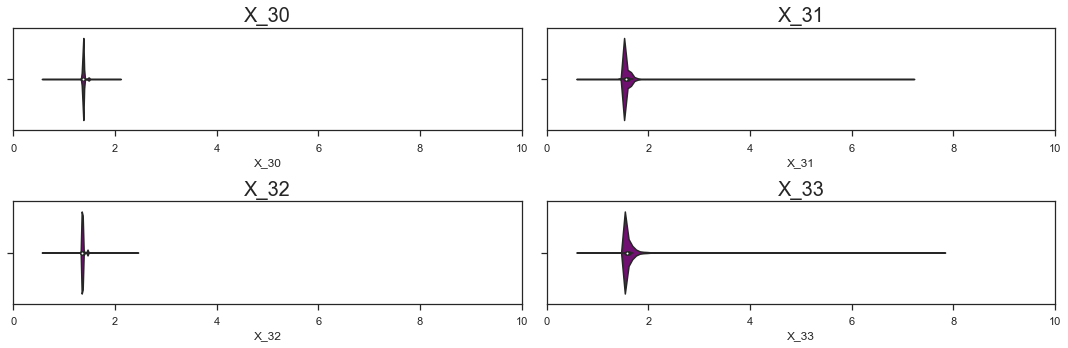

In [182]:
#스크류 삽입 깊이 1~4
sns.set(font_scale=1.0)
sns.set_style('ticks')
i = 0
plt.subplots(1,3,figsize=(15,5))
for col in ["X_30","X_31","X_32","X_33"]:
    i +=1
    plt.subplot(2,2,i)
    sns.violinplot(train[col],color='purple')
    plt.xlim(0,10)
    plt.title(f'{col}', fontsize=20)
    plt.tight_layout()

**Observation**

* 1번과 3번 스크류 삽입 깊이가 비슷하고 2번과 4번 스크류 삽입 깊이 분포가 비슷합니다.

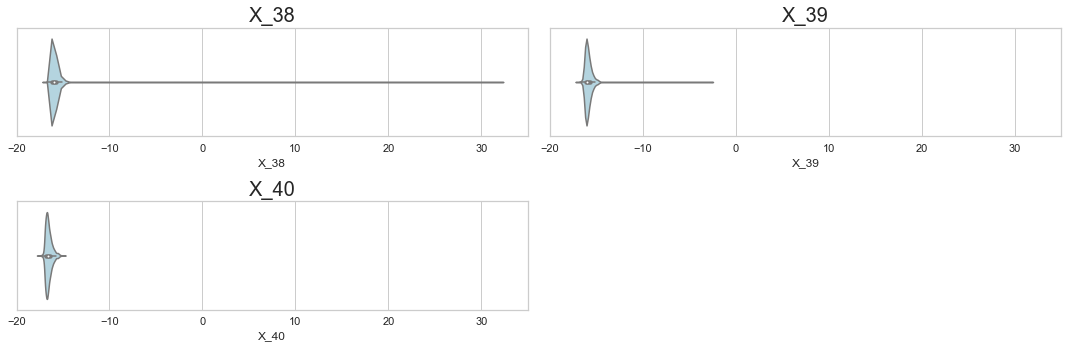

In [52]:
i = 0
plt.subplots(1,3,figsize=(15,5))
for col in ["X_38", "X_39", "X_40"]:
    i +=1
    plt.subplot(2,2,i)
    sns.violinplot(train[col],color='lightblue')
    plt.xlim(-20,35)
    plt.title(f'{col}', fontsize=20)
    plt.tight_layout()

**Observation**

* 하우징 PCB 안착이 점점 정교하게 이루어지는 것을 알 수 있습니다.

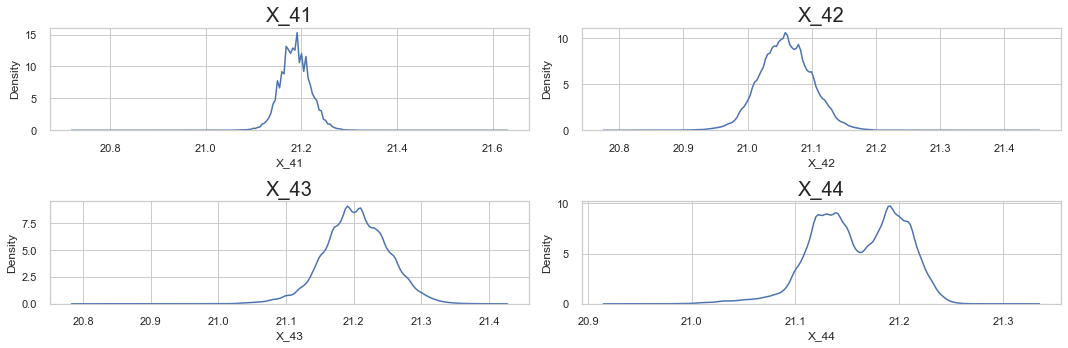

In [54]:
#레이돔 치수
sns.set(font_scale=1.0)
sns.set_style('whitegrid')
i = 0
plt.subplots(2,2,figsize=(15,5))
for col in ["X_41", "X_42", "X_43","X_44"]:
    i +=1
    plt.subplot(2,2,i)
    sns.kdeplot(train[col])
    plt.title(f'{col}', fontsize=20)
    plt.tight_layout()

**Observation**

* 레이돔 치수 41~43인자는 정규분포 형태와 유사하지만 X_44에서 쌍봉분포의 형태를 보입니다. 

# Feature Selection

In [60]:
#1. drop X_04, X_23, X_47, X_48
train.drop(['X_04','X_23','X_47','X_48','X_34','X_36'],1,inplace=True)
test.drop(['X_04','X_23','X_47','X_48','X_34','X_36'],1,inplace=True)

# Correlation

<AxesSubplot:>

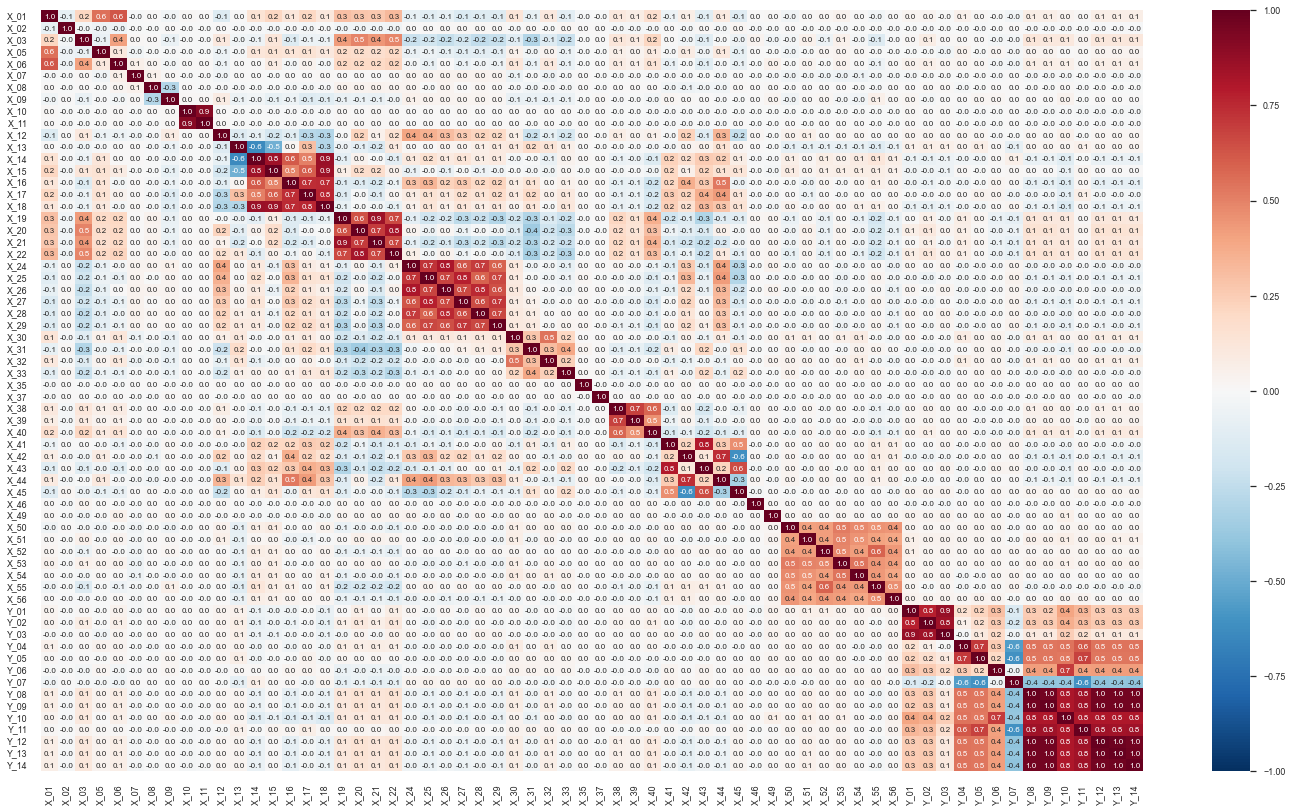

In [61]:
sns.set(font_scale=0.8)
plt.figure(figsize=(22,14))
sns.heatmap(train.corr(),fmt='.1f',vmax=1, vmin=-1,cmap='RdBu_r',annot=True, annot_kws={'size':8})

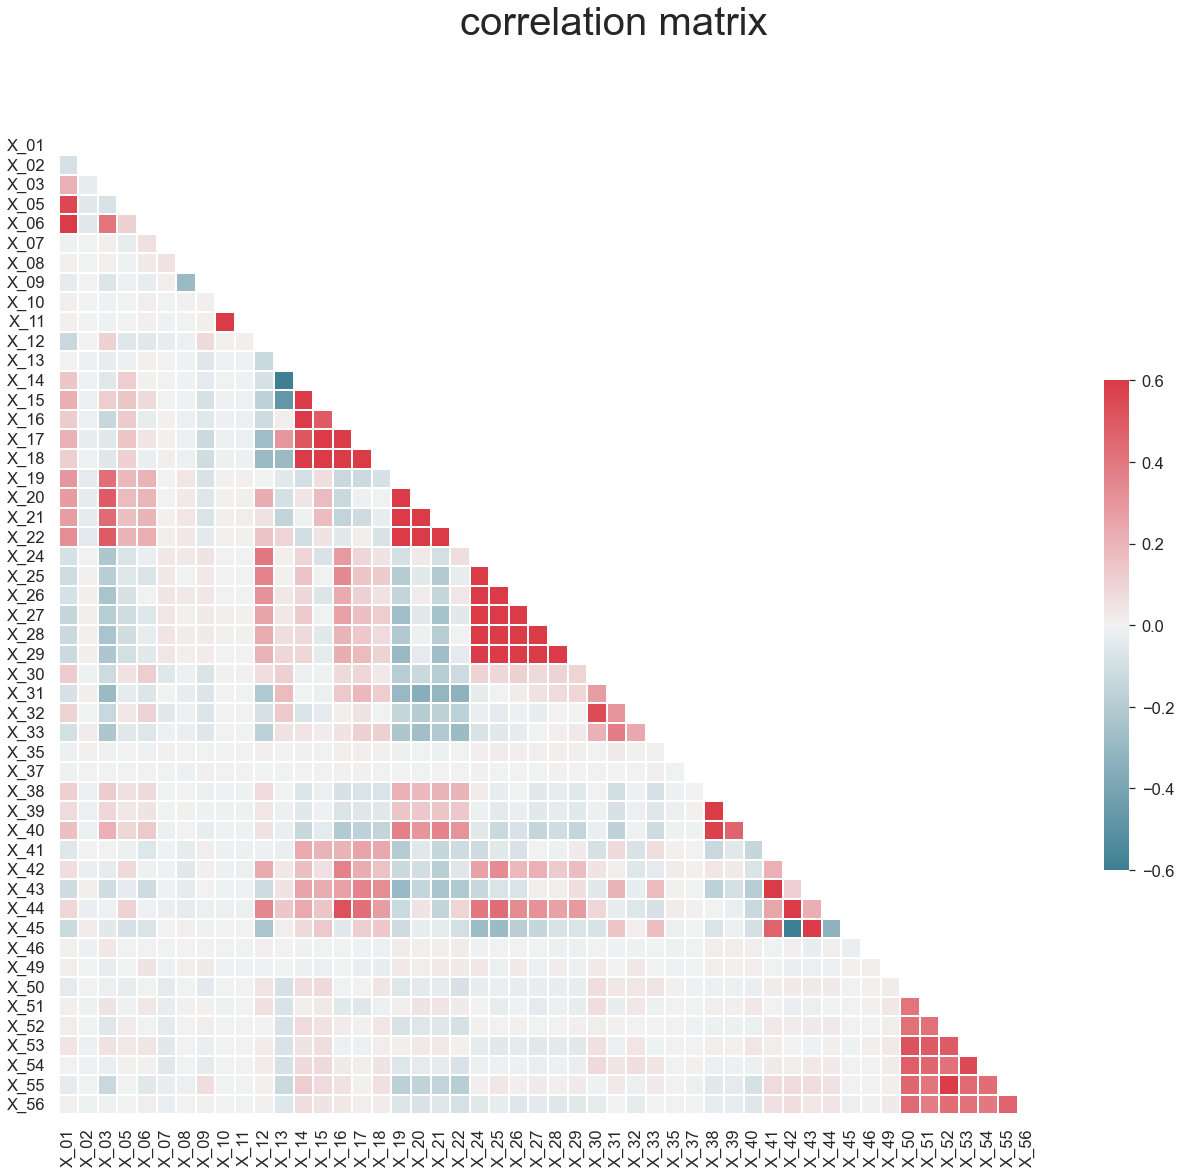

In [191]:
#예측변수 선형 관계 
sns.set(style='white', font_scale=1.5)

corr = train.drop(['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09',
       'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14'],1).corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #대각선을 기준으로 아래를 보자.

f,ax=plt.subplots(figsize=(24,18))
f.suptitle('correlation matrix', fontsize=40)

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, vmax=.6,vmin=-.6,center=0,cmap=cmap,
           square=True,linewidth=.2,cbar_kws={'shrink':.5},annot=False);

**Observation**

* VIF, 상관행렬 고윳값, 상태지수를 도출하여 다중공선 가능성을 고려해봅니다.

# 차원축소

In [63]:
X = train.iloc[:,:-14]
y = train.iloc[:,50:]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

th x values: 4.1706374808308775 -3.789522266101454 - th y values: 3.640190484730292 -3.363170246122771
train shape: (94, 2) - test shape: (99, 2)
hard_rows_list len: 33


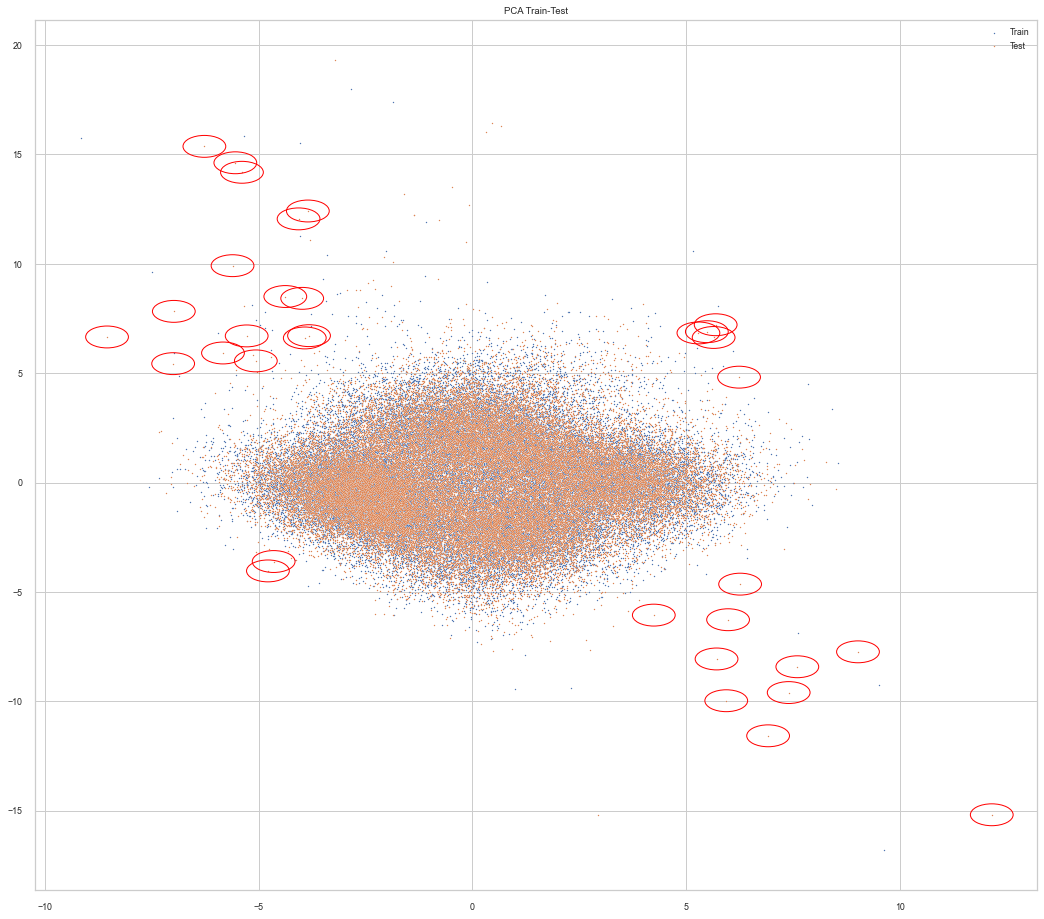

In [71]:
def plot_pca_traintest(X_train, X_test, features, title, figsize=(16, 8), max_dis=0.5, find_hard_rows=True, th=0.75):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import RadiusNeighborsClassifier
    
    pca = PCA(n_components=2)
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train[features])
    X_test_std = scaler.transform(X_test[features])
    tr_p = pca.fit_transform(X_train_std)
    te_p = pca.transform(X_test_std)
    
    fig, ax = plt.subplots(figsize=figsize)
            
#     ax.scatter(tr_p[:,0], tr_p[:,1], s=1, c='blue', label='Train') # train: blue
#     ax.scatter(te_p[:,0], te_p[:,1], s=1, c='orange', label='Test') # test: yellow
    sns.scatterplot(x=tr_p[:,0], y=tr_p[:,1], s=2, label='Train', ax=ax)
    sns.scatterplot(x=te_p[:,0], y=te_p[:,1], s=2, label='Test', ax=ax)
    ax.legend()
    ax.set_title(title)
    
    if find_hard_rows:
        neigh = RadiusNeighborsClassifier(radius=max_dis, algorithm='kd_tree', leaf_size=40)
        x_q75, x_q25 = np.percentile(tr_p[:, 0], [th, 100-th])
        y_q75, y_q25 = np.percentile(tr_p[:, 1], [th, 100-th])
        condition_tr = (((tr_p[:, 0]>x_q75)|(tr_p[:, 0]<x_q25))&((tr_p[:, 1]>y_q75)|(tr_p[:, 1]<y_q25)))
        s_tr_p = tr_p[condition_tr, :]
        condition_te = (((te_p[:, 0]>x_q75)|(te_p[:, 0]<x_q25))&((te_p[:, 1]>y_q75)|(te_p[:, 1]<y_q25)))
        indexs = np.arange(0, len(X_test))
        s_te_p = te_p[condition_te, :]
        s_indexs = indexs[condition_te]
        print("th x values:", x_q75, x_q25, "- th y values:", y_q75, y_q25)
        print("train shape:", s_tr_p.shape, "- test shape:", s_te_p.shape)
        
        neigh.fit(s_tr_p, np.ones(s_tr_p.shape[0]))
        neigh_radius = neigh.radius_neighbors(s_te_p)
        # neigh_radius[0][0]: distances, neigh_radius[1][0]: macthes
        hard_rows_list = []
        for i in range(s_te_p.shape[0]):
            if len(neigh_radius[0][i]) == 0:
                hard_rows_list.append(s_indexs[i])
        
        for index in hard_rows_list:
            circle = plt.Circle((te_p[index, 0], te_p[index, 1]), max_dis, color='red', fill=False)
            ax.add_patch(circle)
        print("hard_rows_list len:", len(hard_rows_list))
        
        return hard_rows_list


features = [col for col in X.columns]

sns.set_style('whitegrid')
hard_rows_list = plot_pca_traintest(X, test, features, "PCA Train-Test", 
                                    figsize=(16, 16), max_dis=0.5, th=95)

In [73]:
hard_rows_list

[1167,
 1438,
 1754,
 3155,
 3635,
 4491,
 4545,
 5444,
 6276,
 8711,
 10556,
 10796,
 12735,
 12803,
 16199,
 17626,
 17668,
 17805,
 18799,
 21368,
 22277,
 22415,
 24425,
 24963,
 26381,
 26624,
 26719,
 26963,
 28457,
 29879,
 31632,
 38212,
 38588]

**Observation**

* testset의 [1167,1438,1754,3155,3635,4491,4545,5444,6276,8711,10556,10796,12735,12803,16199,17626,17668,17805,18799,21368,22277,22415,24425,24963,26381,26624,26719,26963,28457,29879,31632,38212,38588] 인덱스 근처에는 train set이 없습니다.

# baseline

데이콘 베이스라인 참조

In [216]:
from sklearn.multioutput import MultiOutputRegressor
reg = MultiOutputRegressor(LGBMRegressor(random_state=42)).fit(X_train, y_train)

In [217]:
prediction = reg.predict(test)

In [247]:
prediction = pd.DataFrame(prediction,columns=y_train.columns)

In [77]:
for index, col in enumerate(sample_submission.columns):
    if col=='ID':
        continue
    sample_submission[col] = prediction[:,index-1]
    
sample_submission

ID   Y_01   Y_02   Y_03    Y_04    Y_05    Y_06   Y_07  \
0      TEST_00001 1.5204 1.1639 1.0750 13.7477 31.2497 16.6355 3.1377   
1      TEST_00002 1.4414 1.2118 1.1235 13.6173 31.1469 16.3810 3.1588   
2      TEST_00003 1.5429 1.1316 1.0206 15.5006 31.8980 17.1605 3.2325   
3      TEST_00004 1.4364 1.1831 1.0721 14.9284 31.9713 17.0869 3.1317   
4      TEST_00005 1.1948 1.0391 0.8898 15.2783 31.7831 17.0132 3.0574   
...           ...    ...    ...    ...     ...     ...     ...    ...   
39603  TEST_39604 1.2391 0.9398 0.9669 13.3548 30.5270 16.6431 3.1548   
39604  TEST_39605 1.2907 0.9403 0.8985 13.9108 31.5627 16.7457 3.1691   
39605  TEST_39606 1.2291 0.9765 1.0436 13.0444 31.0146 16.6173 3.1989   
39606  TEST_39607 1.2092 0.9164 0.8921 13.4334 31.0805 16.6598 3.1866   
39607  TEST_39608 1.2929 1.0215 0.9729 13.4090 30.2349 16.6099 3.1967   

          Y_08     Y_09     Y_10    Y_11     Y_12     Y_13     Y_14  
0     -26.0349 -26.0479 -22.1519 24.4506 -26.0916 -26.0159 -26.0789  
1     -26.2135 -26.1535 -22.2838 24.4496 -26.1920 -26.0838 -26.1763  
2     -26.0028 -26.0469 -22.0407 24.6230 -26.1171 -25.9311 -25.9901  
3     -25.6889 -25.6782 -21.6402 24.8253 -25.5537 -25.6692 -25.6049  
4     -25.9367 -25.6003 -21.7460 24.7664 -25.4891 -25.5388 -25.6073  
...        ...      ...      ...     ...      ...      ...      ...  
39603 -26.4198 -26.3922 -22.9159 24.4703 -26.3995 -26.3463 -26.3307  
39604 -26.3566 -26.4764 -22.7342 24.5472 -26.3123 -26.3091 -26.3412  
39605 -26.5442 -26.4577 -22.8937 24.2846 -26.5742 -26.4950 -26.3954  
39606 -26.4562 -26.3967 -22.7910 24.5122 -26.4633 -26.4331 -26.3112  
39607 -26.5434 -26.4715 -22.8556 24.1951 -26.3928 -26.4306 -26.4186  

[39608 rows x 15 columns]